# Algorithms for Facial Landmark Detection on 3D Models Based on Geometric Properties

## Pronasale

**Pronasale: The most protrusive point on the nasal tip in the midline [Mazhar et. al. 2021]**

### The pseudo code based on [Abu, Ngo, et. al. 2019]




1. Preprocess the 3D model file to put it into the correct pose and orientation,
2. Get x,y,z coordinates of all vertices from the 3D model (.obj) file to data structures,
3. Search for the vertex with the maximum z coordinate,
4. Assign this coordinate to Pronasale (prn).

### The pseudocode based on [Vezzetti, Marcolin 2014]

In this paper, x goes from the forehead (positive) to chin (negative), y goes from ear to ear, and z represents depth. 

Check the [Definitions](#scrollTo=TTke5AddhLvF) for the terms used.


1. Select all points on the model whose shape index is in the range [0.625, 1) (dome)
2. Select the points that are also critical points
3. Locate the maximum e, g, and K points
4. If the maximum g and K points are identical, choose this point as the pronasale
5. Otherwise, choose the maximum e point as the pronasale

Notes: If I understand this right, we effectively model the face as a dome, the farthest point of which is assumed to be prn. I'm not well-versed in the mathematics of three-dimensional modeling, unfortunately - I'm not sure what *h* is mathematically outside of it being some differentiable function.

### The pseudocode based on [Vezzetti, Marcolin, et. al. 2013]

1. Rotate face to standard orientation: −0.467384745634034 radians around the x-axis and 0 radians around the y-axis, such that the line between pronasale and nasion are parallel to the xy plane
2. Find the point that maximizes k2 curvature
3. Within a neighborhood of this maximum point, find the point which has the maximum z-coordinate
4. Assign this point to the pronasale

Notes: Rotate face so the landmarks are parallel to the 2D plane, find the point with the maximum k2 curvature (assumed to be the maximum point of bending at a point on a curve, based on some brief searching that I have done). At that point, the algorithm proceeds similarly to [Abu, Ngo, et. al. 2019]. This could be a faster way of running that algorithm, since we don't need to search through every vertex.

### The pseudocode based on [Liang, Wu, et. al. 2013]

1.	Locate the set of points which have the maximum Z-coordinate. (This set will only contain one point unless multiple points tie for maximum Z-coordinate)
2.	Find the geometric center of this set
3.	Assign the point at the geometric center to the pronasale

Notes: A straightforward statement of the algorithms above: find the maximum Z-coordinates, and if there are multiple points with the same Z-coordinate, assign the center of the set as prn.

### The pseudocode based on [Guo, Mei et. al. 2013]

1. Select the first point in the facial mesh
2. Create a set of all points within a pre-set radius of the chosen point. A radius of 15mm was chosen in the article.
3. Try to fit a sphere to this point to best match this set of neighboring points
4. Calculate the radius of this sphere (r) and the average residual distance of the neighboring points to the sphere (e)
5. Using r and e, calculate the score of this point using the equation: f=e*(r0+|r-r0|), for a pre-defined value r0. r0=11.7mm was chosen in this article.
6. Repeat steps 1-5 to calculate the score of every point on the face
7. Locate the point with the minimum f value
8. Assign this point to the pronasale

Notes: Here it looks like we're creating spheres of best fit for all points on the face, and we use a scoring system to determine if a point represents the pronasale. The formula, thus, depends on reducing the value of the residual distance *e* and radii of the spheres. Question: What happens if you change the values of r0 or the pre-set radius in (2)? Do we get a more accurate result if we increase or decrease these values?

### The pseudocode based on [Galvánek, Furmanová, et. al. 2015]

[Segmentation of nose region]
1.	Get the tip of the nose by finding the region with the maximum values of the minimum principal curvature
2.	Denoise the face by applying a linear anisotropic filter
      This is done to reduce the impact artifacts such as beards and eyelashes have on the final segmentation
3.	Threshold the principal curvature values (done using an automatic threshold filter)
      This is done to filter out regions not on the nose tip (best threshold results were obtain using Triangle filter)
4.	Find the biggest continuous region using the computed threshold. This is the nose region
[Landmark detection]
5.	Within this region, find the most forward point along the z-axis
6.	Assign this point to the pronasale

Notes: This is a more specific algorithm for determining the pronasale. It discusses how to identify the tip of the nose and filter out beards/regions not on the nose tip. From there, the algorithm proceeds similarly to some of the other algorithms listed here.

![[Galvánek, Furmanová, et al]_Figure2.PNG](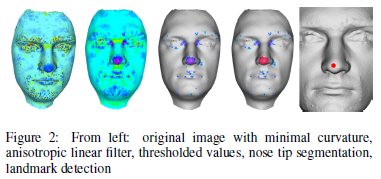)

### The pseudocode based on [Berretti, Ben Amor, et. al. 2011]

[Pre-processing]
1. Remove spikes in the 3D model and fill in any holes
2. Resample the model into a uniform square grid (0.7mm was used in the article)
3. Transform the model into standard orientation and resample the model again
    In the article, an iterative PCA alignment process was used to orient the face
4. Transform the 3D model into a 2D grayscale image, where the grey value is proportional to the depth of the model at the coordinates
[Pronasale detection]
5. Locate the lightest point in the image (highest elevation). This is the initial estimate for pronasale.
6. Isolate the convex region of the face which contains this initial estimate
7. Find all points in this region with a local maximum of elliptic Gaussian curvature
8. Of these local maxima, find the one which is closest to the initial estimate
9. Assign this point as the pronasale

Notes: Simple and straightforward: set up the model so it can be read as a 2D grayscale image representing depth, then estimate the point of the least depth/maximum curvature. This point is likely prn.

### The pseudocode based on [Gupta, Markey, et. al. 2010]

Check for the terms used: [Definitions](#def_gupta)

Dependencies:

*   Generation of a 3D face template
*   Generation of a facial range image

1.	Get the 3D face template, with the pronasale manually located
      The 3D face template was gathered from the training partition of the database used in the article
2.	Register the surface of the 3D face to the template face (done using the Iterative Closest Point (ICP) algorithm)
3.	Align the face to the template face
4.	Find the point on the surface of the face that is the closest to the pronasale located on the template face
5.	Take this point as the initial estimate (ICP estimate) of the pronasale
6.	Compute the first and second partial derivatives of z(x,y) for the facial range image
7.	Compute the Gaussian surface curvature K and the mean surface curvature H for the facial range image
8.	Find the point on the face with the maximum elliptic Gaussian curvature (K > 0), within a 96mm x 96mm region surrounding the initial estimate of the pronasale
9.	Assign this point to the pronasale

![[Gupta, Markey, et al]_Figure5.PNG](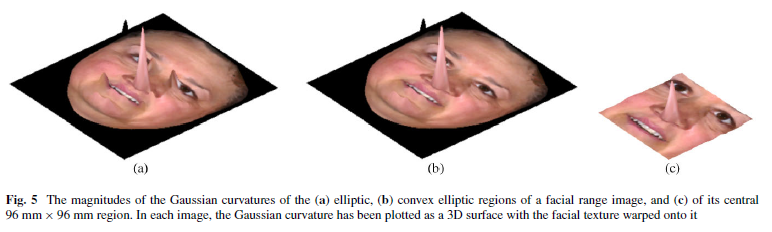)

Notes: Basically aligning the face to a template and using it as an initial estimate, then calculating derivatives and curvatures to find the pronasale.

### The pseudocode based on [Moos, Marcolin, et. al. 2017]

Check for the terms used: [Definitions](#scrollTo=TTke5AddhLvF)

1.	Select points whose shape index is S > 0.55
2.	Select points for which Dx ϵ [-u, u] where u is instrument uncertainty
3.	Maximize k2

### The pseudocode based on [Vezzetti, E., Marcolin, F., Tornincasa, S. et al. 2018] 

Check for the terms used: [Definitions](#scrollTo=TTke5AddhLvF)

1. the mean-filtered shape index S lies in the range (0.56; 1), i.e. the point belongs to the point whose geometrical shape is “cap”
2. the mean curvature H is lower than a threshold value, i.e. H < 2 which was experimentally set
3. the coefficient g is lower than a threshold value, i.e. g< −2.9;
4. the coefficient e has a local minimum in this area;
5. k1 has a local minimum in correspondence to the point

Notes:
- Working area, Pron1, is defined by a point Pmax, which is the point with the maximum z-coordinate.

- A neighborhood of Pmax, Pron2 is created.

- Conditions 1 to 4 above are used to narrow the search area.

- When a minimum of k1 is obtained, the algorithm searches for another minimum lower than a threshold value (k1 < 0.9) in the neighborhood of the one found already; if a point is found, the final pronasale is located in the middle of the two points, otherwise it is chosen as the first minimum.


### The pseudocode based on [M. P. Pamplona Segundo, L. Silva, O. R. P. Bellon and C. C. Queirolo]

1. Compute two y-projections of the depth information relief [38] named profile curve and median curve (these curves are ovtained by determining the max depth value and median depth value of every set of points with the same y-coordinate from the face image)
2. Compute the difference between profile and median curves and find y-coordinate with maximum difference value.
3. The local peak in the profile curve closest to this y-coordinate corresponds to the nose tip location (Fig. 8)
4. x-projection was computed by calculating the percentage of peak points for every column in a set of neighbor rows centered in the nose tip y-coordinate.
5. Take nose tip x-coordinate as a peak at this projection.

Notes:

- First, we find the y-coordinates for the nose tip and eyes, and then, we find the x-coordinates for the nose tip, nose corners, and inner eye corners.

- Once the y-coordinates of the nose tip and eye corners had been detected, we computed the x-projections of the depth and curvature images to find the x-coordinates of the nose tip, nose corners, and inner eye corners.


### The Pseudocode of the Implementation

#### Adapted from the Pseudocode in Abu, Ngo, et. al. 2019

1. Identify the minimum and maximum x and y coordinates (min_x, max_x, min_y, max_y) of the vertices.
2. Define a region where the nose is approximately in the center, using the coordinates (center = (min_x + max_x)/2, y = (min_y + max_y)/3).
3. Sort the vertices in the defined region and find the vertex with the highest z value within that region.
4. Assign the vertex with the highest z value as the pronasale.

### Pronasale Implementation
#### Implementation based on the pseudocode in [Abu, Ngo, et. al. 2019]

In [1]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_y(vertex): # used as key for sorting by y
  return vertex.y

def sort_by_x(vertex): # used as key for sorting by x
  return vertex.x

def sort_by_z(vertex): # used as key for sorting by z
  return vertex.z

def find_pronasale(mesh):
  vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use
  vertices.sort(key=sort_by_y)
  MIN_Y = vertices[0].y
  MAX_Y = vertices[-1].y
  vertices.sort(key=sort_by_x)
  MAX_X = vertices[-1].x
  MIN_X = vertices[0].x
  MAX_DIFFERENCE = 40
  # MAX_DIFFERENCE is the length of one side of the square region at the center
  
  section = []
  for vertex in vertices:
    #The following condition selects vertices from a region in the middle of the face
    if (vertex.x > ((MAX_X + MIN_X) / 2) - MAX_DIFFERENCE 
        and vertex.x < ((MAX_X + MIN_X) / 2) + MAX_DIFFERENCE 
        and vertex.y > ((MAX_Y + MIN_Y) / 3) - MAX_DIFFERENCE 
        and vertex.y < ((MAX_Y + MIN_Y) / 3) + MAX_DIFFERENCE):
      section.append(vertex)
  section.sort(key=sort_by_z)
  pronasale = section[-1]
  return pronasale

TEST_3DMODEL = 'OguzhanTopsakal.obj'

mesh = trimesh.load(TEST_3DMODEL) # load mesh
print(find_pronasale(mesh))

x: 1.0618 y: -9.9375 z: 127.984


## Sellion

**Sellion: The deepest depression of the nasal bones and often coincides with soft tissue nasion [Mazhar et. al. 2021]**

Sellion and Nasion-Radix are considered as the same landmark and the same code is used for Nasion - Radix. 

Also, needed for associated endocanthion/exocanthion algorithm

### The pseudocode based on [Liang, Wu, et. al. 2013]

Dependencies:

*   Detection of pronasale

1.	Locate the pronasale
2.	Select the points above the pronasale
3.	Find the local z-minima with the same x-value as the pronasale
4.	Assign the point at the local minima to the sellion

### The Pseudocode of the Implementation 

1. Find the pronasale
2. Starting from the pronasale, use nasal bridge length (Nasion (n) to Pronasale (prn)) stats from facebase.org to determine a search region with one standart deviation of nasal bridge length
3. Traverse the search region on increasing y until a relative minima for z is found
4. If no relative minima is found in the search region, expand the search region by one standart deviation of nasal bridge length
5. If found assign the vertex in the search region as the sellion

### Sellion Implementation
#### Pseudocode Reference: Liang, Wu, et. al. 2013


In [2]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_y(vertex): # used as key for sorting by y
  return vertex.y

def find_sellion(mesh):
  STD = 4.09 # Standard Deviation of nasal bridge length for 30 years old
  STD_HALF = STD / 2 #
  SEARCH_STD_LENGTH = 3
  MIN_HEIGHT = 48.33 - (SEARCH_STD_LENGTH * STD) # Mean of nasal bridge length minus x std
  MAX_HEIGHT = 48.33 + (SEARCH_STD_LENGTH * STD) # Mean of nasal bridge length plus x std
  CUR_MIN_HEIGHT = 48.33 - STD_HALF
  CUR_MAX_HEIGHT = 48.33 + STD_HALF

  # The mean length of the nasal bridge is 48.33 according to facebase
  # (https://www.facebase.org/facial_norms/summary/#nasalbdglength)

  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.
  # If we want to rely on the statistics, we can utilize the stats the Upper Facial Depth Left for depth
  # https://www.facebase.org/facial_norms/summary/#upfacedepth_r
  # The 1/3 of the Upper Facial Depth Left can be reasonable
  # The mean value for Upper Facial Depth for a 30 years old is about 123. 
  # If we take 1/4 of the 123, we can set our max dept to 30

  MAX_WIDTH = 3
  # The MAX_WIDTH is simply used when determing a line of vertices to select.

  pronasale = find_pronasale(mesh) # find pronasale
  vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use

  while CUR_MAX_HEIGHT < MAX_HEIGHT:
    section = []
    section.clear() # initialize slice of sorted vertices
    # find all vertices within range of pronasale on increasing y
    for vertex in vertices:
      if (vertex.y > pronasale.y 
          and vertex.y < pronasale.y + CUR_MAX_HEIGHT 
          and vertex.y > pronasale.y + CUR_MIN_HEIGHT 
          and vertex.x < pronasale.x + MAX_WIDTH 
          and vertex.x > pronasale.x - MAX_WIDTH 
          and vertex.z > pronasale.z - MAX_DEPTH 
          and vertex.z < pronasale.z + MAX_DEPTH):
        section.append(vertex)

  #Find a relative minima for z
    section.sort(key = sort_by_y) # sort by y-values
    for i, vertex in enumerate(section): # find sellion
      if (i < len(section) - 4):
      #Check if there is a point that has less z than previous and next 2 points
        if (vertex.z < section[i - 1].z 
            and vertex.z < section[i + 1].z 
            and vertex.z < section[i - 2].z 
            and vertex.z < section[i + 2].z 
            # and vertex.z < section[i - 3].z and vertex.z < section[i + 3].z
            ):
          sellion = vertex
    #if found in the current range of [CUR_MIN_HEIGHT - CUR_MAX_HEIGHT] return or expand the range
    if 'sellion' in locals():
      return sellion
    else:
      CUR_MIN_HEIGHT = CUR_MIN_HEIGHT - STD_HALF
      CUR_MAX_HEIGHT = CUR_MAX_HEIGHT + STD_HALF

  # If sellion was not found as a relative minima, return the point in the middle
  if not 'sellion' in locals():
    return section[int(len(section) / 2)]

TEST_3DMODEL = 'OguzhanTopsakal.obj'

mesh = trimesh.load(TEST_3DMODEL) # load mesh
print("sellion:", find_sellion(mesh))

sellion: x: -0.92671 y: 38.641 z: 106.563


## Nasion - Radix

**Nasion: The midpoint of the nasofrontal suture line where the frontal bone and nasal bones join [Mazhar et. al. 2021]**

### The pseudocode based on [Abu, Ngo, et. al. 2019]

---



Dependencies: 
- First need to detect pronasale.

1. Detect Pronasale/Tip (prn),
2. Search for the first vertex having a local minimum z along the upper part of the y-axis at prn's x,
3. Assign the vertex's coordinates to Nasion (n).

Notes: the nasion should be the deepest point on the y-axis of the pronasale.

### The pseudocode based on [Vezzetti, Marcolin 2014]

Check the terms used here: [Definitions](#scrollTo=TTke5AddhLvF)

In this paper, x goes from the forehead (positive) to chin (negative), y goes from ear to ear, and z represents depth


1. Compute the shape index of each point
2. Select the points where the shape index is in range [-0.375, 0.625)
3. Select the critical points
4. Select the points where K <= 0
5. Of the selected points, find the point with minimum g
6. Assign this point to nasion

### The pseudocode based on [Manal, Arsalane, et. al. 2019]

Dependencies:

*    Detection of sellion
*    Detection of pronasale


Nasion is called “nasale” in the article.

0.  Locate forehead point
1.	Locate the sellion and the pronasale
2.	Select all points above the sellion along the y-axis
3.	Restrict these points to those with the same x-value as the pronasale
4.	Find the local z-minima within these points
5.	Assign the point at the local minima to the forehead point
[Locating nasion]
6.	Select all points between the sellion and the located forehead point along the y-axis
7.	Restrict these points to those with the same x-value as the pronasale
8.	Follow these points up the y-axis, starting from the sellion
9.	Find the first local maxima
10.	Assign the point at the first local maxima to the nasion

Notes: In this pseudocode, we are using the sellion, pronasale, and forehead point to narrow down where the nasion is. 

### The pseudocode based on [Moos, Marcolin, et. al. 2017]

Check the terms used here: [Definitions](#scrollTo=TTke5AddhLvF)

1.	Identify region of interest starting from pronasale and two endocanthions
2.	Select the points which shape index S ϵ [-0.375, 0.625]
3.	Select critical points
4.	Maximize k1

### The pseudocode based on [Vezzetti, E., Marcolin, F., Tornincasa, S. et al. 2018]

Check the terms used here: [Definitions](#scrollTo=TTke5AddhLvF)


1. the point belongs to the points whose shape index value lies in the range corresponding to saddle rut, saddle, saddle ridge, and ridge, i.e. S ∊ (−0.375; 0.625); 
2. the mean curvature is approximately equal to zero, namely H ∊ (−0.7; 0.7), where 0.7 is a threshold experimentally set; 
3. the second coefficient of the second fundamental form f is nearly equal to zero, i.e. f ∊ (−0.1; 0.1), where 0.1 is a threshold experimentally set; 
4. the first coefficient of the first fundamental form E is lower than a threshold value, i.e. E < 3; 
5. the coefficient g has a maximum in correspondence to this point.

Notes:

The nasion is searched in the same vertical direction of the pronasale and distant from it approximately one third the length of the face

Conditions 1 to 4 support the area of interest localization

Condition 5 extracts the point.

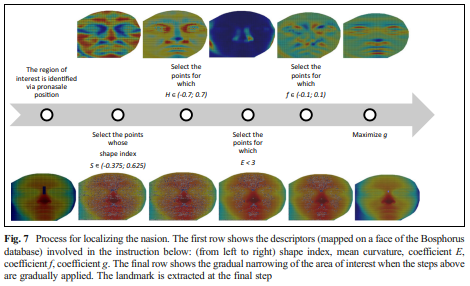

### The Pseudocode of the Implementation

1. Find the sellion
2. Assign the sellion as the nasion


Sellion vs Nasion: 

In some literature sellion and radix is the same landmark. However, there are some literature they differ these two points. The difference is based on a bone that is not visible on the surface, so we decided to consider both landmarks at the same location

### Nasion Implementation
#### Pseudocode Reference: Same as Sellion

Nasion and Sellion are considered the same landmark.

In [3]:
!pip install trimesh
import trimesh
import numpy as np

def find_nasion(mesh):
  return find_sellion(mesh)

TEST_3DMODEL = 'OguzhanTopsakal.obj'
mesh = trimesh.load(TEST_3DMODEL) # load mesh
print(find_sellion(mesh)) # same as sellion

x: -0.92671 y: 38.641 z: 106.563


## Subnasale

**Subnasale: The deepest point at the junction of the base of the columella and the upper lip in the midline [Mazhar et. al. 2021]**

### The pseudocode based on [Abu, Ngo, et. al. 2019]

---



Dependencies: 
- First need to detect pronasale.

1. Locate the pronasale
2. Starting at the pronasale point, move down the y-axis along the curvature of the face until you reach a local z-minimum
3. Starting at this local minimum point, move up the y-axis until you reach the pronasale. Detect the angle at each point. The angle between three points, A, B, and C, is the inverse cosine of the dot product of the vectors BA and BC
4. The point with the minimum angle is the subnasale. See image below

Notes: How the points A, B, and C are chosen (hence the BA and BC might be important).

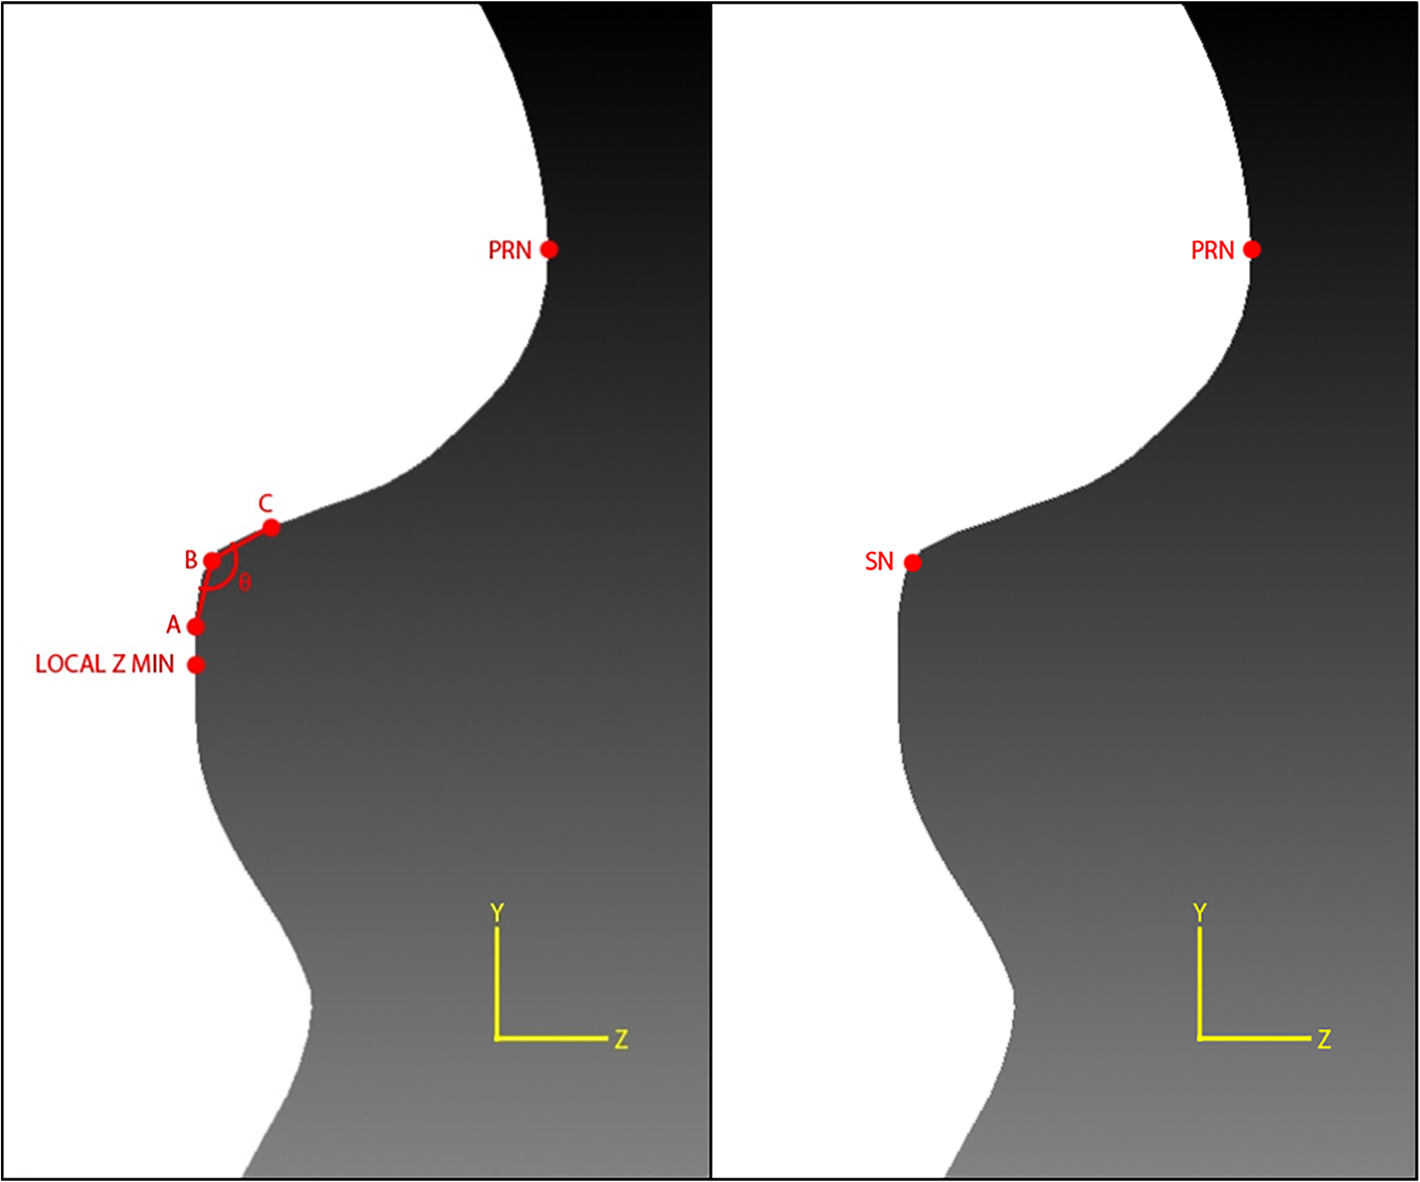

### The pseudocode based on [Vezzetti, Marcolin 2014]

Check for the terms used: [Definitions](#scrollTo=TTke5AddhLvF)

In this paper, x goes from the forehead (positive) to chin (negative), y goes from ear to ear, and z represents depth

1. Select the point with the minimum g value
2. Assign this point to subnasale

Notes: Trying to find the point of maximum concavity based on the *g* formula (see Definitions).

### The pseudoce based on [Liang, Wu, et. al. 2013]

Dependencies:


*   Detection of pronasale



1.	Select the points below the pronasale
2.	Find the local z-minima with the same x-value as the pronasale
3.	Assign the point at the local minima to the subnasale

Notes: This pseudocode picks the point with the lowest z-value on the same vertical axis underneath prn. However, Liang's et. al.'s pseudocode conflicts with Abu, Ngo, et. al

### The pseudocode based on [Guo, Mei et. al. 2013]

Dependencies:
* Detection of pronasale
* Forward orientation of the face

1. Detect pronasale
2. Orient the face into the correct orientation
3. Select the points right below the pronasale
4. Locate the inflection point with the minimum angle among these selected point
5. Assign this minimum angle point to the subnasale

Notes: What "right below" means needs to be figured out.

### The pseudocode based on [Moos, Marcolin, et. al. 2017]

Check for the terms: [Definitions](#scrollTo=TTke5AddhLvF)

1.	Identify region of interest, starting from pronasale
2.	Select points for which f is close to 0 and f (x, y + Δy) < 0, f (x, y − Δy) < 0
3.	Minimize g

### The pseudocode based on [Vezzetti, E., Marcolin, F., Tornincasa, S. et al. 2018]

Check for the terms: [Definitions](#scrollTo=TTke5AddhLvF)

1. The shape index lies in the range (−0.47; 0.47), i.e. this point could be associated to a saddle shape; 
2. the first derivative with respect of x is approximately equal to zero, i.e. Dx ∊ (−1.5; 1.5); 
3. the second derivative with respect of x is negative; 
4. the mean curvature is lower than an experimentally set threshold, namely H < 1.1; 
5. the first fundamental form coefficient F lies in the range (−2; 2);
6. the first derivative with respect of y has a local maximum in correspondence to the subnasale point

Notes: 

- Conditions 1–5 are used to refine the area of interest
- Condition 6 is adopted to extract the point.

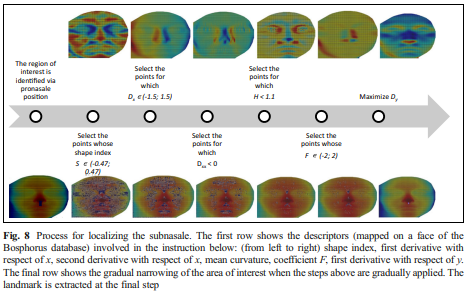

### Pseudocode of the Implementation

1. Find the pronasale
2. Define the height of search region based on Nasal height (Nasion (n) to Subnasale (sn)) and Nasal bridge length (Nasion (n) to Pronasale (prn)) and the depth of the search region based on the Nasal Protrusion (Pronasale (prn) to Subnasale (sn)) statistics from the facebase.org
3. Search for an inflection point on z-axis below the y-axis of pronasale on decreasing order (Note that this algorithm might work if y-axis of pronasale if less than y-axis of the subnasale. Dropping tip kind of nose might have such property)
4. Assign this vertex as the subnasale


### Subnasale Implementation
#### Pseudocode Reference: Guo, Mei et. al. 2013

In [4]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_y(vertex): # used as key for sorting by y
  return vertex.y

def find_subnasale(mesh):
  MAX_WIDTH = 5
  # The MAX_WIDTH is used solely for selecting vertices in a line.

  # The MAX_DEPTH is selected because the depth from the pronasale to the subnasale according to facebase Nasal Protrusion 
  # (https://www.facebase.org/facial_norms/summary/#nasalpro)
  # for a 30 yr old is approximately 20.6 and with 3 std is 26.27.
  MAX_DEPTH = 20.6 + (5 * 1.89)

  # Find max height using 
  # Nasal height (55.11) - 3 std (4.23) - Nasal bridge length (48.33) - 3 std (4.09)
  # Subtract minimum Nasal bridge length from max Nasal height
  # (https://www.facebase.org/facial_norms/summary/#nasalheight) 
  # (https://www.facebase.org/facial_norms/summary/#nasalbdglength)
  STD = 4.23 - 4.09
  RANGE_STD_COUNT = 5
  CURRENT_MAX_HEIGHT = 55.1 - 48.33
  MAX_HEIGHT = CURRENT_MAX_HEIGHT + RANGE_STD_COUNT * STD #55.11 + (3 * 4.23) - (48.33 + 3 * 4.09)
  #print('max height', MAX_HEIGHT)

  # To find the inflection point, (a point on a smooth plane curve at which the curvature changes sign), 
  # The INFLECTION_RANGE was calculated by using on the test 3D models we have 
  # and selecting the difference in z-value that worked most accurately across them as facebase provides no similar statistic.
  INFLECTION_RANGE = 1.5

  MAX_HEIGHT = 20
  INCREMENT = 1
  CURRENT_MIN_HEIGHT = 12
  CURRENT_MAX_HEIGHT = 13 
  pronasale = find_pronasale(mesh) # find pronasale
  vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use

  while CURRENT_MAX_HEIGHT < MAX_HEIGHT:
    section = [] # initialize slice of sorted vertices
    section.clear()
    for vertex in vertices: # find all vertices within range of pronasale on decreasing y
      if (vertex.y < pronasale.y - CURRENT_MIN_HEIGHT
          and vertex.y > pronasale.y - CURRENT_MAX_HEIGHT 
          and vertex.x < pronasale.x + MAX_WIDTH 
          and vertex.x > pronasale.x - MAX_WIDTH 
          and vertex.z > pronasale.z - MAX_DEPTH 
          and vertex.z < pronasale.z):
        section.append(vertex)

    #print('len: ' , len(section))
    section.sort(key = sort_by_y) # sort by y-values
    for i, vertex in enumerate(section):
      # Check if the z-value of the next vertex minus the z-value of the current vertex exceeds the inflection range, 
      # if the z-value between two vertices exceeds a specific value, inflection occurs
      if (i < len(section) - 2):
        if (abs(section[i + 1].z - vertex.z) > INFLECTION_RANGE 
            and abs(section[i + 2].z - vertex.z) > INFLECTION_RANGE):
          subnasale = vertex
          return subnasale
    if not 'subnasale' in locals():
      CURRENT_MAX_HEIGHT = CURRENT_MAX_HEIGHT + INCREMENT
      CURRENT_MIN_HEIGHT = CURRENT_MIN_HEIGHT - INCREMENT

  # If subnasale was not found as a inflection point, return the point in the middle
  if not 'subnasale' in locals():
    return section[int(len(section) / 2)]

TEST_3DMODEL = 'OguzhanTopsakal.obj'
#TEST_3DMODEL = '2022-08-28-11-26-31-BB7FDEB2-9810-4087-AA37-20783CAEE052.obj'
mesh = trimesh.load(TEST_3DMODEL) # load mesh
print("subnasale:", find_subnasale(mesh))

subnasale: x: -2.68216 y: -22.8592 z: 110.956


## Subnasale (left/right)

**Subnasale (left/right): The point where the right/left columella meets the nostril sill [Mazhar et. al. 2021]**

No pseudocode exists in the literature.

### Pseudocode - Original

1. Start from subnasale
2. Travel in one x-direction (left or right)
3. Check angle between the subnasale and the current point
4. If the angle is changing significantly, choose the previous point as the subnasale left or right, respective to which direction was chosen.
5. Repeat for the other direction.

### Pseudocode of the Implementation

1. Find the subnasale
2. Select vertices to the left based on the 'subnasale width' (Right Subalare (sbal_r) to Left Subalare (sbal_l)) stats from facebase.org's 3D norms database. Since we are interested in the subnasale and it is approximately half the distance to the subalare from the subnasale, we divide 'subnasale width' by 2
3. Sort the vertices by increasing x
4. Assign the vertex with the largest x as the subnasale left
5. Select vertices to the right based on the 'subnasale width' stats from facebase.org's 3D norms database
6. Sort the vertices by decreasing x
7. Assign the vertex with the smallest x as the subnasale right

### Subnasale (left/right) Implementation

In [5]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_x(vertex):
  return vertex.x

def find_subnasale_left_right(mesh):
    MAX_DEPTH = 30
    # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

    STD_HEIGHT = 1.5
    MAX_HEIGHT = 3
    # The difference between y axis values of subnasale and subnasale left and right are determined based on our statistics based on 117 measurements

    CURRENT_RANGE_LEFT_RIGHT = 5
    STD_LEFT_RIGHT = 2
    RANGE_STD_COUNT = 3
    MAX_WIDTH = CURRENT_RANGE_LEFT_RIGHT + (RANGE_STD_COUNT * STD_LEFT_RIGHT)
    # The difference between x axis values of subnasale and subnasale left and right are determined based on our statistics based on 117 measurements

    vertices = turn_vertices_into_objects(mesh.vertices)
    subnasale_left_right = []

    subnasale = find_subnasale(mesh)

    while CURRENT_RANGE_LEFT_RIGHT < MAX_WIDTH:
      # left
      section = []
      section.clear()
      for vertex in vertices:
        if (vertex.x > subnasale.x 
            and vertex.x < subnasale.x + CURRENT_RANGE_LEFT_RIGHT 
            and vertex.y > subnasale.y 
            and vertex.y < subnasale.y + MAX_HEIGHT 
            and vertex.z < subnasale.z + MAX_DEPTH 
            and vertex.z > subnasale.z - MAX_DEPTH):
          section.append(vertex)
      section.sort(key=sort_by_x)
      subnasale_left_right.append(section[-1])

      # right
      section.clear()
      section = []
      for vertex in vertices:
        if (vertex.x < subnasale.x 
            and vertex.x > subnasale.x - CURRENT_RANGE_LEFT_RIGHT 
            and vertex.y > subnasale.y 
            and vertex.y < subnasale.y + MAX_HEIGHT 
            and vertex.z < subnasale.z + MAX_DEPTH 
            and vertex.z > subnasale.z - MAX_DEPTH):
          section.append(vertex)
      section.sort(key=sort_by_x)
      subnasale_left_right.append(section[0])

      if 'subnasale_left_right' in locals():
        return subnasale_left_right
      else:
        CURRENT_RANGE_LEFT_RIGHT += STD_LEFT_RIGHT


TEST_3DMODEL = 'OguzhanTopsakal.obj'
mesh = trimesh.load(TEST_3DMODEL) # load mesh
subnasale_left_right = find_subnasale_left_right(mesh)
print("subnasale left:", subnasale_left_right[0])
print("subnasale right:", subnasale_left_right[1])

subnasale left: x: 1.92121 y: -22.5623 z: 120.643
subnasale right: x: -7.64501 y: -22.3753 z: 106.773


## Alar Flare (Alare) (left/right)

**Alar Flare (Alare): The most lateral point on the right ala of the nose [Mazhar et. al. 2021]**

### The pseudocode based on [Abu, Ngo, et. al. 2019]

Dependencies: 
- Detection of pronasale
- Detection of subnasale

1. Detect pronasale and subnasale
2. Locate all points whose y and z coordinates are between the pronasale and subnasale
3. Of these, the point with the largest x is al-right and smallest x is al-left

Notes: Assumption is that the points are chosen within the nose region. Depends on corrrectly identifying nose region, otherwise will give incorrect results.

### The pseudocode based on [Vezzetti, Marcolin 2014]

Check the terms: [Definitions](#scrollTo=TTke5AddhLvF)

In this paper, x goes from the forehead (positive) to chin (negative), y goes from ear to ear, and z represents depth

1. Select the points with shape index in the range [0.375, 0.625) (ridge)
2. Select the points with curvedness index greater than u (where u = 0.025 is instrument uncertainty)
3. Select the points on the right side of the face in which Dx is positive
4. Of the points selected in steps 1-3, locate the maximum E and assign that to alar flare right
5. Select the points from steps 1 and 2
6. Select the points on the left side of the face in which Dx is negative
7. Of the points selected in steps 5-6, locate the maximum E and assign that to alar flare left

Notes: Using shape index and curvedness index formulae to pinpoint alar flare right and alar flare left.

### The pseudocode based on [Liang, Wu, et. al. 2013]

Dependencies:


*   Detection of pronasale
*   Detection of subnasale



1.	Locate the pronasale and the subnasale
2.	Select all points below the pronasale and above the subnasale
3.	Find the surface normal vector n(n_x, n_y, n_z) of every point in the region
4.	Find the maximum n_x value in the region
5.	Assign the point with the maximum n_x value to alar flare left
6.	Find the minimum n_x value in the region
7.	Assign the point with the minimum n_x value to alar flare right


Notes: Finding the alar flare via the x-component of the surface normal vector. Once the surface normal vectors is found, the algorithm is promising.

### The pseudocode based on [Guo, Mei et. al. 2013]

Dependencies:
* Detection of pronasale
* Forward orientation of the face

1. Locate the pronasale
2. Orient the face into a standard orientation
3. Starting from the pronasale and moving horizontally outward, search for inflection points
    Inflection points occur when the second derivative changes sign. Since we are searching in one dimension, the second partial x-derivative will work
4. Find the inflection points with minimum local angles on each side
5. Assign these to the alare points

Notes: Find the inflection points to determine where the alar flares are, then determine its specific location by checking angles.

### The pseudocode based on [Berretti, Ben Amor, et. al. 2011]

Dependencies:
* Preprocessing of the model
* Detection of pronasale

1. Perform the preprocessing and pronasale localization as described in the pronasale section above
2. Restrict the search to a 50mm*42mm rectangle centered on the pronasale
3. Identify the edges of the facial range using Laplacian of Gaussian (LoG) edge detector
4. Starting at the pronasale, traverse horizontally until you hit the first edges. These are the left and right boundaries of the nose
5. Detect points on this boundary with high negative curvature (critical points)
6. Assign the leftmost and rightmost critical points to the alare-left and alare-right

Notes: Find points on the edge of the region. This is very similar to [Gupta, Markey, et. al. 2010]

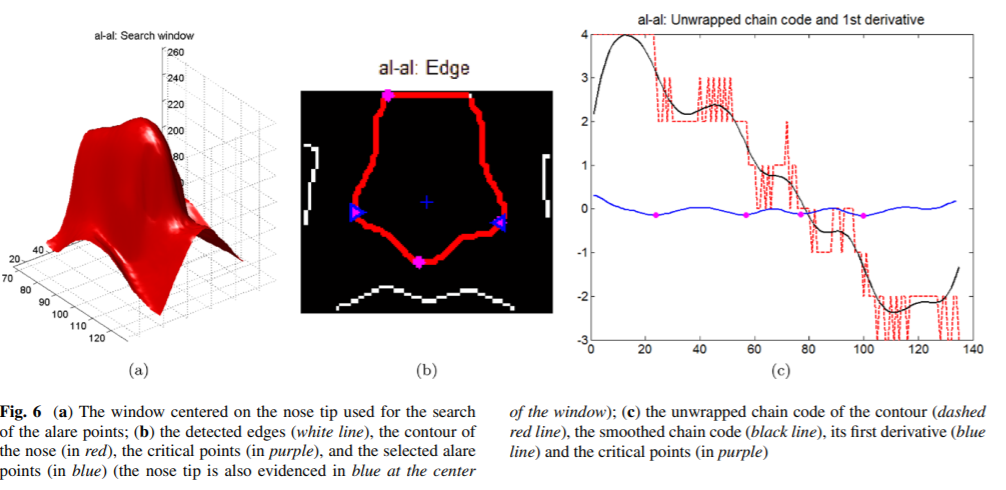

### The pseudocode based on [Gupta, Markey, et. al. 2010]

Check the terms: [Definitions](#def_gupta)

Dependencies:

*   Detection of pronasale
*   Generation of facial range image

1.	Locate the pronasale
2.	Restrict the search to a 42mm x 50mm sub-region of the facial range image centered at the pronasale
5.	Locate edges on the facial range image (done using a Laplacian of Gaussian edge detector, with σ = 7 pixels)
6.	Isolate the left and right boundaries of the nose on the edge map by following the x-axis in both directions from the pronasale and retaining the first curves along the x-axis
7.	Traverse the nasale boundary curves in a clockwise direction and locate all the critical points with a negative curvature value along the nasale boundary contours
8.	Among the critical points located, find the leftmost and rightmost critical points that are the closest to the pronasale in the y-direction
9.	Assign the leftmost point to the left alar
10.	Assign the rightmost point to the right alar

![[Gupta, Markey, et al]_Figure6.PNG](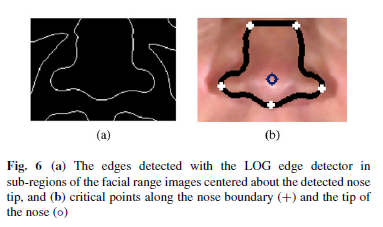)

Notes: This is very similar to [Berretti, Ben Amor, et. al. 2011] The graphics help explain what's going on.

### The pseudocode based on [Vezzetti, E., Marcolin, F., Tornincasa, S. et al. 2018]

Check the terms: [Definition](#scrollTo=TTke5AddhLvF)

1. the coefficient e is lower than a threshold value, i.e. e < 0.4;
2. the coefficient E has a local maximum in correspondence to the alae points.

Notes:

- The right AL is detected first, by identifying an area of interest at approximately a similar y value of PRN. The area of research of the left AL is defined symmetrically.
- Condition 1 refines the area of interest
- Condition 2 localizes the points.
- See the definitions for e and E.

### The pseudocode based on [M. P. Pamplona Segundo, L. Silva, O. R. P. Bellon and C. C. Queirolo]

1. Identify the y-coordinate of the pronasale
2. Assign the closest peak to the nose tip as the nose base y-coordinate
3. From the pronasale, we find the "nose corners" as being the maximum variations in the horizontal profile curve (the x-projection that represents the set of points with the same y-coordinate value).
4. Calculate the gradient information of the curve to identify one peak on each side of the pronasale.

Notes: This study does not specify exactly what landmark the "nose base" is, but from the context, this might be the most appropriate section for it.

### Pseudocode of the Implementation 

1. Find the pronasale and subnasale
2. Select all vertices above the subnasale's y and between the subnasale's z and pronasale's z
3. Sort the vertices by x
4. Assign the leftmost vertex as the alar flare left
5. Assign the rightmost vertex as the alar flare right

### Alar Flare Implementation
#### Updated/Influenced on the Pseudocode Reference: Liang, Wu, et. al. 2013 and Abu, Ngo, et. al. 2019

In [6]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_x_plus_y(vertex):
  return vertex.x + vertex.y

def sort_by_x_minus_y(vertex):
  return vertex.x - vertex.y

def sort_by_x(vertex): # used as key for sorting by x
  return vertex.x

def find_alar_flare(mesh):
  # MAX_DEPTH = 26.27 # (20.6 + 3 * 1.89) => mean + 3 std of nasal protrusion

  STD = 3.1 # STD for nasal width
  RANGE_STD_COUNT = 3
  MEAN_WIDTH = 34.46 # Mean for nasal width
  CURRENT_WIDTH = MEAN_WIDTH / 2
  MAX_WIDTH = (MEAN_WIDTH + (RANGE_STD_COUNT * STD))/2
  # The MAX_WIDTH is selected because the nasal width according to facebase 
  # (https://www.facebase.org/facial_norms/summary/#nasalwidth)
  # for a 30 yr old is approximately 34.47 and half with 3 std is 21.885.

  pronasale = find_pronasale(mesh)
  subnasale = find_subnasale(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices)
  alar_flare = []
  while CURRENT_WIDTH < MAX_WIDTH:
    # left
    section = []
    section.clear()

    # TAYLOR: Please first test this with the lines commented out
    # and then test it after uncommenting the lines that have MAX_WIDTH
    # if it provides good results without the MAX_WIDTH, we will restructure the loop
    for vertex in vertices:
      if (vertex.x > pronasale.x 
          #and vertex.x < pronasale.x + CURRENT_WIDTH 
          and vertex.y > subnasale.y 
          and vertex.y < pronasale.y 
          and vertex.z > subnasale.z
          and vertex.z < pronasale.z):
          section.append(vertex)

    #section.sort(key=sort_by_x)
    section.sort(key=sort_by_x_plus_y)
    alar_flare.append(section[-1])
    # right
    section.clear()
    for vertex in vertices:
      if (vertex.x < pronasale.x 
          #and vertex.x > pronasale.x - CURRENT_WIDTH 
          and vertex.y > subnasale.y 
          and vertex.y < pronasale.y 
          and vertex.z > subnasale.z
          and vertex.z < pronasale.z):
        section.append(vertex)
    #section.sort(key=sort_by_x)
    section.sort(key=sort_by_x_minus_y)
    alar_flare.append(section[0])
    if 'alar_flare' in locals():
      return alar_flare
    else:
      CURRENT_WIDTH = CURRENT_WIDTH + (STD / 2) 

TEST_3DMODEL = 'OguzhanTopsakal.obj'
mesh = trimesh.load(TEST_3DMODEL) # load mesh
alar_flare = find_alar_flare(mesh)
print("alar flare left:", alar_flare[0])
print("alar flare right:", alar_flare[1])

alar flare left: x: 17.7839 y: -11.2507 z: 111.905
alar flare right: x: -16.6547 y: -10.15 z: 111.929


## Endocanthion (left/right)

**Endocanthion: The inner corner of the right eye where the upper and lower eyelids meet [Mazhar et. al. 2021]**

### The pseudocode based on [Vezzetti, Marcolin 2014]

Check for the terms used: [Definitions](#scrollTo=TTke5AddhLvF)

In this paper, x goes from the forehead (positive) to chin (negative), y goes from ear to ear, and z represents depth

1. Select the points whose shape index is in range [-1, -0.375) (cup/rut)
2. Select the critical points
3. Select the points where Dxx is negative
4. Select the points on the right side of the face
5. Select the points on which Dx is positive
6. Select the points on which f is negative
7. Select the points on which F is negative
8. Of the points selected in steps 1-7, assign the point with minimum e to endocanthion right
9. Select the points in steps 1-3
10. Select the points on the left side of the face
11. Select the points on which Dx is negative
12. Select the points on which f is positive
13. Select the points on which F is positive
14. Of the points selected in steps 9-13, assign the point with minimum e to endocanthion left

Notes: We're using the equations to determine the location of the endocanthion. We should determine which landmark/ criteria to use for determining the dividing point between right and left side of the face for steps 4 and 10.

### The pseudocode based on [Liang, Wu, et. al. 2013]

Dependencies:

*   Detection of postaurale
*   Detection of sellion


1.	Locate the postaurale and the sellion
2.	Select all points above the postaurale and below the sellion along the y-axis
3.	Restrict these points to those where sellion_x < x < 0.8*left_postaurale_x along the x-axis (region around the left eye)
4.  Restrict these points to only those on sharp edges
5.	Find the point with the least Euclidian distance to the corner with the minimum x- and z-values (the left-back-most point)
6.	Assign this point to the left endocanthion
7.	Select the same points in step 2
8.	Restrict these points to those where 0.8*right_postaurale_x < x < sellion_x along the x-axis (region around the right eye)
9.  Restruct these points to only those on sharp edges
10.	Find the point with the least Euclidian distance to the corner with the maximum x-value and the minimum z-value (the right-back-most point)
11.	Assign this point to the right endocanthion

Notes: Select the regions consisting of each eye, then find the closest point on the sharp edge to the corner. We will need to determine a way to find what constitutes as "sharp edges".

### The pseudocode based on [Berretti, Ben Amor, et. al. 2011]

Dependencies:
* Preprocessing of the model
* Detection of pronasale
* Detection of alare points

1. Preprocess the model as described in the pronasale section, and detect the pronasale (prn) and alare points (al)
2. Restrict the search region to y-values between (0.126×|prn_y−v_y|+prn_y) and (0.570×|prn_y−v_y|+prn_y)
    v is the upper point of the face, how this point was chosen is not clear
3. Restrict the search to x-values between prn_x and (al_left_x+0.5*al_width) for the left point, and between (al_right_x-0.5*al_width) and prn_x for the right point
    al_width = |al_right_x - al_left_x|
4. Use the SIFT detection algorithm to find the most significant keypoint within the regions
5. Assign these 2 most significant keypoints to endocanthion left and right

Notes: It is not clear how the upper point of the face is chosen. Need to understand the SIFT algorithm to be able to implement this. 

### The pseudocode based on [Galvánek, Furmanová, et. al. 2015]

The eye segments are not denoised or smoothed as it reduces accuracy

Dependencies:

*   Detection of pronasale



[Segmentation of eye regions]
1.	Threshold the principal curvature values (done using an automatic threshold filter)
      This is done to filter out regions unlikely to contain the desired landmarks (best threshold results were obtained using Max Entropy threshold method)
2.	Locate the pronasale
3.  Using the computed threshold, find the largest continuous region above and to the left of the pronasale. This is the left eye region.
4.  Find the largest continuous region above and to the right of the pronasale. This is the right eye region.
[Landmark detection]
5.	Find the rightmost point of the left eye region
6.	Assign this point to the left endocanthion
7.	Find the leftmost point of the right eye region
8.	Assign this point to the right endocanthion

Notes: 

Detect the regions containing the eyes, then assign the rightmost point of the left eye and the leftmost of the right eye as the endocanthi.

The threshold values for the principal curvatures are not listed, making this algorithm difficult to implement.

![[Galvánek, Furmanová, et al]_Figure4.PNG](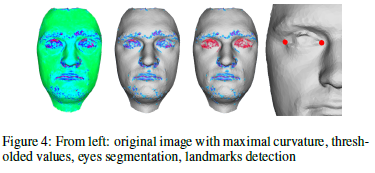)

### The pseudocode based on [Gupta, Markey, et. al. 2010]

Check the terms: [Definitions](#def_gupta)

Dependencies:

*   Detection of pronasale
*   Detection of alar (left/right)
*   Generation of a facial range image


1.	Locate the pronasale and the left and right alar
2.	Find the regions of the face with distinctly concave elliptic curvatures (K > 0 and H > 0)
3.	Locate the highest vertical point of the 3D face and assign it to ν
4.	Fix the upper limits of the regions to (prn_y + 0.3803 * 1.5 * |prn_y – ν_y|)
5.	Fix the lower limits of the regions to (prn_y + 0.3803 * 0.33 * |prn_y – ν_y|)
6.	Restrict the region horizontally to between prn_x and (al_left_x + 0.5 * |al_left_x – al_right_x|) (region around left eye)
7.	Restrict the region horizontally to between prn_x and (al_right_x – 0.5 * |al_left_x – al_right_x|) (region around right eye)
8.	Locate the points with the highest Gaussian curvatures as the curvature estimates within the two regions
9.	Search for the final positions within a region of size 20mm x 20mm about the curvature estimates of these points (done using the 2D+3D EBGM algorithm)
10.	Assign the final positions to the left and right endocanthions

Notes: 

Some of the logic here is similar to a previous algorithm in which points for the alae are used to determine the regions containing the eyes. This method just involves looking for elliptic curvatures.

This algorithm will require an understanding of the EBGM algorithm. We should also understand why we are using the numbers used in steps 4 and 5.

![[Gupta, Markey, et al]_Figure7.PNG](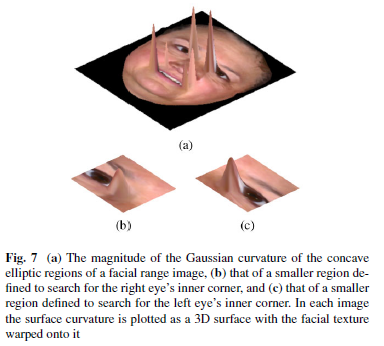)

### The pseudocode based on [Moos, Marcolin, et. al. 2017] 



Check for the terms: [Definitions](#scrollTo=TTke5AddhLvF)

1.	Select points whose shape index is S ϵ [-1, -0.375]
2.	Select points with Dxx < 0
3.	Select points for which Dxy ϵ [-0.1, 0.1]
4.	Select points for which F < 0 on right and F > 0 on left
5.	Minimize e

### The pseudocode based on [Vezzetti, E., Marcolin, F., Tornincasa, S. et al. 2018]

Check for the terms: [Definitions](#scrollTo=TTke5AddhLvF)

1. endocanthions belong to the set of points whose geometrical shape is cup or rut, i.e. S ∊ (−1; −0.375); 
2. the mixed derivative is lower than a threshold value, Dxy < 0.6; 
3. the first derivative with respect of x ranges from −3 to 3, i.e. Dx ∊ (−3; 3); 
4. the first derivative with respect of y ranges from −3.5 to 3.5, i.e. Dy ∊ (−3.5; 3.5); 
5. the coefficient f is nearly equal to zero, namely f ∊ (−0.4; 0.4), and is positive on the right endocanthion and negative on the left; 
6. the mean curvature H is higher than threshold value −0.6; 
7. the mean-filtered coefficient e has a maximum in correspondence to these points

Notes: 

Endocanthions’ areas of interests are localized relying on the positions of alae and nasion previously localized.

Conditions 1 to 6 support the refinement of the areas of research

Condition 7 detects the two points.

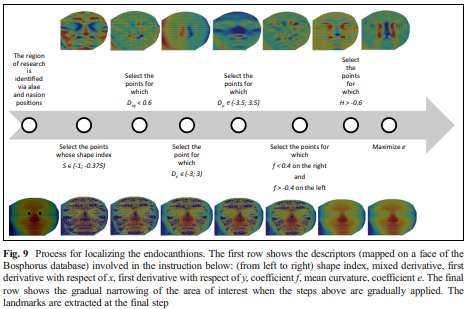

### The pseudocode based on [M. P. Pamplona Segundo, L. Silva, O. R. P. Bellon and C. C. Queirolo]

1. Determine the percentage of pit curvature points regarding every set of points with the same y-coordinate (this returns three peaks - eyes, nose base, and mouth)
2. Calculate the percentage of pit curvature points for every column in a set of neighbor rows centered in the eye y-coordinate.
3. The left eye corner x-coordinate is the beginning of the first peak in this x-projection.
4. The right eye corner x-coordinate is the end of the second peak in the same projection.

Notes: This study does not specify whether this is for the endocanthion or exocanthion. This will be placed in exocanthion section as well.

### Pseudocode of the Implementation

1. Find the sellion
2. Starting from the sellion, select vertices to the left in a region defined based on the 'Intercanthal Width' (Right Endocanthion (en_r) to Left Endocanthion (en_l)) statistics from facebase.org's 3D norms database. 
3. First, select a region that is away by the mean value of 'Intercanthal Width' from the sellion. If a local minima is not found, expand the region by standard deviation of 'Intercanthal Width' at each iteration.
4. When the vertex that satisfiy the local minima condition (x value is larger than next two vertices and smaller then previous two vertices) is found, assign this vertex as the left endocanthion
5. Repeat the same process in the opposite direction to find the right endocanthion

### Endocanthion Implementation
#### Pseudocode Reference: Original 

In [7]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_x_y_left_endo(vertex):
  return vertex.x - vertex.y

def sort_by_x_y_right_endo(vertex):
  return (vertex.x * -1) - vertex.y

def sort_by_z(vertex):
  return vertex.z

def find_endocanthion(mesh):
  # The MAX_HEIGHT is used to provide a line of selection for vertices.
  MAX_HEIGHT = 20
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.
  MAX_DEPTH = 20

  STD = 2.69
  CURRENT_MIN_WIDTH = (32.25 - STD) / 2
  CURRENT_MAX_WIDTH = (32.25 + STD) / 2
  MAX_WIDTH = (32.25 + (3 * STD)) / 2
  # The MAX_WIDTH is determined based on the Intercanthal Width between the endocanthions according to facebase 
  # (https://www.facebase.org/facial_norms/summary/#incanthwidth)
  # for 30 yr olds is approximately 32.25. 
  # The actual distance from the sellion to a endocanthion will be half this. 
  sellion = find_sellion(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices)
  endocanthion = []
  
  while CURRENT_MAX_WIDTH < MAX_WIDTH:
    # left
    section = []
    section.clear()
    for vertex in vertices:
      if (vertex.y < sellion.y
          and vertex.y > sellion.y - MAX_HEIGHT 
          and vertex.x > sellion.x + CURRENT_MIN_WIDTH
          and vertex.x < sellion.x + CURRENT_MAX_WIDTH 
          and vertex.z > sellion.z - MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x_y_left_endo) #sort_by_x_y_left_endo
    
    tmp = section[-1]
    for i, vertex in enumerate(section):
      if (i < len(section) - 4):
        # check if vertex is a relative minima for z
        if (vertex.z < section[i + 1].z 
            and vertex.z > section[i - 1].z
            and vertex.z < section[i + 2].z 
            and vertex.z > section[i - 2].z): 
          tmp = vertex
    endocanthion.append(tmp)

    # right
    section.clear()
    for vertex in vertices:
      if (vertex.y < sellion.y
          and vertex.y > sellion.y - MAX_HEIGHT 
          and vertex.x < sellion.x - CURRENT_MIN_WIDTH
          and vertex.x > sellion.x - CURRENT_MAX_WIDTH 
          and vertex.z > sellion.z - MAX_DEPTH):
        section.append(vertex)
        
    section.sort(key=sort_by_x_y_right_endo) #sort_by_x_y_right_endo
    tmp = section[-1]
    for i, vertex in enumerate(section):
      if (i < len(section) - 4):
        # check if vertex is a relative minima for z
        if (vertex.z < section[i + 1].z 
            and vertex.z > section[i - 1].z
            and vertex.z < section[i + 2].z 
            and vertex.z > section[i - 2].z): 
          tmp = vertex
    endocanthion.append(tmp)
    if 'endocanthion' in locals():
      return endocanthion
    else:
      CURRENT_MIN_WIDTH = CURRENT_MIN_WIDTH - (STD/2)
      CURRENT_MAX_WIDTH = CURRENT_MAX_WIDTH + (STD/2)
  

TEST_3DMODEL = 'OguzhanTopsakal.obj'

TEST_3DMODEL = '2022-09-22-06-40-46-8A618515-22B9-4E9C-8C8B-A10FE8C5DA25.obj'

mesh = trimesh.load(TEST_3DMODEL)
endocanthion = find_endocanthion(mesh)
print("left endocanthion:", endocanthion[0])
print("right endocanthion:", endocanthion[1])

left endocanthion: x: 15.7725 y: 23.8023 z: 88.9599
right endocanthion: x: -18.5612 y: 24.0628 z: 83.1037


## Exocanthion (left/right)

**Exocanthion: The outer corner of the right eye where the upper and lower eyelids meet [Mazhar et. al. 2021]**

### The following is based on [Vezzetti, Marcolin 2014]

Check for the terms: [Definitions](#scrollTo=TTke5AddhLvF)

In this paper, x goes from the forehead (positive) to chin (negative), y goes from ear to ear, and z represents depth

1. Select the points whose shape index is in range [0.375, 0.625) (ridge)
2. Select the points at Dyy is positive
3. Select the points for which g > 0
4. Select the points for which K >= 0
5. Select the points on the right side of the face
6. Select the points for which F < 0 and Dx > 0
7. Of these points, find the maximum E value and assign that point to exocanthion right
8. Select the points from steps 1-4
9. Select the points on the left side of the face
10. Select he points for which F > 0 and Dx < 0
11. Of these points, find the maximum E value and assign that point to exocanthion left

Notes: 

Using equations to isolate the exocanthion in each eye.

If we can choose a point to separate the left from right of the face (probably the pronasale), this algorithm is promising.

### The pseudocode based on [Liang, Wu, et. al. 2013]

Dependencies:

*   Detection of postaurale
*   Detection of sellion



1.	Locate the postaurale and the sellion
2.	Select all points above the postaurale and below the sellion along the y-axis
3.	Restrict these points to those where sellion_x < x < 0.8*left_postaurale_x (region around the left eye)
4.  Restrict these points to only points on sharp edges
5.	Find the point with the least Euclidian distance to the corner with the maximum x-value and the minimum y-value (the right-back-most point)
6.	Assign this point to the left exocanthion
7.	Select the same points in step 2
8.	Restrict these points to those where 0.8*right_postaurale_x < x < sellion_x (region around the right eye)
9.  Restrict these points to only points on sharp edges
10.	Find the point with the least Euclidian distance to the corner with the minimum x- and y-values (the left-back-most point)
11.	Assign this point to the right exocanthion

Notes: 

The authors use nearly the same algorithm for finding the endocanthion; they just change the point that they want to find.

We will need to determine a way to find what constitutes as "sharp edges"

### The pseudocode based on [Berretti, Ben Amor, et. al. 2011]

Dependencies:
* Preprocessing of the model
* Detection of pronasale
* Detection of alare points
* Detection of endocanthion points

1. Preprocess the model, and detect the pronasal, alare, and endocanthion (en)
2. Find an initial estimate of ex_left: x=en_left_x+en_width, y=en_y_avg
    en_width=|en_left_x - en_right_x| and en_y_avg = (en_left_y+en_right_y)/2
3. Find an initial estimate of ex_right: x=en_right_x-en_width, y=en_y_avg
4. Construct a search window of 34mm*20mm centered around both of these points
5. Use the SIFT detection algorithm to find the most significant keypoint within the regions
6. Assign these 2 most significant keypoints to exocanthion left and right

Notes: 

The authors use the same algorithm for finding the endocanthi; they just adjust it to find the exocanthion.

If we understand the SIFT algorithm, then I believe this will work.

### The pseudocode based on [Galvánek, Furmanová, et. al. 2015]

The eye segments are not denoised or smoothed as it reduces accuracy

Dependencies:

*   Detection of pronasale
*   Segmentation of eye regions

1.	Segment both eye regions as shown in the associated left and right endocanthion algorithm
2.	Find the leftmost point of the left eye region
3.	Assign this point to the left exocanthion
4.	Find the rightmost point of the right eye region
5.	Assign this point to the right exocanthion

Notes: This seems like an straighforward algorithm, but it may be inaccurate if the eye regions are poorly defined.

### The following is based on [Gupta, Markey, et. al. 2010] 

Check for the terms: [Definitions](#def_gupta)

Dependencies:

*   Detection of endocanthion (left/right)
*   Generation of a facial range image

1.	Locate the left and right endocanthions
2.	Find the point at (en_left_x + |en_left_x – en_right_x|, (en_left_y + en_right_y)/2) (outer corner of left eye)
3.	Assign this point to the left exocanthion (initial estimate)
4.	Find the point at (en_right_x - |en_left_x – en_right_x|, (en_left_y + en_right_y)/2) (outer corner of right eye)
5.	Assign this point to the right exocanthion (initial estimate)
6.	Search for the final position within a rectangular region of size 20mm x 34mm about the initial estimates for the left and right exocanthions (done using the 2D EBGM algorithm)
7.	Assign the final positions to the left and right exocanthions (final estimate)

Notes: 

After finding the endocanthion, use a simple equation to estimate where the exocanthion are going to be, then use an algorithm to refine that position. 

Need to understand the 2D EBGM algorithm though.

### The pseudocode based on [Vezzetti, E., Marcolin, F., Tornincasa, S. et al. 2018] 

Check for the terms: [Definitions](#scrollTo=TTke5AddhLvF)

1. the first derivative with respect of y is positive; 
2. the second derivative with respect of x is positive; 
3. the second derivative with respect of y lies in the range (−3; 3); 
4. the first coefficient of the first fundamental form E has two maximums 

Notes:

- Exocanthions’ areas of research are identified based on endocanthions’ positions.

- Conditions 1 – 3 identify the regions of interest

- Condition 4 extracts the landmarks

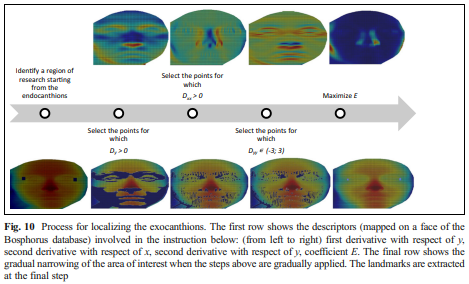

### The pseudocde based on [M. P. Pamplona Segundo, L. Silva, O. R. P. Bellon and C. C. Queirolo]

1. Determine the percentage of pit curvature points regarding every set of points with the same y-coordinate (this returns three peaks - eyes, nose base, and mouth)
2. Calculate the percentage of pit curvature points for every column in a set of neighbor rows centered in the eye y-coordinate.
3. The left eye corner x-coordinate is the beginning of the first peak in this x-projection.
4. The right eye corner x-coordinate is the end of the second peak in the same projection.

Notes: 

Does not specify whether this is for the endocanthion or exocanthion. However, seems like it might be used to find either one of them

### Pseudocode of the Implementation - Original

1. Find the sellion
2. Starting from the sellion, select vertices to the left in a region defined based on the 'Outcanthal Width' (Right Exocanthion (ex_r) to Left Exocanthion (ex_l)) statistics from facebase.org's 3D norms database. 
3. First, select a region that is away by the mean value of 'Intercanthal Width' from the sellion. If a local minima is not found, expand the region by standard deviation of 'Outcanthal Width' at each iteration.
4. When the vertex that satisfiy the local minima condition (x value is larger than next two vertices and smaller then previous two vertices) is found, assign this vertex as the left exocanthion
5. Repeat the same process in the opposite direction to find the right exocanthion

### Exocanthion Implementation
#### Pseudocode Reference: Original

In [8]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_x_y_left(vertex):
  return vertex.x - vertex.y

def sort_by_x_y_right(vertex):
  return (vertex.x * -1) - vertex.y

def sort_by_x(vertex): # used as key for sorting by y
  return vertex.x

def find_exocanthion(mesh):
  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.
  MAX_HEIGHT = 20
  # The MAX_HEIGHT is used to provide a line of selection for vertices.

  STD = 4.54
  CURRENT_MIN_WIDTH = (86.89 - STD) / 2
  CURRENT_MAX_WIDTH = (86.89 + STD) / 2
  MAX_WIDTH = (86.89 + (3 * STD)) / 2
  # The MAX_WIDTH is determined based on the Outercanthal Width stats at facebase.org 
  # (https://www.facebase.org/facial_norms/summary/#outcanthwidth)
  # Mean Outercanthal Width for 30 yr olds is approximately 86.89.
  # The actual distance from the sellion to a exocanthion will be about half this 
  sellion = find_sellion(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices)
  exocanthion = []

  while CURRENT_MAX_WIDTH < MAX_WIDTH:
    # left
    section = []
    for vertex in vertices:
      if (vertex.y < sellion.y
          and vertex.y > sellion.y - MAX_HEIGHT 
          and vertex.x > sellion.x + CURRENT_MIN_WIDTH
          and vertex.x < sellion.x + CURRENT_MAX_WIDTH 
          and vertex.z > sellion.z - MAX_DEPTH):
        section.append(vertex)
    
    section.sort(key = sort_by_x_y_left)
    tmp = section[-1]
    for i, vertex in enumerate(section):
      if (i < len(section) - 4):
        # check if vertex is a relative minima for z
        if (vertex.z < section[i + 1].z 
            and vertex.z > section[i - 1].z
            and vertex.z < section[i + 2].z 
            and vertex.z > section[i - 2].z): 
          tmp = vertex
    exocanthion.append(tmp)

    # right
    section.clear()
    for vertex in vertices:
      if (vertex.y < sellion.y
          and vertex.y > sellion.y - MAX_HEIGHT 
          and vertex.x < sellion.x - CURRENT_MIN_WIDTH
          and vertex.x > sellion.x - CURRENT_MAX_WIDTH 
          and vertex.z > sellion.z - MAX_DEPTH):
        section.append(vertex)

    section.sort(key = sort_by_x_y_right)
    section.reverse()
    tmp = section[-1]
    for i, vertex in enumerate(section):
      # check if vertex is a relative minima for z
      if (i < len(section) - 4):
        if (vertex.z < section[i + 1].z 
            and vertex.z > section[i - 1].z
            and vertex.z < section[i + 2].z 
            and vertex.z > section[i - 2].z): 
          tmp = vertex
    exocanthion.append(tmp)
    if 'exocanthion' in locals():
      return exocanthion
    else:
      CURRENT_MIN_WIDTH = CURRENT_MIN_WIDTH - (STD/2)
      CURRENT_MAX_WIDTH = CURRENT_MAX_WIDTH + (STD/2)


#TEST_3DMODEL = 'OguzhanTopsakal.obj'
TEST_3DMODEL = '2022-07-25-11-14-04-9C370053-7459-4FF8-956F-85308DDDB182.obj'
#TEST_3DMODEL = '2022-07-26-05-01-36-3D119D82-D6AE-41D7-A0F2-4D2E51C60169.obj'
#TEST_3DMODEL = '2022-09-22-15-51-58-B192BF45-92FA-4CA6-B3EA-6B5057B9F098.obj'
mesh = trimesh.load(TEST_3DMODEL)
exocanthion = find_exocanthion(mesh)
print("left exocanthion:", exocanthion[0])
print("right exocanthion:", exocanthion[1])

left exocanthion: x: 49.9647 y: 17.1457 z: 72.2712
right exocanthion: x: -37.9069 y: 30.3296 z: 87.7137


## Labiale Superius

**Labiale superius: The midline point representing the mucocutaneous vermilion border of the upper lip [Mazhar et. al. 2021]**

### The pseudocode based on [Abu, Ngo, et. al. 2019]

---



Dependencies: 
- Detection of the local minimum point below the pronasale (see subnasale procedure from this article)

1. Detect the local minimum point, as described in the subnasale procedure from this article
2. Starting with this point, move down the y-axis, following the curvature of the face, until a local z-maximum is reached
3. Assign this local maximum to the labiale superius

Notes: This algorithm should work as long as there is no facial hair or other artifact in the 3d model that interferes and creates a pseudomaximum.

### The pseudocode based on [Manal, Arsalane, et. al. 2019]

Dependencies:

*   Detection of pronasale
*   Detection of subnasale
*   Detection of stomion

1.	Locate the pronasale, the stomion, and the subnasale
2.	Select all the points between the stomion and the subnasale along the y-axis
3.	Restrict these points to those with the same x-value as the pronasale
4.	Find the point at the local z-maximum
5.	Assign this point to the labiale superius

Notes: This algorithm refines the area of search more, but it depends on the other landmarks being chosen correctly.

### The following is based on [Vezzetti, E., Marcolin, F. 2014]

Check for the terms: [Definitions](#scrollTo=TTke5AddhLvF)


1. Find the u-coordinate by rounding down the mean of the cheilions' u-coordinates
     uLS = (uCHr+uCHl)/2
2. define a proper v-coordinate range:
     vLS is an element of [min(vCHr, vCHl)+3, vSN-4]
3. use a proper threshold Cmin of the curvedness index C in a maximization process algorithm to find the v-coordinate of this landmark.

Notes: The proper threshold Cmin is referenced in the article only as "defined during the preliminary experimental work." This makes this algorithm difficult to use.



### Pseudocode of the Implementation 

1. Find the subnasale
2. Select vertices below the subnasale based on the Philtrum Length (Subnasale (sn) to Labiale Superius (ls)) statistics. The selection region will be based on mean value of Philtrum Length
3. Find the vertex with a relative maxima for z
4. If vertex with a relative maxima for z cannot be found expand the region by one standard deviation of Philtrum Length
4. When a relative maxima for z is found, assign this vertex as the labiale superius

### Labiale Superius Implementation
#### Pseudocode Reference: Abu, Ngo, et. al. 2019

In [9]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_y(vertex): # used as key for sorting by y
  return vertex.y * -1

def find_labiale_superius(mesh):
  MAX_WIDTH = 3
  # The MAX_WIDTH is selected simply to provide a line of vertices.
  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

  STD = 2.53
  MAX_HEIGHT = 15.77 + (3 * STD)
  CURRENT_MIN_HEIGHT = 15.77 - (STD/2)
  CURRENT_MAX_HEIGHT = 15.77 + (STD/2)
  # The Philtrum Length used
  # (https://www.facebase.org/facial_norms/summary/#phillength)
  # The Philtrum Length stat for a 30 yr old is 15.77 and with std is 2.53.
  subnasale = find_subnasale(mesh) # find subnasale
  vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use

  while CURRENT_MAX_HEIGHT < MAX_HEIGHT:
    section = [] # initialize slice of sorted vertices
    section.clear()
    for vertex in vertices: # find all vertices within range of subnasale on decreasing y
      if (vertex.y > subnasale.y - CURRENT_MAX_HEIGHT
          and vertex.y < subnasale.y - CURRENT_MIN_HEIGHT 
          and vertex.x < subnasale.x + MAX_WIDTH 
          and vertex.x > subnasale.x - MAX_WIDTH 
          and vertex.z > subnasale.z - MAX_DEPTH 
          and vertex.z < subnasale.z + MAX_DEPTH):
        section.append(vertex)

    section.sort(key=sort_by_y) # sort by y-values
    for i, vertex in enumerate(section): # find labiale superius
      if (i < len(section) - 2):
        # check if vertex is a relative maxima for z
        if (vertex.z > section[i + 1].z 
            and vertex.z > section[i - 1].z): 
          labiale_superius = vertex
    if 'labiale_superius' in locals():
      return labiale_superius
    else:
      CURRENT_MIN_HEIGHT = CURRENT_MIN_HEIGHT - (STD/2)
      CURRENT_MAX_HEIGHT = CURRENT_MAX_HEIGHT + (STD/2)

TEST_3DMODEL = 'OguzhanTopsakal.obj'
mesh = trimesh.load(TEST_3DMODEL) # load mesh
print("labiale superius:", find_labiale_superius(mesh))

labiale superius: x: -3.91969 y: -38.1644 z: 110.133


## Stomion

**Stomion: The point at which the upper and lower lip make contact in the midline on gently closed lips [Mazhar et. al. 2021]**

### The pseudocode based on [Abu, Ngo, et. al. 2019]

---



Dependencies: 
- Detection of labiale superius

1. Detect the labiale superius
2. Starting from this point, move down the y-axis, following the curvature of the face, until a local z-minimum is reached
3. Assign this local minimum to the stomion. See image below

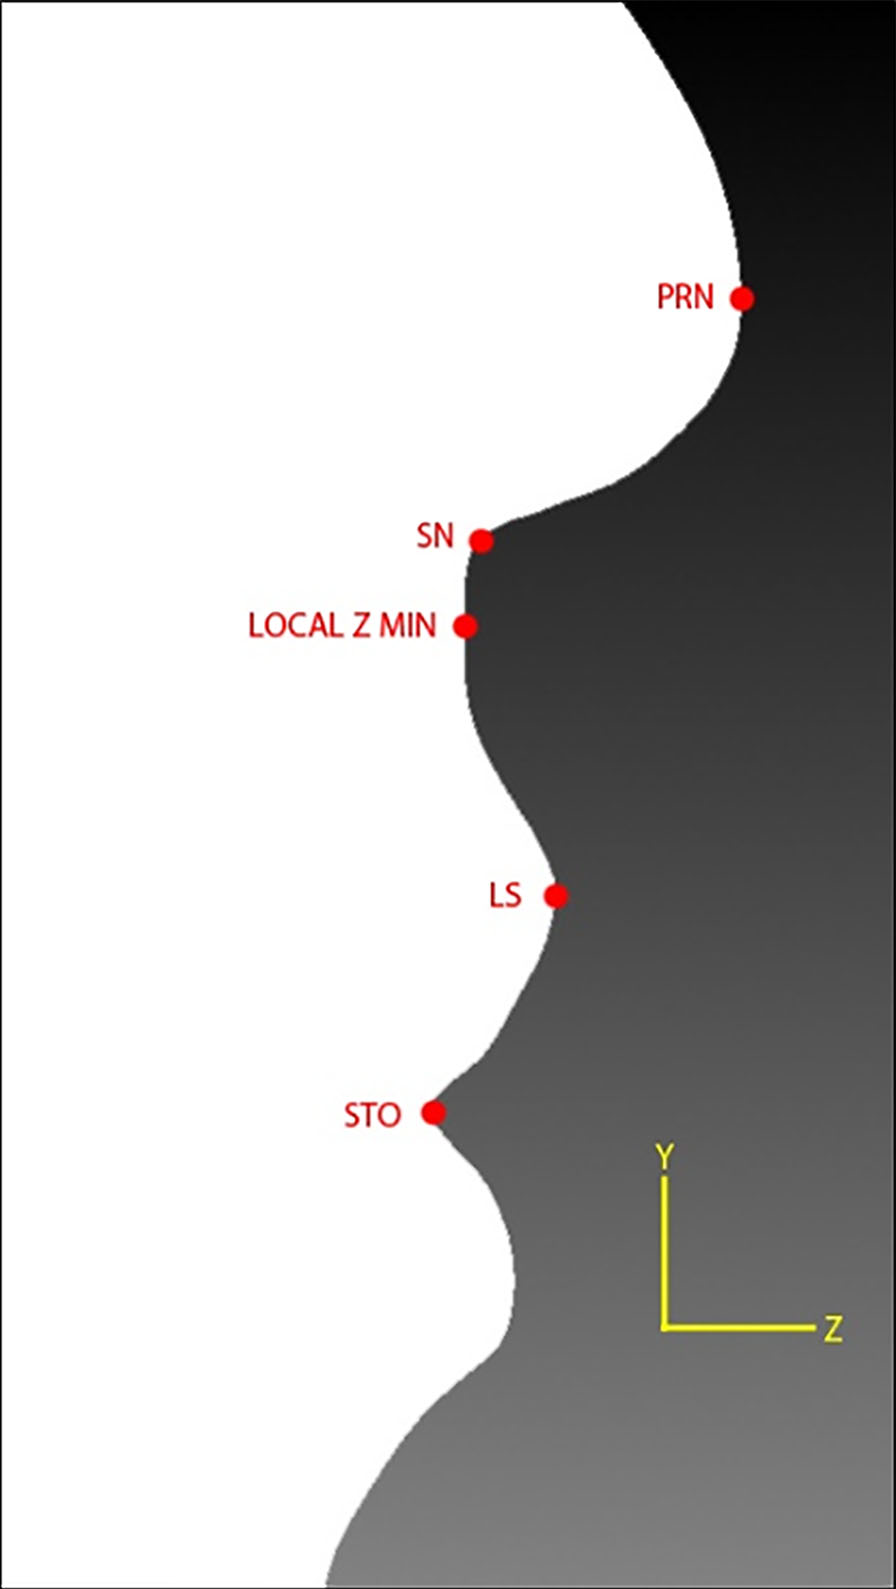

### The following is based on [Manal, Arsalane, et. al. 2019]

Dependencies:
*   Detection of pronasale
*   Detection of cheilion (left/right)


1.	Locate both the left and right cheilions and the pronasale
2.	Select all points that are exactly between the left and right cheilion along the x-axis
3.	Among those points, find the one with the same x-value as the pronasale
4.	Assign this point to the stomion

Notes: This algorithm will need to be done after the cheilion. However, it is not guaranteed that the pose or expression of the face will always result in the Stomion having exactly the same y-coordinate as the left/right cheilions.

### The following is based on [Galvánek, Furmanová, et. al. 2015]

Dependencies:

*   Detection of pronasale
*   Detection of cheilion (left/right)
*   Segmentation of mouth region


1.	Segment the mouth region as shown in the associated left and right cheilion algorithm
2.	Locate the pronasale and the left and right cheilion
3.	Find the point in between the left and right cheilion with the same x-value as the pronasale
4.	Assign this point to the stomion

Notes: This algorithm will require some sort of mouth segmentation discussed in [Galvánek, Furmanová, et. al. 2015] under the cheilion section. 

### Pseudocode of the Implementation 

1. Find the labiale superius
2. Select vertices below the labiale superius based on the Upper Vermilion Height (Labiale Superius (ls) - Stomion (sto)) statistics from facebase.org
3. Find the first vertex with a relative z minima
4. Assign this vertex as the stomion

### Stomion Implementation
#### Pseudocode Reference: Abu, Ngo, et. al. 2019

In [10]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_y_reverse(vertex): # used as key for sorting by y
  return vertex.y * -1

def sort_by_z(vertex):
  return vertex.z

def find_stomion(mesh):
  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.
  MAX_WIDTH = 3
  # The MAX_WIDTH is chosen simply to provide a line for selecting vertices.

  STD = 1.31
  RANGE_STD_COUNT = 3
  CURRENT_MIN_HEIGHT = 7.43 - (STD / 2)
  CURRENT_MAX_HEIGHT = 7.43 + (STD / 2)
  MAX_HEIGHT = 7.43 + (RANGE_STD_COUNT * STD)
  # The MAX_HEIGHT was found because the upper vermilion height according to facebase 
  # (https://www.facebase.org/facial_norms/summary/#upvermheight)
  # is approximately 7.43 for a 30 yr old and with 3 std is 11.36.

  labiale_superius = find_labiale_superius(mesh) # find labiale superius
  vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use
  while CURRENT_MAX_HEIGHT < MAX_HEIGHT:
    section = [] # initialize slice of sorted vertices
    section.clear()
    for vertex in vertices: # find all vertices within range of labiale superius on decreasing y
      if (vertex.y < labiale_superius.y - CURRENT_MIN_HEIGHT
          and vertex.y > labiale_superius.y - CURRENT_MAX_HEIGHT 
          and vertex.x < labiale_superius.x + MAX_WIDTH 
          and vertex.x > labiale_superius.x - MAX_WIDTH 
          and vertex.z > labiale_superius.z - MAX_DEPTH 
          and vertex.z < labiale_superius.z + MAX_DEPTH):
        section.append(vertex)

    section.sort(key=sort_by_y_reverse) # sort by y-values
    for i, vertex in enumerate(section): # find stomion
      if (i < len(section) - 2):
        # check if vertex is a relative minima for z
        if (vertex.z < section[i + 1].z 
            and vertex.z < section[i - 1].z):
          stomion = vertex
    if 'stomion' in locals():
      return stomion
    else:
      CURRENT_MIN_HEIGHT = CURRENT_MIN_HEIGHT - (STD/2)
      CURRENT_MAX_HEIGHT = CURRENT_MAX_HEIGHT + (STD/2)

    stomion = section[int(len(section)/2)]
    return stomion
    
TEST_3DMODEL = 'OguzhanTopsakal.obj'
mesh = trimesh.load(TEST_3DMODEL) # load mesh
print("stomion:", find_stomion(mesh))

stomion: x: -2.26198 y: -45.9072 z: 108.386


## Cheilion (left/right)




> **Cheilion (left/right): A landmark located at the oral commissure where the upper and lower lips meet on left/right side of the gently closed lips [Mazhar et. al. 2021]**

### The pseudocode based on [Liang, Wu, et. al. 2013] (called “chelion” in the article)

Dependencies:

*   Detection of subnasale



1.	Locate the subnasale
2.	Select all the points below the subnasale
3.  Restrict these points to those on sharp edges
    A sharp edge is an edge where the dihedral angle between the surface normal vectors of two neighboring triangles (on the surface of the model) is greater than 30 degrees
4.	Find the point with the maximum x-value
5.  Assign the point with the maximum x-value to the left cheilion
6.	Find the point with the minimum x-value
7.	Assign the point with the minimum x-value to the right cheilion

Notes: Need to find the dihedral angle between the surface normal vectors of neighboring triangles for this algorithm to be viable.

### The pseudocode based on [Galvánek, Furmanová, et. al. 2015]

Segmentation process for the mouth is similar to the segmentation of the nose for locating the pronasale

Dependencies:

*   Detection of pronasale


[Segmentation of mouth region]
1.	Denoise the face by applying an anisotropic non-linear filter
      This is done to prevent sharp edges
2.	Threshold the principal curvature values (done using automatic threshold filter)
      This is done to filter out regions unlikely to contain the desired landmarks (best threshold results were obtained using Renyi Entropy method)
3.	Locate the pronasale
4.	Locate the mouth by finding the biggest continuous segment under the pronasale, along the y-axis
[Landmark detection]
5.	Find the leftmost point of the mouth along the y-axis
6.	Assign the leftmost point to the left cheilion
7.	Find the rightmost point of the mouth
8.	Assign the rightmost point to the right cheilion along the y-axis

Notes: 
Select the mouth region, then assign the leftmost and righmost points as the L/R cheilion.

If the 'mouth' region can be defined, this algorithm could work though.

![[Galvánek, Furmanová, et al 2015]_Figure3.PNG](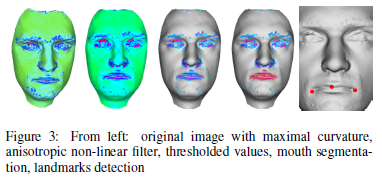)

### The pseudocode based on [Berretti, Ben Amor, et. al. 2011]

Dependencies:
* Preprocessing of the model
* Detection of pronasale
* Detection of alare points

1. Preprocess the model, and detect the pronasal and alare (al) points
2. Use Gaussian elliptical curvature to detect the upper and lower lip regions
3. Restrict the y-coordinate search window to between the upper and lower points of the lips
4. Restrict the x-coordinates to between al_left_x and al_left_x+0.7*al_width for the left point, and between al_right_x-0.7*al_width and al_right_x for the right point
    al_width = |al_right_x - al_left_x|
5. Using these borders, there should now be two rectangular search windows, one on each side
6. Use the SIFT detection algorithm to find the most significant keypoint within the windows
7. Assign these 2 most significant keypoints to chelion left and right

Notes: 

Selecting each side of the lips and then finding the most significant keypoint with SIFT.

Gaussian curvature can be found using the principal curvatures k1 and k2. If we can learn the SIFT algorithm, we should be able to do this.

### The pseudocode based on [Gupta, Markey, et. al. 2010] 

Check the terms: [Definitions](#def_gupta)

Dependencies:
* Detection of pronasale
* Detection of alar (left/right)
* Generation of facial range image

1.	Locate the pronasale and the left and right alar
2.	Determine the vertical limits of the search region by locating the lower and upper lips (regions with elliptic Gaussian curvature)
3.	Restrict the search region horizontally to between al_left_x  and (al_left_x  + 0.7 * al_width) (region to the left of al_left)
      al_width = |al_left_x – al_right_x|
4.	Restrict the search region horizontally to between al_right_x and (al_right_x – 0.7 * al_width) (region to the right of al_right)
5.	Find the maximum mean curvature within this region (one on each side- these are the initial curvature estimates)
6.	Find the final positions by searching in a 11mm x 30mm region about the initial estimates using the 2D-3D EBGM algorithm
7.	Assign these final positions to the left and right cheilion

Notes: 

Selecting regions on either side of the lips, getting an estimate for curvature, and then refining it with an algorithm to get the cheilion.

Using the principal curvatures k1 and k2, we should be able to find mean and Gaussian curvatures, then we'll need to understand the EBGM algorithm.

![[Gupta, Markey, et al]_Figure8.PNG](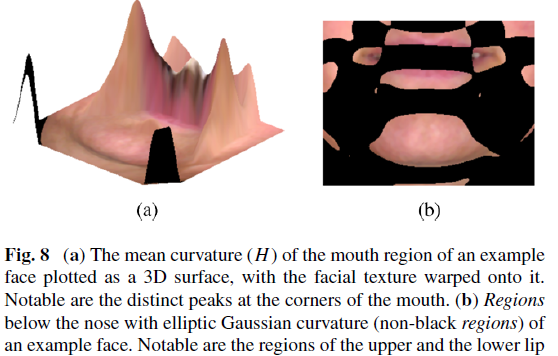)

### The pseudocode based on [Vezzetti, E., Marcolin, F. 2014]

Check for the terms: [Definitions](#scrollTo=TTke5AddhLvF)

These are their geometrical features:
1. they belong to the points whose shape index lies in the range corresponding to the surfaces of the saddle rut and saddle [23]; 
2. they belong to the points whose curvedness index is positive and greater than a given threshold; 
3. the coefficient g of the second fundamental form, going from the left to the right, increases in value for the right cheilion and decreases for the left cheilion 
4. the first derivative with respect to the v coordinate is positive for the upper lip and negative for the lower lip; zero is represented by the line at the end of which the two cheilions lie; 
5. in a standard pose the cheilions lie in the two little hollows close to the mouth, so they are local minimums.

To extract the cheilions:
1. identify a proper region of interest starting from the coordinate of the subnasal and of the two alae, using the following formulas that come from geometrical considerations about the human face
     (where uALAr and uALAl are the u coordinates of the two alae, and vSN is the v coordinate of the subnasal)
     -right cheilion: uCHr is an element of [uALAr-15, uALAr+10], vCHr is an element of [20, vSN-10]
     -left cheilion: uCHl is an element of [uALAl-10, uALAl+15], vCHl is an element of [20, vSN-10]
2. Choose the maximum and minimum values to compute the biggest variation in the curvedness index C within this 3x3 submatrix, then compare it with a proper threshold Cmin - if it is lower, this point is erased from the region of interest
3. If the analyzed point has a shape index S less than a threshold Smin, it is erased from the region of interest
4. Then, all isolated points (points not surrounded by others) are erased from the region of interest
5. Repeat steps 1-4 in columns moving from right to left for the right cheilion, and left to right for the left cheilion to obtain a u-coordinate for each landmark
6. If only one point remains on each side, then these are the landmarks; otherwise the v-coordinate will be the average of all the points' v-coordinates in the given u-coordinate column.

Notes: This approach seems like it would work well if the 'proper threshold' for Cmin and Smin were defined. They are not defined within the article.

### Pseudocode - Original

1. Starting from Stomion
2. assign stomion to 'current stomion' variable
3. find a point ~2mm above the 'current stomion' on the mesh and assign it to 'current upper stomion'
4. calculate the angle between the 'current stomion' and the 'current upper stomion' and assign this angle to 'upper angle'
5. find a point ~2mm below the 'current stomion' on the mesh and assign it to 'current lower stomion'
6. calculate the angle between the 'current stomion' and the 'current lower stomion' and assign this angle to 'lower angle'
7. compare the 'upper angle' and 'lower angle', if they are the same or very close (close to 180 degrees), stop
8. if the condition is not met, increase 'current stomion' x-coordinate by ~1mm and repeat steps 2-7

### Pseudocode of the Implementation 

1. Find the stomion
2. Select vertices with similar x-values as the stomion and on the left of the stomion based on the Labial Fissure Width statistics
3. Find a vertex with a relative z minima or a z less than the stomion
4. Assign this vertex as the left cheilion
5. Select vertices with similar x-values as the stomion and on the right of the stomion based on the Labial Fissure Width statistics
6. Find a vertex with a relative z minima or a z less than the stomion
7. Assign this vertex as the right cheilion

### Cheilion Implementation
#### Pseudocode Reference: Original

In [11]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_x(vertex): # used as key for sorting by y
  return vertex.x

def find_cheilion(mesh):
  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

  MAX_HEIGHT = 3
  # The MAX_HEIGHT is chosen to provide a line of vertices to select.

  # The MAX_WIDTH is based on labial fissure width stat on facebase.org
  # (https://www.facebase.org/facial_norms/summary/#labfiswidth)

  STD = 3.82
  RANGE_STD_COUNT = 3
  CURRENT_MIN_WIDTH = (49.6 - STD)/2
  CURRENT_MAX_WIDTH = (49.6 + STD)/2
  MAX_WIDTH = (49.6 + (RANGE_STD_COUNT * STD)) / 2

  stomion = find_stomion(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices)

  while CURRENT_MAX_WIDTH < MAX_WIDTH:
    # left
    section = [] # initialize slice of sorted vertices
    section.clear()
    for vertex in vertices:
      if (vertex.x > stomion.x + CURRENT_MIN_WIDTH
          and vertex.x < stomion.x + CURRENT_MAX_WIDTH
          and vertex.y < stomion.y + MAX_HEIGHT 
          and vertex.y > stomion.y - MAX_HEIGHT
          and vertex.z > stomion.z - MAX_DEPTH 
          and vertex.z < stomion.z + MAX_DEPTH ):
        section.append(vertex)
    
    section.sort(key = sort_by_x) # sort by x-values
    cheilion = []
    tmp = section[0]
    for i, vertex in enumerate(section): # find left cheilion
        if (vertex.z < stomion.z): # check if vertex is a relative minima for z
          tmp = vertex
    cheilion.append(tmp)

    # right
    section.clear() # initialize slice of sorted vertices
    for vertex in vertices:
      if (vertex.x < stomion.x - CURRENT_MIN_WIDTH
          and vertex.x > stomion.x - CURRENT_MAX_WIDTH
          and vertex.y < stomion.y + MAX_HEIGHT 
          and vertex.y > stomion.y - MAX_HEIGHT
          and vertex.z > stomion.z - MAX_DEPTH 
          and vertex.z < stomion.z + MAX_DEPTH ):
        section.append(vertex)
    section.sort(key = sort_by_x) # sort by x-values
    section.reverse()
    tmp = section[0]
    for i, vertex in enumerate(section): # find right cheilion
        if (vertex.z < stomion.z): # check if vertex is a relative minima for z
          tmp = vertex
    cheilion.append(tmp)
    if 'cheilion' in locals():
      return cheilion
    else:
      CURRENT_MIN_WIDTH = (CURRENT_MIN_WIDTH - (STD/2))/2
      CURRENT_MAX_WIDTH = (CURRENT_MAX_WIDTH + (STD/2))/2


TEST_3DMODEL = 'OguzhanTopsakal.obj'
mesh = trimesh.load(TEST_3DMODEL) # load mesh
cheilion = find_cheilion(mesh)
print("cheilion left:", cheilion[0])
print("cheilion right:", cheilion[1])

cheilion left: x: 24.3358 y: -44.4083 z: 101.988
cheilion right: x: -28.7665 y: -48.5086 z: 90.6862


## Menton/Gnathion

**Gnathion: Lowest point on the soft tissue profile of the chin in mid-sagittal plane [Mazhar et. al. 2021]**

### The pseudocode based on [Manal, Arsalane, et. al. 2019] (called “ganthion” in the article)

Dependencies:

*   Detection of stomion
*   Detection of pronasale


1.	Locate the stomion and the pronasale
2.	Select all points below the stomion along the y-axis
3.	Restrict these points to those with the same x-value as the pronasale
4.	Find the point with the minimum y-value
5.	Assign the point with the minimum y-value to the gnathion

Notes: Find the lowest point on the same axis as the pronasale. Should work if the pose is correct. 

### Our Pseudocode

NOT up-to-date, LOOK at the implementation pseudocode
1.	Locate the stomion
2.  assign point on the mesh that is ~20mm (use FaceBase to confirm) below the y-axis of the stomion to 'current gnathion'
3.	Select all points below the 'current gnathion' along the y-axis
4.  compare 'current gnathion' z-value to sellion z-value
5.  decrease y-axis of 'current gnathion' by ~1mm and check how much the z-value decreases

Observation: as we decrease y-values, z-values begin to decrease near-exponentially after passing the gnathion

### Pseudocode of the Implementation 

1. Find the pronasale
2. Select vertices based on the stats from facebase.org that gives the distance between the pronasale and gnathion: [lower face height + nasal height - nasal bridge length]
3. Find the lowest relative maxima for z
4. Assign this vertex as the gnathion 

### Gnathion Implementation
#### Pseudocode Reference: Original

In [12]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
  new_vertices = []
  for vertex in vertices:
    new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
  return new_vertices
  
def sort_by_y(vertex): # used as key for sorting by y
  return vertex.y

def find_gnathion(mesh):
  MAX_WIDTH = 3
  # The MAX_WIDTH is chosen simply to provide a line for selecting vertices.
  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

  # The following MAX_HEIGHT is to compute the distance from pronasale to gnathion
  STD = 6.3 + 4.23 - 4.09 #STD for low face height + nasal height - nasal bridge height
  HEIGHT_NO_STD = 70.08 + 55.11 - 48.33 #mean for low face height + nasal height - nasal bridge height
  CURRENT_MIN_HEIGHT = HEIGHT_NO_STD - (STD/2)
  CURRENT_MAX_HEIGHT = HEIGHT_NO_STD + (STD/2)
  RANGE_STD_COUNT = 6
  MAX_HEIGHT = HEIGHT_NO_STD + (RANGE_STD_COUNT * STD)
  # lower face height + nasal height - nasal bridge length
  # [Subnasale (sn) to Gnathion (gn)] + [Nasion (n) to Subnasale (sn)] - [Nasion (n) to Pronasale (prn)]
  # The MAX_HEIGHT is chosen because the lower face height according to facebase 
  # https://www.facebase.org/facial_norms/summary/#lowfaceheight
  # https://www.facebase.org/facial_norms/summary/#nasalbdglength
  # https://www.facebase.org/facial_norms/summary/#nasalheight

  vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use
  pronasale = find_pronasale(mesh)

  while CURRENT_MAX_HEIGHT < MAX_HEIGHT:
    section = [] # initialize slice of sorted vertices
    section.clear()
    for vertex in vertices: # find all vertices within range of sellion and below pronasale
      if (vertex.z > pronasale.z - MAX_DEPTH 
          and vertex.z < pronasale.z 
          and vertex.y < pronasale.y - CURRENT_MIN_HEIGHT
          and vertex.y > pronasale.y - CURRENT_MAX_HEIGHT 
          and vertex.x < pronasale.x + MAX_WIDTH 
          and vertex.x > pronasale.x - MAX_WIDTH):
        section.append(vertex)

    section.sort(key=sort_by_y)
    section.reverse()
    for i, vertex in enumerate(section): # find gnathion
      if (i < len(section) - 4):
        # check if vertex is a relative maxima for z
        if (vertex.z > section[i + 2].z 
            and vertex.z > section[i + 1].z 
            and vertex.z > section[i - 1].z): 
            gnathion = vertex
    
    if 'gnathion' in locals():
      return gnathion
    else:
      CURRENT_MIN_HEIGHT = CURRENT_MIN_HEIGHT - (STD/2)
      CURRENT_MAX_HEIGHT = CURRENT_MAX_HEIGHT + (STD/2)


TEST_3DMODEL = 'OguzhanTopsakal.obj'
TEST_3DMODEL = '2022-08-13-19-10-42-286CB5C7-E7A4-4A7F-8717-7BE5F0F90F40.obj'
TEST_3DMODEL = '2022-10-03-12-48-03-5061F449-E2D2-4A90-9278-C98A4932F689.obj'

mesh = trimesh.load(TEST_3DMODEL) # load mesh
print("gnathion:", find_gnathion(mesh))

gnathion: x: 4.23714 y: -62.8297 z: 94.5353


## Alar Base Junction/ Alar Crease (left/right)

The junction between the left alar crease and the cheek. (from json file)

### Our Pseudocode

1. Take a diagonal slice from the alar flare
2. Find a local z-minimum along this diagonal slice

### Pseudocode of the Implementation 

1. Find the alar flares and subnasale
2. Select vertices that are below alar flare, above subnasale and to the left of subnasale
3. Sort by increasing x - y so that the last vertex is the one on the bottom left
4. Assign the bottom left vertex to alar base left
5. Select vertices that are below alar flare, above subnasale and to the right of subnasale
3. Sort by increasing x - y so that the last vertex is the one on the bottom right
4. Assign the bottom left vertex to alar base right

### Alar Base Junction/ Alar Crease Implementation

In [13]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_x(vertex): # used as key for sorting by y
  return vertex.x

def sort_by_xminusy(vertex): # used as key for sorting by y
  return (vertex.x - vertex.y)

def sort_by_xplusy(vertex): # used as key for sorting by y
  return (vertex.x + vertex.y)

def find_alar_base_junction(mesh):
    MAX_DEPTH = 10
    # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

    #TAYLOR: This algorithms substantially changed. I am not sure if it will work fine or not
    # Let me know when you have a result for this.

    alar_flare = find_alar_flare(mesh)
    subnasale = find_subnasale(mesh)
    vertices = turn_vertices_into_objects(mesh.vertices)
    alar_base_junction = []
      
    # left
    section = []
    section.clear()
    for vertex in vertices:
      if (vertex.y < alar_flare[0].y
          and vertex.x > subnasale.x
          and vertex.y > subnasale.y 
          and vertex.z > subnasale.z 
          and vertex.z > alar_flare[0].z - MAX_DEPTH):
          section.append(vertex)
    
    #sort so that we can get the point in the left bottom corner
    section.sort(key=sort_by_xminusy)
    alar_base_junction.append(section[-1])

    # right
    section.clear()
    for vertex in vertices:
      if (vertex.y < alar_flare[1].y
          and vertex.x < subnasale.x
          and vertex.y > subnasale.y 
          and vertex.z > subnasale.z 
          and vertex.z > alar_flare[1].z - MAX_DEPTH):
          section.append(vertex)
          
    #sort so that we can get the point in the right bottom corner
    section.sort(key=sort_by_xplusy)
    alar_base_junction.append(section[0])

    return alar_base_junction
  

TEST_3DMODEL = 'OguzhanTopsakal.obj'

mesh = trimesh.load(TEST_3DMODEL) # load mesh
alar_base_junction = find_alar_base_junction(mesh)
print("alar base junction left:", alar_base_junction[0])
print("alar base junction right:", alar_base_junction[1])

alar base junction left: x: 18.1684 y: -18.3955 z: 111.012
alar base junction right: x: -17.4185 y: -16.5968 z: 111.179


## Glabella

The most prominent point of the forehead in the midline between the eyebrows. (from json file)

### Our Pseudocode

1. Start at sellion
2. Travel along y-axis until a local z-maximum is found
3. Use FaceBase to retrieve data about when to stop traversing vertically (avg distance between sellion and glabella + 4*(standard deviation))

### Pseudocode of the Implementation 

1. Find the pronasale
2. Select vertices above the pronasale
3. Assign the vertex with a relative z maxima as the glabella

### Glabella Implementation

In [14]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_y(vertex): # used as key for sorting by y
  return vertex.y

def find_glabella(mesh):

  MAX_WIDTH = 3
  # The MAX_WIDTH is chosen simply to provide a line for selecting vertices.

  MAX_DEPTH = 20.6 + 3 * 1.89
  # Nasal protrusion stat is used to define the max_depth
  # https://www.facebase.org/facial_norms/summary/#nasalpro
  # Nasal protrusion is between the pronasale and subnasale. 
  # We assume glabella has less depth then subnasale
  # and use mean nasal protrusion plus 3 std to compute the depth
  # that will be a boundary for the glabella z-axis of the glabella

  # The MAX_HEIGHT is chosen because the nasal bridge length according to facebase 
  # https://www.facebase.org/facial_norms/summary/#nasalbdglength
  # for a 30 yr old is approximately 48.33 and with 3 std is 60.6.
  RANGE_STD_COUNT = 6
  STD = 4.09
  MAX_HEIGHT = 48.33 + (RANGE_STD_COUNT * STD)
  CURRENT_MIN_HEIGHT = 48.33 - STD
  CURRENT_MAX_HEIGHT = 48.33 + STD

  pronasale = find_pronasale(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices)

  while CURRENT_MAX_HEIGHT < MAX_HEIGHT:
    section = [] # initialize slice of sorted vertices
    section.clear()
    for vertex in vertices: # find all vertices within range of pronasale on increasing y
      if (vertex.y > pronasale.y + CURRENT_MIN_HEIGHT
          and vertex.y < pronasale.y + CURRENT_MAX_HEIGHT 
          and vertex.x < pronasale.x + MAX_WIDTH 
          and vertex.x > pronasale.x - MAX_WIDTH 
          and vertex.z > pronasale.z - MAX_DEPTH 
          and vertex.z < pronasale.z + MAX_DEPTH):
        section.append(vertex)
    #print('len section:' , len(section))
    section.sort(key = sort_by_y) # sort by y-values
    #glabella = section[-1]
    for i, vertex in enumerate(section): # find glabella
      if (i < len(section) - 2):
        if (vertex.z > section[i + 1].z 
            and vertex.z > section[i - 1].z): # check if vertex is a relative maxima for z
          glabella = vertex
    if 'glabella' in locals():
      return glabella
    else:
      CURRENT_MAX_HEIGHT = CURRENT_MAX_HEIGHT + (STD/2)
      CURRENT_MIN_HEIGHT = CURRENT_MIN_HEIGHT - (STD/2)


TEST_3DMODEL = 'OguzhanTopsakal.obj'
TEST_3DMODEL = '2022-09-13-09-45-32-8FCA151D-A52C-4CBC-8941-E3D3C69F06C2.obj'
TEST_3DMODEL = '2022-10-02-12-19-00-CFBAB2BD-765E-4E91-BAC9-FEA122B7CBB6.obj'
mesh = trimesh.load(TEST_3DMODEL) # load mesh
print("glabella:", find_glabella(mesh))

glabella: x: -1.55916 y: 25.6198 z: 100.081


## Subalare (left/right)

The point at the lower limit of each alar base, where the alar base disappears into skin of the upper lip. A bilateral landmark located below the nostril opening at the point where the infero-medial continuation of the alar cartilage inserts into the skin of the upper lip. (from digitized-rhinoplasty.com educator app)

### Our Pseudocode

1. Start from alar base junction
2. Follow x-axis to go inward toward subnasale
3. Find maximum z-point (should be within ~5mm (use FaceBase to verify) of the alar base junction)
4. Consider the point with the maximum z-value as halfway in the x-axis between alar base junction and subalare
5. Use this logic to find subalare (left and right)

### Pseudocode of the Implementation 

1. Find the subnasale
2. Select vertices slightly above and to the left of the subnasale based on the subnasal width statistics
3. Sort the vertices by x
4. Assign the vertex with a relative z minima as the left subalare
5. Select vertices slightly above and to the right of the subnasale based on the subnasal width statistics
6. Sort the vertices by x
7. Assign the vertex with a relative z minima as the right subalare

### Subalare Implementation

In [15]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_x(vertex): # used as key for sorting by x
  return vertex.x

def find_subalare(mesh):
  MIN_HEIGHT = 2
  MAX_HEIGHT = 6
  # We computed the average difference between the j-axis values of subnasale and subalare (left/right)
  # The average is 4 and the std is 2. We defined a region between 2 and 6

  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

  STD = 2.82
  RANGE_STD_COUNT = 3
  CURRENT_MAX_WIDTH = (18.76 + STD) / 2
  CURRENT_MIN_WIDTH = (18.76 - STD) / 2
  MAX_WIDTH = (18.76 +  (RANGE_STD_COUNT * STD))/2
  # The MAX_WIDTH is chosen based on the subnasal width
  # subnasale width is between the right and left subalare
  # half of subnasale width will help us to find right/left subalare
  # (https://www.facebase.org/facial_norms/summary/#subnasalwidth)
  subalare = []
  subnasale = find_subnasale(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use
  
  while CURRENT_MAX_WIDTH < MAX_WIDTH:
    # left
    section = []
    section.clear()
    for vertex in vertices:
      if (vertex.x > subnasale.x + CURRENT_MIN_WIDTH
          and vertex.x < subnasale.x + CURRENT_MAX_WIDTH 
          and vertex.y > subnasale.y + MIN_HEIGHT 
          and vertex.y < subnasale.y + MAX_HEIGHT 
          and vertex.z > subnasale.z - MAX_DEPTH 
          and vertex.z < subnasale.z + MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x)
    tmp = section[0]
    for i, vertex in enumerate(section): # find subalare
      if (i < len(section) - 2):
        # check if vertex is a relative minima for z
        if (vertex.z < section[i + 1].z 
            and vertex.z < section[i - 1].z):
          tmp = vertex
    subalare.append(tmp)

    # right
    section.clear()
    for vertex in vertices:
      if (vertex.x < subnasale.x - CURRENT_MIN_WIDTH
          and vertex.x > subnasale.x - CURRENT_MAX_WIDTH 
          and vertex.y > subnasale.y + MIN_HEIGHT
          and vertex.y < subnasale.y + MAX_HEIGHT 
          and vertex.z > subnasale.z - MAX_DEPTH 
          and vertex.z < subnasale.z + MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x)
    section.reverse()
    tmp = section[0]
    for i, vertex in enumerate(section): # find subalare
      if (i < len(section) - 2):
        # check if vertex is a relative minima for z
        if (vertex.z < section[i + 1].z 
            and vertex.z < section[i - 1].z):
          tmp = vertex
    subalare.append(tmp)
    if 'subalare' in locals(): 
      return subalare
    else:
      CURRENT_MAX_WIDTH = CURRENT_MAX_WIDTH + STD/2
      CURRENT_MIN_WIDTH = CURRENT_MIN_WIDTH - STD/2

TEST_3DMODEL = 'OguzhanTopsakal.obj'

mesh = trimesh.load(TEST_3DMODEL) # load mesh
subalare = find_subalare(mesh)
print("subalare left:", subalare[0])
print("subalare right:", subalare[1])

subalare left: x: 7.70092 y: -18.7815 z: 122.177
subalare right: x: -13.2358 y: -18.9793 z: 107.264


## Zygion (left/right)

The most lateral point of left zygomatic arch. (from digitized-rhinoplasty.com educator app)

### Our Pseudocode

Get it from the pseudocode of the implementation 

### Pseudocode of the Implementation 

1. Find the pronasale
2. Using statistics based on our own dataset, determine the range for the x axis value of the left zygon. Note that maximum facial width (right Zygion to left Zygion) from facebase.org could also be used.
2. Using statistics based on our own dataset, determine the range for the y axis value of the left zygon. 
3. Select all vertices in the region based on the x and y axis value ranges
4. Sort the vertices multidimensionally using both x and y in quadrant 1, i.e. sort by x + y
5. Assign this point as the left zygion
6. Using statistics based on our own dataset, determine the range for the x axis value of the right zygon. Note that maximum facial width (right Zygion to right Zygion) from facebase.org could also be used.
7. Using statistics determine the y axis value of the right zygon
8. Select all vertices in the region based on the x and y axis values within a diagonal line to the approximate location
9. Sort the vertices multidimensionally using both x and y in quadrant 4, i.e. sort by x - y
10. Assign this point as the right zygion

### Zygion Implementation

In [16]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_x_and_y_left_zyg(vertex): # used as key for sorting by x and y
  return vertex.x + vertex.y

def sort_by_x_and_y_right_zyg(vertex): # used as key for sorting by x and y
  return vertex.x - vertex.y

def find_zygion(mesh):
  MAX_HEIGHT = 10
  # The MAX_HEIGHT is used for selecting vertices in the y axis
  # Based on own stats, the average difference on y-values between zygion and pronasale is 10 and std is 5

  MAX_DEPTH = 100 # approximately mean of Middle Facial Depth minus 4 std 
  # It is logical to have the depth less than Middle Facial Depth Right
  # https://www.facebase.org/facial_norms/summary/#midfacedepth_r
  # mean: 128.17	std: 7.02

  #STD = 6.34
  #RANGE_STD_COUNT = 3
  #CURRENT_MIN_WIDTH = (134.19 - (STD/2))/2
  #CURRENT_MAX_WIDTH = (134.19 + (STD/2))/2
  #MAX_WIDTH = (134.19 + (RANGE_STD_COUNT * STD))/2
  # The MAX_WIDTH is based on the maximum facial width (right Zygion to left Zygion) 
  # (https://www.facebase.org/facial_norms/summary/#maxfacewidth)

  STD = 5
  RANGE_STD_COUNT = 3
  CURRENT_MIN_WIDTH = (55 - (STD/2))
  CURRENT_MAX_WIDTH = (55 + (STD/2))
  MAX_WIDTH = 55 + (RANGE_STD_COUNT * STD)

  vertices = turn_vertices_into_objects(mesh.vertices) 
  # make all the vertices objects for ease of use
  pronasale = find_pronasale(mesh)
  zygion = []

  while CURRENT_MAX_WIDTH < MAX_WIDTH:
    # left
    section = []
    section.clear()
    for vertex in vertices:
      if (vertex.x > pronasale.x + CURRENT_MIN_WIDTH
          and vertex.x < pronasale.x + CURRENT_MAX_WIDTH 
          and vertex.y > pronasale.y 
          and vertex.y < pronasale.y + MAX_HEIGHT 
          and vertex.z < pronasale.z 
          and vertex.z > pronasale.z - MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x_and_y_left_zyg)
    if (len(section) > 0):
      zygion.append(section[-1])

    # right
    section.clear()
    for vertex in vertices:
      if (vertex.x < pronasale.x - CURRENT_MIN_WIDTH
          and vertex.x > pronasale.x - CURRENT_MAX_WIDTH 
          and vertex.y > pronasale.y 
          and vertex.y < pronasale.y + MAX_HEIGHT 
          and vertex.z < pronasale.z 
          and vertex.z > pronasale.z - MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x_and_y_right_zyg)
    if (len(section) > 0):
      zygion.append(section[0])

    if 'zygion' in locals():
      return zygion
    else:
      CURRENT_MAX_WIDTH = CURRENT_MAX_WIDTH + (STD/2)
      
TEST_3DMODEL = 'OguzhanTopsakal.obj'
TEST_3DMODEL = '2022-08-13-19-10-42-286CB5C7-E7A4-4A7F-8717-7BE5F0F90F40.obj'
mesh = trimesh.load(TEST_3DMODEL) # load mesh
zygion = find_zygion(mesh)
print("zygion left:", zygion[0])
print("zygion right:", zygion[1])

zygion left: x: 57.6001 y: -4.03862 z: 70.7801
zygion right: x: -56.7398 y: -3.52993 z: 46.8939


## Alar Rim's Highest Point (left/right)

The highest point of the left/right alar rim. (from digitized-rhinoplasty.com educator app)

### Our Pseudocode

1. Start from left/right subalare
2. Follow each vertex in an increasing y-direction (limit to y-value of pronasale (Use FaceBase to verify)) toward the center along the inner part of the outer nose.
3. Take the vertex with the maximum x-y coordinate as the alar rim's highest point.
4. Repeat from the other subalare.

### Pseudocode of the Implementation 

1. Find the subnasale
2. Select vertices diagonal-left above the subnasale using statitics based on our dataset (n=117)
3. Sort the vertices multidimensionally using both x and y in quadrant 1, i.e. sort by x + y
4. Assign the uppermost x and y vertex as the left alar rim's highest point
5. Select vertices diagonal-right above the subnasale using statitics based on our dataset (n=117)
6. Sort the vertices multidimensionally using both x and y in quadrant 4, i.e. sort by x - y
7. Assign the uppermost x and y vertex as the right alar rim's highest point

### Alar Rim's Highest Point Implementation

In [17]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_x_and_y_left_highest(vertex): # used as key for sorting by x and y together
  return vertex.x + vertex.y

def sort_by_x_and_y_right_highest(vertex): # used as key for sorting by x and y together
  return vertex.x - vertex.y

def find_alar_rim_highest(mesh):
  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

  MAX_HEIGHT = 8
  # The MAX_HEIGHT was determined based on the statistics on 117 models
  # Difference of y values between subnasale and alarrim's highest point

  MAX_WIDTH = 12.5
  # The MAX_WIDTH was determined based on the statistics on 117 models
  # Difference of x values between subnasale and alarrim's highest point

  subnasale = find_subnasale(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use
  alar_rim_highest = []


  # left
  section = []
  for vertex in vertices:
    if (vertex.x  > subnasale.x 
        and vertex.x < subnasale.x + MAX_WIDTH 
        and vertex.y > subnasale.y 
        and vertex.y < subnasale.y + MAX_HEIGHT 
        and vertex.z > subnasale.z 
        and vertex.z < subnasale.z + MAX_DEPTH):
        section.append(vertex)
    
  section.sort(key=sort_by_x_and_y_left_highest)
  alar_rim_highest.append(section[-1])

  # right
  section.clear()
  for vertex in vertices:
    if (vertex.x  < subnasale.x 
        and vertex.x > subnasale.x - MAX_WIDTH 
        and vertex.y > subnasale.y 
        and vertex.y < subnasale.y + MAX_HEIGHT 
        and vertex.z > subnasale.z 
        and vertex.z < subnasale.z + MAX_DEPTH):
      section.append(vertex)
    
  section.sort(key=sort_by_x_and_y_right_highest)
  alar_rim_highest.append(section[0])
  
  if 'alar_rim_highest' in locals():
      return alar_rim_highest

mesh = trimesh.load('OguzhanTopsakal.obj') # load mesh
alar_rim_highest = find_alar_rim_highest(mesh)
print("alar rim highest left:", alar_rim_highest[0])
print("alar rim highest right:", alar_rim_highest[1])

alar rim highest left: x: 9.42829 y: -14.8916 z: 123.879
alar rim highest right: x: -14.8477 y: -15.5566 z: 114.169


## Columellar Break Point

The point in the columellar region of the nose where the tip of the nose stops curving and the columellar linear structure begins, in the midline. (from json file)

### Our Pseudocode

1. Start at pronasale
2. Travel down to subnasale
3. Find the point that makes the columellar lobular angle the widest
4. Assign this point to columellar break point

### Pseudocode of the Implementation 

1. Find the pronasale
2. Determine a region based on the statistics (average and standart deviation) of distance between pronasale and columellar break point
3. Sort the vertices by y
4. Assign the vertex in the middle as the columellar break point

### Columellar Break Point Implementation

In [18]:
!pip install trimesh
import trimesh
import math

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices
  
def sort_by_y(vertex): # used as key for sorting by y
  return vertex.y

def find_angle(a, b):
  angle = math.atan((b.y - a.y) / (b.x - a.x))
  return angle

def find_columellar_break(mesh):
  MAX_WIDTH = 2
  # The MAX_WIDTH is chosen to provide a line of vertices.

  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

  STD = 2.1
  MAX_HEIGHT = 9.2 + STD
  MIN_HEIGHT = 9.2 - STD
  # The MAX_HEIGHT was determined based on the statistics on 117 models
  # Difference of y values between pronasale and columellar rim
  
  pronasale = find_pronasale(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use
  section = []

  for vertex in vertices:
    if (vertex.x < pronasale.x + MAX_WIDTH 
        and vertex.x > pronasale.x - MAX_WIDTH 
        and vertex.y > pronasale.y - MAX_HEIGHT 
        and vertex.y < pronasale.y - MIN_HEIGHT
        and vertex.z > pronasale.z - MAX_DEPTH 
        and vertex.z < pronasale.z + MAX_DEPTH):
      section.append(vertex)

  section.sort(key=sort_by_y)
  return section[int(len(section) / 2)]


mesh = trimesh.load('OguzhanTopsakal.obj') # load mesh
print("columellar break:", find_columellar_break(mesh))

columellar break: x: -0.579087 y: -18.66 z: 124.662


## Columellar Rim (left/right)

Lowest point (or widest point) of left/right nostril as seen from the lateral view on the columellar side at the mucocutaneous junction. (from digitized-rhinoplasty.com educator app)

### Our Pseudocode

1. Start from left/ right subnasale
2. travel left/right subnasale along inner rim of the nose until a minimum distance between the two points is found.
3. assign these points to left/ right columellar rim

### Pseudocode of the Implementation 

Since the 3D model does not have depth in the nostrils, we cannot fully utilize geometric properties. Instead, we use some statical properties to identify the landmark.
1. Find the pronasale
2. Select vertices diagonal left downwards to the pronasale using statistical data from our dataset
3. Sort the vertices multidimensionally using both x and y in quadrant 4, i.e. sort by x - y
4. Assign the last vertex as the left columellar rim
5. Select vertices diagonal right downwards to the pronasale using statistical data from our samples
6. Sort the vertices multidimensionally using both x and y in quadrant 1, i.e. sort by x + y
7. Assign the first vertex as the right columellar rim

### Columellar Rim (left/right) Implementation

In [19]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_x_y_left_rim(vertex):
  return vertex.x - vertex.y

def sort_by_x_y_right_rim(vertex):
  return vertex.x + vertex.y

def find_columellar_rim(mesh):
    MAX_DEPTH = 30
    # The MAX_DEPTH (z-coordinate) will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

    MAX_HEIGHT = 9.5

    STD_WIDTH = 1.6
    MIN_WIDTH = 4.3 - (STD_WIDTH)
    MAX_WIDTH = 4.3 + (STD_WIDTH)
    
    STD_HEIGHT = 1.6
    MIN_HEIGHT = 4.3 - (STD_HEIGHT)
    MAX_HEIGHT = 4.3 + (STD_HEIGHT)
    # The MAX_WIDTH (x-coordinate) and MAX_HEIGHT (y-coordinate) were chosen according to 
    # the statistics based on our dataset (117 models)
    # Average and std of the difference of x values between pronasale and columellar rim left/right
    # Average and std of the difference of y values between pronasale and columellar rim left/right

    pronasale = find_pronasale(mesh)

    vertices = turn_vertices_into_objects(mesh.vertices)
    columellar_rim = []

    # left
    section = []
    for vertex in vertices:
      if (vertex.x > pronasale.x + MIN_WIDTH 
          and vertex.x < pronasale.x + MAX_WIDTH 
          and vertex.y < pronasale.y #- MIN_HEIGHT
          and vertex.y > pronasale.y - MAX_HEIGHT
          and vertex.z < pronasale.z #- MAX_DEPTH 
          and vertex.z > pronasale.z - MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x_y_left_rim)
    columellar_rim.append(section[int(len(section) / 2)])

    # right
    section.clear()
    section = []
    for vertex in vertices:
      if (vertex.x < pronasale.x - MIN_WIDTH 
          and vertex.x > pronasale.x - MAX_WIDTH 
          and vertex.y < pronasale.y #- MIN_HEIGHT
          and vertex.y > pronasale.y - MAX_HEIGHT
          and vertex.z < pronasale.z #- MAX_DEPTH 
          and vertex.z > pronasale.z - MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x_y_right_rim)
    columellar_rim.append(section[int(len(section) / 2)])

    return columellar_rim

mesh = trimesh.load('OguzhanTopsakal.obj') # load mesh
columellar_rim = find_columellar_rim(mesh)
print("columellar rim left:", columellar_rim[0])
print("columellar rim right:", columellar_rim[1])

columellar rim left: x: 6.42892 y: -12.269 z: 126.829
columellar rim right: x: -4.59786 y: -11.5647 z: 126.58


## Lateral helix of ear (left/right)

The right-/left-most point on the helix of the right/left ear, respectively. (from digitized-rhinoplasty.com educator app)

### Our Pseudocode

1. Identify the maximum and minimum x-points
2. assign these to left/ right lateral helix of ear, respectively

### Pseudocode of the Implementation 

1. Find the pronasale
2. Select a region of vertex based on the statistics of the y-axis distance between the pronasale and lateral helix left from own dataset.
2. Find the vertex with the largest x value
3. Assign this vertex as the left lateral helix
2. Select a region of vertex based on the statistics of the y-axis distance between the pronasale and lateral helix right from own dataset.
2. Find the vertex with the smallest x value
6. Assign this vertex as the right lateral helix

### Lateral helix of ear Implementation

In [31]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_x(vertex):
  return vertex.x

def sort_by_y(vertex):
  return vertex.y

def find_lateral_helix_ear(mesh):
    vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use
    vertices.sort(key=sort_by_y)

    RANGE_STD_COUNT = 2
    STD_HEIGHT = 9
    MIN_HEIGHT = 36 - RANGE_STD_COUNT * STD_HEIGHT
    MAX_HEIGHT = 36 + RANGE_STD_COUNT * STD_HEIGHT
    MAX_DEPTH = 60
    # The MAX_HEIGHT (y-coordinate) and MIN_HEIGHT (y-coordinate) were chosen according to 
    # the statistics based on our dataset (117 models)
    # Average and std of the difference of x values between pronasale and lateral helix left/right

    lateral_helix_ear = []

    pronasale = find_pronasale(mesh)

    # left
    section = []
    for vertex in vertices:
      if (vertex.x > pronasale.x
          and vertex.y > pronasale.y + MIN_HEIGHT
          and vertex.y < pronasale.y + MAX_HEIGHT
          and vertex.z < pronasale.z
         and vertex.z > pronasale.z - MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x)
    lateral_helix_ear.append(section[-1])

    # right
    section.clear()
    section = []
    for vertex in vertices:
      if (vertex.x < pronasale.x
          and vertex.y > pronasale.y + MIN_HEIGHT
          and vertex.y < pronasale.y + MAX_HEIGHT
          and vertex.z < pronasale.z
         and vertex.z > pronasale.z - MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x)
    lateral_helix_ear.append(section[0])

    return lateral_helix_ear

TEST_3D_MODEL = 'OguzhanTopsakal.obj'
#TEST_3D_MODEL = '2022-07-29-10-13-01-B299DA62-B40C-4EFC-9758-BE95A4F76CC8.obj'
#TEST_3D_MODEL = '2022-09-07-18-37-58-3A3736AC-1A44-45DF-A39B-B9CD3D6DBD7B.obj'
mesh = trimesh.load(TEST_3D_MODEL) # load mesh
lateral_helix_ear = find_lateral_helix_ear(mesh)
print("lateral helix of ear left:", lateral_helix_ear[0])
print("lateral helix of ear right:", lateral_helix_ear[1])

lateral helix of ear left: x: 65.6373 y: 27.7128 z: 68.703
lateral helix of ear right: x: -63.0716 y: 32.8799 z: 67.9996


## Maxillofrontale (left/right)

The soft tissue point located at the left/right lateral margin of the base of the nasal root at the level of the endocanthion. (from json file)

### Our Pseudocode

1. Restrict search area (x) to endocanthions left and right
2. Restrict search area (z) to endocanthions and sellion
3. y-coordinate should be very close to endocanthion

### Pseudocode of the Implementation 

1. Find the pronasale and endocanthion
2. Select vertices at the y-level of the endocanthion and to the left of the pronasale using statistics from our dataset
3. Sort the vertices by x
4. Assign the last vertex as the left maxillofrontale
5. Select vertices at the y-level of the endocanthion and to the right of the pronasale using data from our statistical samples
6. Sort the vertices by x
7. Assign the first vertex as the left maxillofrontale

### Maxillofrontale Implementation

In [21]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_x_y_left_maxillo(vertex):
  return vertex.x + vertex.y

def sort_by_x_y_right_maxillo(vertex):
  return vertex.x - vertex.y

def find_maxillofrontale(mesh):
    MAX_HEIGHT = 3
    # The MAX_HEIGHT is chosen simply to provide a line for selecting vertices.
    MAX_DEPTH = 30
    # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

    STD = 2.3
    MIN_WIDTH = 10.3 - (STD / 2)
    MAX_WIDTH = 10.3 + (STD / 2)
    # The MAX_WIDTH (x-coordinate)
    # the statistics based on our dataset (117 models)
    # Average and std of the difference of x values between pronasale and maxilofrontale left/right

    pronasale = find_pronasale(mesh)
    endocanthion = find_endocanthion(mesh)
    vertices = turn_vertices_into_objects(mesh.vertices) # make all the vertices objects for ease of use

    maxillofrontale = []
    # left
    section = []
    for vertex in vertices:
      if (vertex.x > pronasale.x 
          and vertex.x < pronasale.x + MAX_WIDTH 
          and vertex.y > endocanthion[0].y - MAX_HEIGHT 
          and vertex.y < endocanthion[0].y 
          and vertex.z < pronasale.z 
          and vertex.z > pronasale.z - MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x_y_left_maxillo)
    maxillofrontale.append(section[-1])
    
    # right
    section.clear()
    section = []
    for vertex in vertices:
      if (vertex.x < pronasale.x 
          and vertex.x > pronasale.x - MAX_WIDTH 
          and vertex.y > endocanthion[1].y - MAX_HEIGHT 
          and vertex.y < endocanthion[1].y 
          and vertex.z < pronasale.z 
          and vertex.z > pronasale.z - MAX_DEPTH):
        section.append(vertex)
    section.sort(key=sort_by_x_y_right_maxillo)
    maxillofrontale.append(section[0])
    return maxillofrontale

mesh = trimesh.load('OguzhanTopsakal.obj') # load mesh
maxillofrontale = find_maxillofrontale(mesh)
print("maxillofrontale left:", maxillofrontale[0])
print("maxillofrontale right:", maxillofrontale[1])

maxillofrontale left: x: 12.4603 y: 20.6697 z: 101.13
maxillofrontale right: x: -9.6427 y: 18.8645 z: 97.9955


## Nasal Parenthesis (left/right)

The summit of the left/right nasal parentheses/canthal-alar line. (from json file)

### Our Pseudocode

1. We may need to use FaceBase statistics to find this point
2. This point should lie within the space between pronasale and endocanthions for all dimensions

### Pseudocode of the Implementation 

1. Find the pronasale
2. Select vertices diagonal left upwards to the pronasale using statistics based on our dataset
3. Sort the vertices multidimensionally using both x and y in quadrant 1, i.e. sort by x + y
4. Assign the last vertex as the left nasal parenthesis
5. Select vertices diagonal right upwards to the pronasale using statistics based on our dataset
6. Sort the vertices multidimensionally using both x and y in quadrant 4, i.e. sort by x - y
7. Assign the first vertex as the left nasal parenthesis

### Nasal Parenthesis Implementation

In [22]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_x_y_left_parenthesis(vertex):
  return vertex.x + vertex.y

def sort_by_x_y_right_parenthesis(vertex):
  return vertex.x - vertex.y

def find_nasal_parenthesis(mesh):
  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.


  STD_HEIGHT = 3.3
  MAX_HEIGHT = 14.4

  STD_WIDTH = 3
  MAX_WIDTH = 16
  # The MAX_WIDTH (x-coordinate)
  # the statistics based on our dataset (117 models)
  # Average and std of the difference of x values between pronasale and nasale paranthesis left/right
  # The MAX_HEIGHT (y-coordinate)
  # the statistics based on our dataset (117 models)
  # Average and std of the difference of x values between pronasale and nasale paranthesis left/right

  nasal_parenthesis = []
  pronasale = find_pronasale(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices)

  # left
  section = []
  for vertex in vertices:
    if (vertex.x > pronasale.x 
        and vertex.x < pronasale.x + MAX_WIDTH 
        and vertex.y > pronasale.y 
        and vertex.y < pronasale.y + MAX_HEIGHT 
        and vertex.z < pronasale.z 
        and vertex.z > pronasale.z - MAX_DEPTH):
      section.append(vertex)
  section.sort(key=sort_by_x_y_left_parenthesis)
  nasal_parenthesis.append(section[-1])

  # right
  section.clear()
  for vertex in vertices:
    if (vertex.x < pronasale.x 
        and vertex.x > pronasale.x - MAX_WIDTH 
        and vertex.y > pronasale.y 
        and vertex.y < pronasale.y + MAX_HEIGHT 
        and vertex.z < pronasale.z 
        and vertex.z > pronasale.z - MAX_DEPTH):
      section.append(vertex)
  section.sort(key=sort_by_x_y_right_parenthesis)
  nasal_parenthesis.append(section[0])

  return nasal_parenthesis

mesh = trimesh.load('OguzhanTopsakal.obj') # load mesh
nasal_parenthesis = find_nasal_parenthesis(mesh)
print("nasal parenthesis left:", nasal_parenthesis[0])
print("nasal parenthesis right:", nasal_parenthesis[1])

nasal parenthesis left: x: 16.2915 y: 3.73496 z: 104.079
nasal parenthesis right: x: -14.4428 y: 3.59555 z: 103.322


## Supratip Break Point (left/right)

According to ideals, “Tip-defining points should project approximately 6 to 10 mm over the nasal dorsum in female patients.” Is one of the common referring points, hence marking the supra tip breaking point where tip elevation starts from the dorsum. The nasal region where the inferior region of the nasal dorsum meets the tip of the nose. Tip defining points, supratip break point, and the columellar-lobular angle. Primary supratip deformity is characterized by an underprojected supratip, an overprojected tip, and a cephalic-oriented lower lateral cartilage. A secondary supratip deformity is caused by supratip soft tissue excess, an overresected supratip, residual excess in the caudal dorsum, inadequate tip projection, and a residual, excessive septum of the supratip and underprojected tip. The balance between the nasal dorsum and the tip-defining points is scrutinized to control the supratip break. Tip-defining points should project approximately 6 to 10 mm over the nasal dorsum in female patients.

### Our Pseudocode

Notes about this point:

-This is a point of inflexion along the front curve of the nose

-Discuss with rhinoplasty surgeon about other geometric identifiers

### Pseudocode of the Implementation 

1. Find the pronasale
2. Select vertices above the pronasale using statistics from our dataset
3. Sort the vertices by y
4. Assign the last vertex as the supratip break point

### Supratip Break Point Implementation

In [23]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_y(vertex):
  return vertex.y

def find_supratip_break(mesh):

  MAX_WIDTH = 2
  # The MAX_WIDTH is chosen simply to provide a line for selecting vertices.
  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

  STD = 3.8
  MAX_HEIGHT = 9.7
  # The MAX_HEIGHT (y-coordinate)
  # the statistics based on our dataset (117 models)
  # Average and std of the difference of x values between pronasale and supratip break point

  pronasale = find_pronasale(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices)
  section = []

  for vertex in vertices:
    if (vertex.y < pronasale.y + MAX_HEIGHT 
        and vertex.y > pronasale.y 
        and vertex.x < pronasale.x + MAX_WIDTH 
        and vertex.x > pronasale.x - MAX_WIDTH 
        and vertex.z > pronasale.z - MAX_DEPTH 
        and vertex.z < pronasale.z):
      section.append(vertex)

  section.sort(key=sort_by_y)
  return section[-1]

mesh = trimesh.load('OguzhanTopsakal.obj') # load mesh
print("supratip break point:", find_supratip_break(mesh))

supratip break point: x: 2.01084 y: -0.305942 z: 124.03


## Tip Defining Point (left/right)

The nasal tip defining point (TDP) is the most anterior projection of the tip cartilages, usually corresponding to the apex of the lobular arch anatomically, and is typically identified externally where the light reflex is seen on the nasal tip. (from json file)

### Our Pseudocode

1. Use Based on our own dataset

### Pseudocode of the Implementation 

1. Find the pronasale
2. Select vertices above and to the left of the pronasale using statistics based on our dataset
3. Sort the vertices by y
4. Assign the last point as the left tip defining point
5. Select vertices above and to the right of the pronasale using statistics based on our dataset
6. Sort the vertices by y
7. Assign the last point as the right tip defining point


### Tip Defining Point Implementation

In [24]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_y(vertex):
  return vertex.y

def find_tip_defining(mesh):

  MAX_HEIGHT = 2
  # The MAX_HEIGHT is chosen simply to provide a line for selecting vertices.
  MAX_DEPTH = 30
  # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.
  MAX_WIDTH = 5.6
  # The MAX_WIDTH was found according to our dataset as facebase provides no similar statistic.
  # the statistics based on our dataset (117 models)
  # Average and std of the difference of x values between pronasale and supratip break point

  pronasale = find_pronasale(mesh)
  vertices = turn_vertices_into_objects(mesh.vertices)
  section = []
  tip_defining = []

  # left
  for vertex in vertices:
    if (vertex.y > pronasale.y - MAX_HEIGHT 
        and vertex.y < pronasale.y + MAX_HEIGHT 
        and vertex.x > pronasale.x 
        and vertex.x < pronasale.x + MAX_WIDTH 
        and vertex.z < pronasale.z 
        and vertex.z > pronasale.z - MAX_DEPTH):
      section.append(vertex)

  section.sort(key=sort_by_x)
  tip_defining.append(section[-1])

  # right
  section.clear()
  for vertex in vertices:
    if (vertex.y > pronasale.y - MAX_HEIGHT 
        and vertex.y < pronasale.y + MAX_HEIGHT 
        and vertex.x < pronasale.x 
        and vertex.x > pronasale.x - MAX_WIDTH 
        and vertex.z < pronasale.z 
        and vertex.z > pronasale.z - MAX_DEPTH):
      section.append(vertex)

  section.sort(key=sort_by_x)
  tip_defining.append(section[0])

  return tip_defining

mesh = trimesh.load('OguzhanTopsakal.obj') # load mesh
tip_defining = find_tip_defining(mesh)
print("tip defining point left:", tip_defining[0])
print("tip defining point right:", tip_defining[1])

tip defining point left: x: 6.25785 y: -9.71086 z: 126.843
tip defining point right: x: -4.52773 y: -8.66453 z: 126.426


## Trichion

The point on the hairline in the midline of the forehead. (from json file)

### Our Pseudocode

1. Start from glabella
2. travel positively in the y-axis until z starts to change drastically in the positive direction
3. assign this point to the trichion
4. Use FaceBase to define a stopping point if this condition is not met

### Pseudocode of the Implementation 

1. Find the glabella
2. Select vertices above the glabella between the glabella and trichion based on the statistics 
3. Assign the first vertex that has neighbors that exceed the z threshold (0.5) as the trichion

### Trichion Implementation

In [25]:
!pip install trimesh
import trimesh

class Vertex: # vertex has 3 dimensions: x, y, z
  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z
  def __str__(self): # used for printing vertex
    return "x: %s y: %s z: %s" % (self.x, self.y, self.z)

def turn_vertices_into_objects(vertices): # take mesh vertex array and return array of object vertices
    new_vertices = []
    for vertex in vertices:
      new_vertices.append(Vertex(vertex[0], vertex[1], vertex[2]))
    return new_vertices

def sort_by_y(vertex):
  return vertex.y

def find_trichion(mesh):
    MAX_WIDTH = 2
    # The MAX_WIDTH is chosen simply to provide a line for selecting vertices.

    MAX_DEPTH = 30
    # The MAX_DEPTH will have no impact on the accuracy of the algorithm unless considerably different numbers are chosen.

    RANGE_STD_COUNT = 3
    STD = 10
    MIN_HEIGHT = 52 - STD * RANGE_STD_COUNT
    MAX_HEIGHT = 52 + STD * RANGE_STD_COUNT

    CURRENT_MIN_HEIGHT = 52 - (STD)
    CURRENT_MAX_HEIGHT = 52 + (STD)

    # The MAX_WIDTH was found according to our dataset as facebase provides no similar statistic.
    # the statistics based on our dataset (117 models)
    # Average and std of the difference of x values between pronasale and supratip break point

    THRESHOLD = 0.5
    # The THRESHOLD was determined through testing of our dataset as facebase provides no similar statistic.
    vertices = turn_vertices_into_objects(mesh.vertices)
    glabella = find_glabella(mesh)

    while CURRENT_MAX_HEIGHT < MAX_HEIGHT:
        section = []
        for vertex in vertices:
            if (vertex.x > glabella.x - MAX_WIDTH 
                and vertex.x < glabella.x + MAX_WIDTH 
                and vertex.y > glabella.y + MIN_HEIGHT 
                and vertex.y < glabella.y + MAX_HEIGHT 
                and vertex.z < glabella.z
                and vertex.z > glabella.z - MAX_DEPTH):
                section.append(vertex)
        
        section.sort(key=sort_by_y)
        #trichion = section[-1]

        for i, vertex in enumerate(section):
            if (i < len(section) - 2):
                if (section[i + 1].z - section[i].z > THRESHOLD 
                    and section[i + 2].z - section[i].z > THRESHOLD):
                    trichion = vertex
                    break
        
        if 'trichion' in locals():
            return trichion
        else:
            CURRENT_MIN_HEIGHT = CURRENT_MIN_HEIGHT - (STD/2)
            CURRENT_MAX_HEIGHT = CURRENT_MAX_HEIGHT + (STD/2)
    
    trichion = section[int(len(section)/2)]
    return trichion

#TEST_3DMODEL = 'OguzhanTopsakal.obj'
#TEST_3DMODEL = '2022-08-14-11-49-49-4393D066-B62D-4848-BC2B-33B194C93D31.obj'
#TEST_3DMODEL = '2022-09-26-15-33-35-9C370053-7459-4FF8-956F-85308DDDB182.obj'
TEST_3DMODEL = '2022-09-03-16-14-46-AA158C51-36CB-4ED1-ACD7-FAE2355742D4.obj'

mesh = trimesh.load(TEST_3DMODEL) # load mesh

print("trichion:", find_trichion(mesh))

trichion: x: 3.17621 y: 87.3994 z: 92.5428


## Algorithms to simultaneously find multiple feature points

### The pseudocode based on [Guo, Mei et. al. 2013]

Detects:
- Pronasale
- Endocanthions
- Exocanthions
- Chelions

Dependencies:
- Detection of pronasale
- Orientation of the face
- Pre-computation of feature signatures based on PCA

1. Locate the pronasale, as described above
2. Rotate the model based on the location of the pronasale so it is facing forward
3. Create a 2D greyscale depth image by keeping the X and Y coordinates of the model, and setting the color intensity to the maximum Z at the corresponding coordinate
4. Create a 2D greyscale texture image by keeping the X and Y coordinates, and setting the color intensity to the corresponding greyscale color of the texture, defined by 0.3r+0.59g+0.11b
5. De-noise the two images
6. Close any holes inside the surfaces using bicubic interpolation
7. For each point, create a vector of all points within a square region around the point
8. Transform these vectors into the signature eigenspace using PCA
9. Evaluate the reconstruction error e and the Mahalanobis distance d to the pre-computed feature signature of the first feature point
10. Find the point with the minimum product e*d, and assign that to the first feature point
11. Repeat steps 7-9 for the six points: endocanthions, exocanthions, and chelions.

Notes: 

Choosing the point that has the minimum error/distance to a pre-computed feature signature. 

The math in this algorithm seems very complex, and it seems like we would need to find a few python libraries to create grayscale images and denoise them.

### The pseudocode based on [Gilani, Shafait, et. al. 2015]

The algorithm covered in this article involves 3D Deformable Modeling on a large set of 3D faces given from a database. The pseudocode below involves model fitting and landmark localization. The algorithm itself features pre-processing, adaptive sampling, surface matching for dense correspondence, and the creation of a 3D Deformable Model as prior steps.

Dependencies:

*   Creation of 3D Derformable Model (3DM)



1.	Model the 3DM using a multivariate Gaussian distribution
2.	Create a statistical model by getting the eigenvalue decomposition of the Gaussian distribution (equation 9 in the article, see below)
3.	Create a mean face of the 3DM
4.	Register and correspond a query face to the mean face (done by searching for Nearest Neighbor (NN) of each point of the mean face in the query face using a k-d tree)
5.  Deform the statistical model into the query face
6.	Parameterize the query face using the statistical model to get a vectorized form, m_q, of the query model, M_q
7.	Propagate dense correspondence to the query face by registering to the query model
      This step is done by minimizing the distance between NN points (using rigid transformation), then deforming the model using equation 10, before performing a final NN search to transfer the correspondences
8.	Manually annotate a set of desired landmarks on the mean face
9.	Transfer the annotated landmarks to the query model

Notes: 

Create a mean face for a given model, correspond a query face to it, apply a query/statistical model to it, then apply landmarks to the mean face and transfer them to the model.

The 3DM $\Psi_m$ can be modelled by a multivariate Gaussian distribution and its eigenvalue decomposition is given by,

$USV^T=\Psi_m$  [Equation 9]

where $US$ are the principal components (PCs), and the
columns of $𝑉$ are their corresponding loadings. $S$ is a diagonal matrix of eigenvalues and we retain 98% of the energy
corresponding to the first 𝑛 columns of $U$.

The mean face ($\bar{F^c}$) is given by,

$\bar{F^c}=\frac{1}{N}\sum^N_{j=1}F^c_j$

for a set of $N$ densely corresponding faces, $F^c_J$.

$m_q$ is the vectorized form of the query model $M_q$ generated by the 3DM, and is given by,

$m_q=U\alpha+\mu_{\Psi}$

where $\mu_{\Psi}$ is the row mean of the 3DM, given by,

$\mu_{\Psi} = \frac{1}{N}\sum^N_{i=1}f^c_i$

where $f^c_i$ is a face in the 3DM. The vector $\alpha$ is given by,

$\alpha=U^T(q^c-\mu_{\Psi})$  [Equation 10]

where $q^c$ is the vectorized corresponding query face

### The pseudocode based on [Galvánek, Furmanová, et. al. 2015]

Detects (Desired Landmarks):

*   Pronasale
*   Glabella
*   Nasion
*   Labiale Superius
*   Stomion


1.	Mirror the 3D model along the x-axis
2.	Position the original and mirrored faces so that they are naturally orientated
3.	Determine the symmetry plane by finding the mean for the distance between every point p on the original face and point p’ on the mirrored face
4.	Extract the symmetry profile of the face by intersecting the symmetry plane with the facial surface
5.	Compute the curvature of the 2D curve
6.	Find the points with maximal or minimal values on the curve
7.	Assign the corresponding maximal points to the associated landmarks
      The maximal points are the glabella, pronasale, labiale superius, labiale inferius, and pogonion.
8.	Assign the corresponding minimal points to the associated landmarks
      The minimal points are the nasion, stomion, and sublabiale

![[Galvánek, Furmanová, et al]_Figure5.PNG](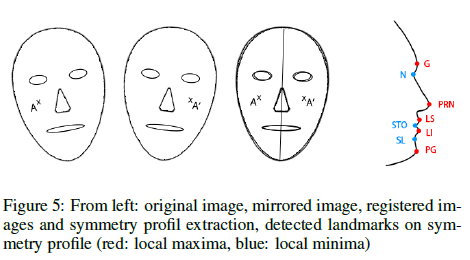)

Notes: It is possible that once we get the curvature of the 2D curve, we just define the landmarks from top to bottom.


### The pseudocode based on [Li, Cole, et. al. 2017]

Detects (Among the 17 Control Points):

*   Pronasale
*   Nasion
*   Subnasale
*   Labial Superius
*   Stomion
*   Gnathion
*   Endocanthions
*   Exocanthions
*   Alares
*   Subalares
*   Zygions

The article does not describe what it means by "third" in step 6, though it seems like it means the nasal region based on the images (Fig. 2g).

A small training set of 50 faces was used in this article to create a facial atlas of the landmarks, which represents the mean face.

Definitions:

m_x,y,z - the midpoint of the face at the x, y, and z axis, respectively

M_1 - the point cloud resulting from the second segmentation

M_2 - the point cloud resulting from the third segmentation

[Adjusting position and orientation for landmark detection]
1.	Highlight the features by applying curvature thresholds to restrict the points to those with high surface curvature (points with a strong negative or strong positive curvature)
2.	Remove outliers (points not associated with the nose, lips, eyes, or ears) by performing connected component curvature analysis
3.	Segment the eyes and nose by removing all points with a strong negative curvature and with z < m_z and (x – m_x)^2 + (y – m_y)^2 > r^2 (within a radius of m_x and m_y)
4.	Orientate the face about the y-axis so that the segment between the minimum and maximum x-coordinates of the face (outline of both ears) is parallel to the x-axis
5.	Re-segment the face (step 3) and use the resulting point cloud, M_1, for principal component analysis
6.	Get the final orientation by rotating the face, with a center of rotation parallel to the x-axis, around the centroid of M_1 so that the z-y slope of the third is set to 0.175
7.	Re-segment the face by performing step 3 again to get the resulting point cloud M_2
8.	Get the final position by translating the mesh so that the centroid of M_2 is at the origin
[Landmark detection]
9.	Place control points on a template atlas to allow transfer of facial landmarks of the template atlas to the face model (article uses 17 control points)
10.	Derive the mean face from the training set (the facial atlas)
11.	Morph the mean face to the subject face (done using the thin-plate spline algorithm, which was guided by the control points)
12.	Transfer the landmarks on the template mesh to the respective control points on the subject mesh (done using the thin-plate spline interpolant)
13.	Transfer the landmarks on the mean face atlas template to the subject face

![[Li,Cole,et al]_Figure2.PNG](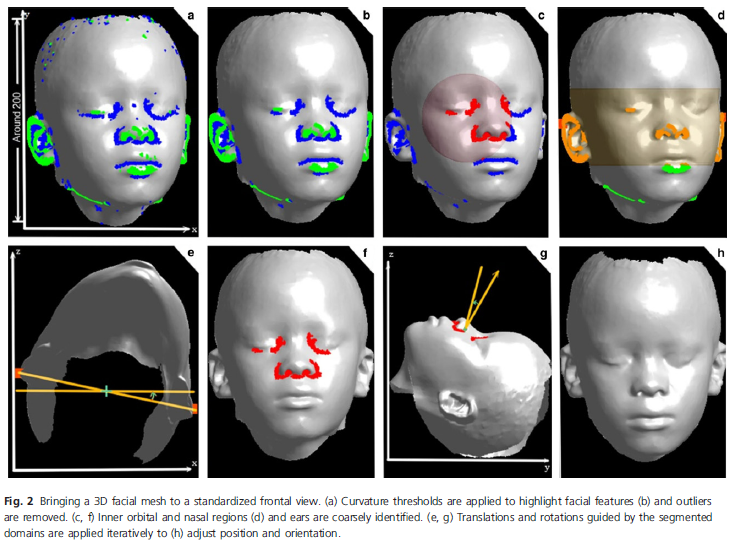)

Notes: 

Orient and select segments/regions of the face, and then put control points on a template to transfer landmarks later. 
Get the mean face, morph the mean face to the subject face, and transfer landmarks from the template/mean to the subject.

### The pseudocode based on [Mehryar, S., Martin, K., et al. 2010]

Detects:
- Nose tip
- Eyes
- Mouth

I don't think it is good for fine-tuning the exact locations of pronasale or chelion, just to find the general region. It can also be extended to find other points such as the chin

1. Pre-process the model using hole-filling, smoothing, and filtering algorithms
2. Apply parametrization to the model based on depth at each point. Each point is expressed by z=f(x,y), so x and y are the basis of parametrization
3. Calculate Gaussian (K) and Mean (H) curvatures at each point
4. Create a set of all ridge points and all valley points
    V = {(x,y,z) | H(x,y)>Hth, -Kth<K(x,y)<Kth}
    R = {(x,y,z) | H(x,y)<Hth, -Kth<K(x,y)<Kth}
    where Kth and Hth are the threshhold K and H value. Both are positive, and are set based on a training process
5. These sets are clustered recursively based on their Euclidean distance to other points, so neighboring points join the same cluster (similar to DBSCAN). V and R are clustered separately
6. Remove all clusters containing fewer points than the pre-set minimum, to remove unwanted small groups
7. Find the representative point of each cluster by taking the arithmetic average of all points in the cluster
8. Find the set of all representative points
9. From this set, select the first four points. The first point is the candidate nose tip, then the candidate left eye, right eye, and mouth; order matters.
10. Test the six distance relations and nine angular relations to ensure they lie within a pre-set range (see below). If so, then accept this as a possible solution, otherwise reject it
11. Repeat steps 9 and 10 for all permutations of four points from the set
12. If there are no solutions, then loosen the distance and angular restrictions and try again. If there are multiple solutions, pick the one that fits the requirements the best
13. These points are the eyes, mouth, and nose tip

Below are two figures. The first shows an overview of the entire process, the second shows the distance and angular relations between the points.

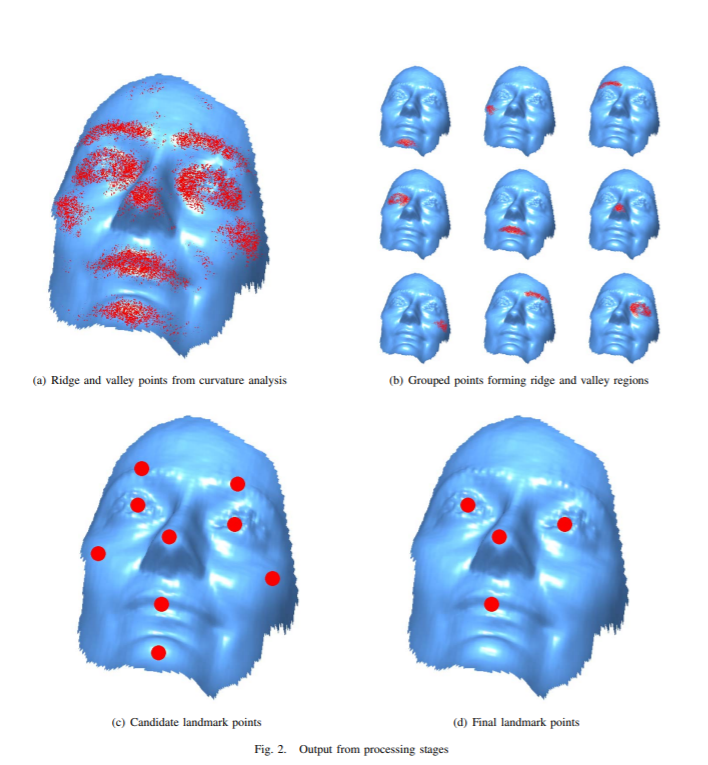

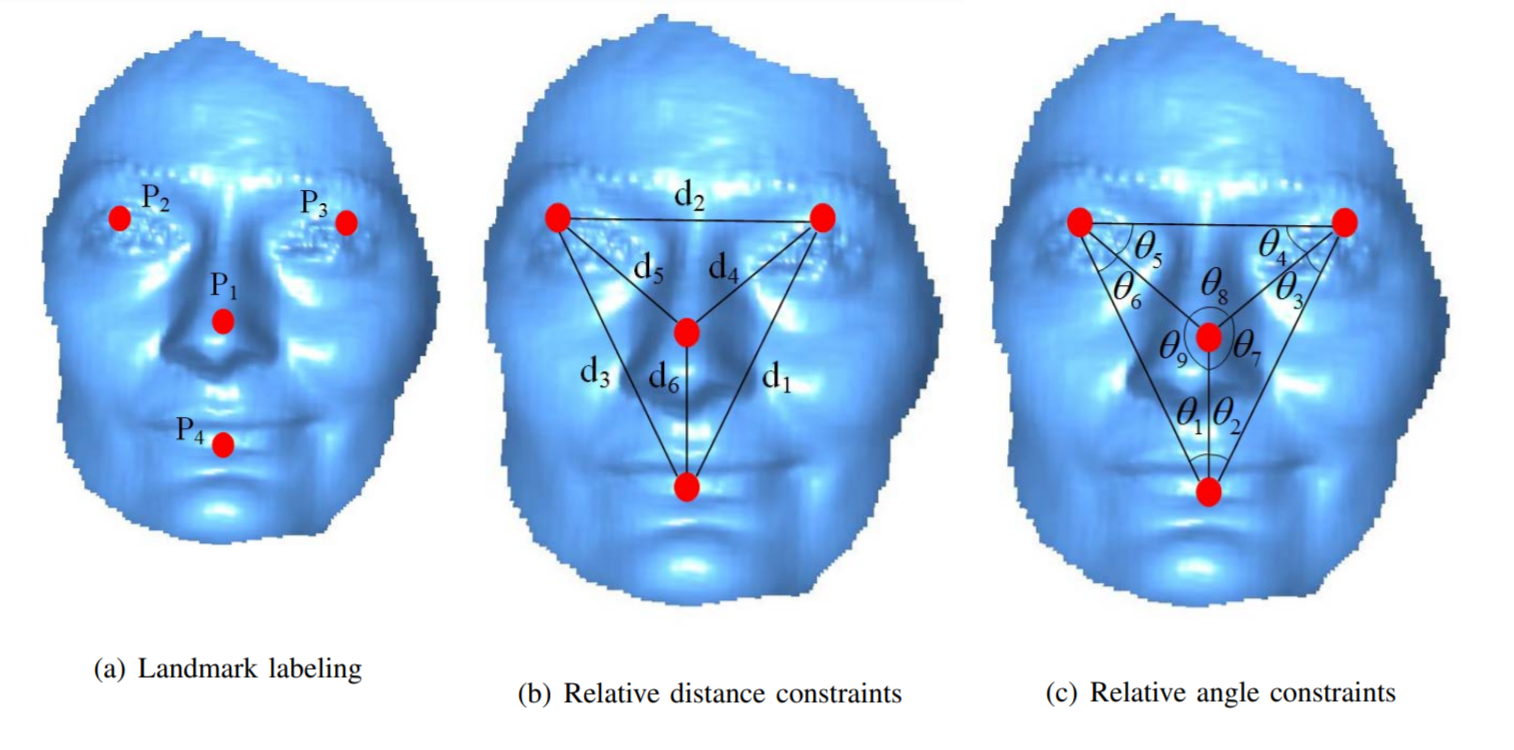

Notes: 

Estimating general locations by clustering points, getting representative points, and ensuring the points fit some distance and angular relations. Need to know what these relations are and how to set/refine the preset range.

### The pseudocode based on [Perakis, Passalis, 2010]

Check for terms: [Definitions](#def_perakis)

Detects:

*   Pronasale
*   Gnathion
*   Endocanthions
*   Exocanthions
*   Cheilions



Dependencies:

*   Creation of Facial Landmark Models (FLM8, FLM5L, and FLM5R)
*   Mapping of 3D facial information into a 2D space


The first part involves the location of potential landmark points (candiate landmarks) for each of the 5 landmarks to be detected. The second part involves transforming the candidate landmarks into several FLMs to find the best solution.

While the main purpose of the reduced sets of 5 landmarks in the article is to allow the detection of landmarks for profile and semi-profile faces, it has the advantage of reducing the combinatory search space for creating the complete sets of 8 landmarks ($O(N^8)\to O(N^5)$), for $N$ candidate landmarks.

[Candidate Landmarks]
1.	Calculate the shape index values for each point p, of the face
2.	Create the shape index map by mapping the shape index values to a 2D map
3.	Find the local maxima and minima values on shape index map (these are candidate landmarks)
4.	Sort the maxima and minima values in descending order according to their shape index values
5.	Retain the most significant subset of points for the maxima and the minima
6.	Generate the radial map and the tangent map for the 3D face
7.	Generate the extrusion map by calculating the product of the radial map and the tangent map
8.	Find the local maxima values of the extrusion map that are also the local maxima for the shape index map (this narrows down the number of candidate landmarks)
9.	Sort the local maxima values in descending order according to their extrusion map values
10.	Retain the most significant subset of extruded points
[Landmark labeling]
11.	Extract the candidate landmarks located in the previous steps
12.	Create feasible combinations of 5 landmarks (endocanthions, exocanthions, cheilions, pronasale, and gnathion) from the extract candidate points
13.	Compute and perform the rigid transformation that best aligns the landmark combinations with the FLM5L and FLM5R (FLM for left and right landmark combinations, respectively)
14.	Filter out combinations inconsistent with FLM5L or FLM5R
15.	Sort the consistent landmark combinations in descending order according to the normalized Procrustes distance, D_NP, from the corresponding FLM
16.	Fuse the left and right combinations of 5 landmarks into complete sets of 8 landmarks
17.	Compute and perform the rigid transformation that best aligns the complete 8 landmark combinations with the FLM8
18.	Filter out combinations inconsistent with the FLM8
19.	Sort the remaining consistent landmark combinations in descending order according to the normalized Procrustes distance, D_NP, from the FLM8
20.	Select the best combination of landmarks based on the Procrustes distance to their respective FLM

## Definitions

### Vezzetti, Marcolin 2014

Dx - Derivative of z with respect to x

Dy - Derivative of z with respect to y

Dxx - Second derivative of z with respect to x

Dyy - Second derivative of z with respect to y

Critical points - Points at which Dx and Dy are approximately zero

S - Shape index

$S=-\frac{2}{\pi}arctan\frac{k_1+k_2}{k_1-k_2},\;\;\;S\in[-1,1],\;\;\;k_1\geq k_2$

C - Curvedness index

$C=\sqrt{\frac{k_1^{\;2}+k_2^{\;2}}{2}}$

u - Instrument uncertainty. In the article this was assigned as 0.025

h is a differentiable function z = h(x, y)

I assume hx, hy, hxx, etc. are the derivatives of h, similar to D above

k1 and k2 are the Principal Curvatures

$K=k_{1}k_{2}$

$H=\frac{k_{1}+k_{2}}{2}$

$E=1+h_{x}^{\;2}$

$F=h_{x}h_{y}$

$G=1+h_{y}^{\;2}$

$e=\frac{-h_{xx}}{\sqrt{1+h_{x}^{\;2}+h_{y}^{\;2}}}$

$f=\frac{-h_{xy}}{\sqrt{1+h_{x}^{\;2}+h_{y}^{\;2}}}$

$g=\frac{-h_{yy}}{\sqrt{1+h_{x}^{\;2}+h_{y}^{\;2}}}$

$K=\frac{h_{xx}h_{yy}-h_{xy}^{\;\;2}}{(1+h_{x}^{\;2}+h_{y}^{\;2})^{2}}$

$H=\frac{(1+h_{x}^{\;2})h_{yy}-2h_{x}h_{y}h_{xy}+(1+h_{y}^{\;2})h_{xx}}{(1+h_{x}^{\;2}+h_{y}^{\;2})^{3/2}}$

$k_{1}=H+\sqrt{H^{2}-K}$

$k_{2}=H-\sqrt{H^{2}-K}$

### Gupta, Markey, et. al. 2010 <a name="def_gupta"></a>

z_x - the first partial derivative of z(x,y) with respect to x

z_y - the first partial derivative of z(x,y) with respect to y

z_xx - the second partial derivative of z(x,y) with respect to x

z_yy - the second partial derivative of z(x,y) with respect to y

z_xy - the second partial derivative of z(x,y) with respect to x and y

K - the Gaussian surface curvature of the face

*   K > 0 indicates that a region is elliptical
*   K < 0 indicates that a region is hyperbolic
*   K = 0 indicates that a region is either planar or cylindrical

H - the mean surface curvature of the face

*   H > 0 indicates that a region is concave
*   H < 0 indicates that a region is convex

k1, k2 - the two principal curvatures of the face

Critical points - points with high curvature values

ν - the highest vertical point of the 3D face

$K=\frac{z_{xx}z_{yy}-z_{xy}^{\;\;2}}{(1+z_x^{\;2}+z_y^{\;2})^2}$

$H=\frac{z_{xx}(1+z_y^{\;2})+z_{yy}(1+x_x^{\;2})-2z_xz_yz_{xy}}{(1+z_x^{\;2}+z_y^{\;2})^{3/2}}$

$k_1,k_2=H\pm\sqrt{H^2-K}$

### Perakis, Passalis, 2010 <a name="def_perakis"></a>


Shape index ($SI(p)$) – a continuous mapping of principle curvature values $(k_{max}, k_{min})$ of a point $p$ on a 3D object into the interval [0,1]

*   $SI(p) = \frac{1}{2}-\frac{1}{\pi}tan^{-1}\frac{k_{max}(p)+k_{min}(p)}{k_{max}(p)-k_{min}(p)}$

Shape index map ($SImap(u,v)$) – a 2D mapping of the shape index values

*   $ShapeIndex(x,y,z)\to SI_{map}(u,v)$

Radial map ($R_{map}(u,v)$) – a 2D map that represents, for each $u,v$ pixel, the distance of the corresponding $(x,y,z)$ point from the centroid of the object, normalized to [0,1]

*   $|r(x,y,z)|\to R_{map}(u,v)$

Tangent map ($T_{map}(u,v)$)– a 2D map that represents, for each $u,v$ pixel, the cosine value of the angle between the normal vector, $n$, at the corresponding $(x,y,z)$ point and the radial vector, $r$, from the centroid of the object

*   $\cos(r(x,y,z),n(x,y,z))\to T_{map}(u,v)$

Extrusion map ($E_{map}(u,v)$) – the product of the radial map and the tangent map, and is subsequently normalized to [0,1]

*   $E_{map}(u,v) = R_{map}(u,v)\times T_{map}(u,v)$

Normalized Procrustes distance ($D_{NP}$) - the normalized form of the Procrustes distance, $D_P$, where $k$ is the shape space dimension ($k = 24$ for FLM8 and $k = 15$ for both FLM5L and FLM5R) and $x$ and $y$ are the two shape vectors

*   $D_P = \sqrt{\sum_{j=1}^{k}(x_j-y_j)^2}$
*   $D_{NP}=\frac{D_P}{k^2}$

FLM8 - the facial landmark model for the complete set of 8 landmarks

FLM5L - the facial landmark model for a reduced set of 5 landmarks on the left side of the face

FLM5R - the facial landmark model for a reduced set of 5 landmarks on the right side of the face

# Test Suite

## Test all for one object files

In [ ]:
#create a loop for each model in directory
#run each landmark on all models instead of each model with all landmarks

!pip install trimesh
import trimesh
import csv

mesh = trimesh.load('OguzhanTopsakal.obj')

alar_base_junction = find_alar_base_junction(mesh)
print("alar base junction left:", alar_base_junction[0])
print("alar base junction right:", alar_base_junction[1])
alar_rim_highest = find_alar_rim_highest(mesh)
print("alar rim highest left:", alar_rim_highest[0])
print("alar rim highest right:", alar_rim_highest[1])
alar_flare = find_alar_flare(mesh)
print("alar flare left:", alar_flare[0])
print("alar flare right:", alar_flare[1])
cheilion = find_cheilion(mesh)
print("cheilion left:", cheilion[0])
print("cheilion right:", cheilion[1])

columellar_break = find_columellar_break(mesh)
print("columellar break:", columellar_break)

columellar_rim = find_columellar_rim(mesh)
print("columellar rim left:", columellar_rim[0])
print("columellar rim right:", columellar_rim[1])

endocanthion = find_endocanthion(mesh)
print("endocanthion left:", endocanthion[0])
print("endocanthion right:", endocanthion[1])

exocanthion = find_exocanthion(mesh)
print("exocanthion left:", exocanthion[0])
print("exocanthion right:", exocanthion[1])

glabella = find_glabella(mesh)
print("glabella", glabella)

gnathion = find_gnathion(mesh)
print("gnathion:", gnathion)

labiale_superius = find_labiale_superius(mesh)
print("labiale superius:", labiale_superius)

lateral_helix_ear = find_lateral_helix_ear(mesh)
print("lateral_helix_ear left:", lateral_helix_ear[0])
print("lateral_helix_ear right:", lateral_helix_ear[1])

maxillofrontale = find_maxillofrontale(mesh)
print("maxillofrontale left:", maxillofrontale[0])
print("maxillofrontale right:", maxillofrontale[1])

nasal_parenthesis = find_nasal_parenthesis(mesh)
print("nasal parenthesis left:", nasal_parenthesis[0])
print("nasal parenthesis right:", nasal_parenthesis[1])

nasion = find_nasion(mesh)
print("nasion:", nasion)

pronasale = find_pronasale(mesh)
print("pronasale:", pronasale)

sellion = find_sellion(mesh)
print("sellion:", sellion)

stomion = find_stomion(mesh)
print("stomion:", stomion)

subalare = find_subalare(mesh)
print("subalare left:", subalare[0])
print("subalare right:", subalare[1])

subnasale = find_subnasale(mesh)
print("subnasale:", subnasale)

subnasale_left_right = find_subnasale_left_right(mesh)
print("subnasale left:", subnasale_left_right[0])
print("subnasale right:", subnasale_left_right[1])

supratip_break_point = find_supratip_break(mesh)
print("supratip break point:", supratip_break_point)

tip_defining_point = find_tip_defining(mesh)
print("tip defining point left:", tip_defining_point[0])
print("tip defining point right:", tip_defining_point[1])

trichion = find_trichion(mesh)
print("trichion:", trichion)

zygion = find_zygion(mesh)
print("zygion left:", zygion[0])
print("zygion right:", zygion[1])

rows = [[alar_base_junction[0].x, alar_base_junction[0].y, alar_base_junction[0].z],
        [alar_base_junction[1].x, alar_base_junction[1].y, alar_base_junction[1].z],
        [alar_rim_highest[0].x, alar_rim_highest[0].y, alar_rim_highest[0].z],
        [alar_rim_highest[1].x, alar_rim_highest[1].y, alar_rim_highest[1].z],
        [alar_flare[0].x, alar_flare[0].y, alar_flare[0].z],
        [alar_flare[1].x, alar_flare[1].y, alar_flare[1].z],
        [cheilion[0].x, cheilion[0].y, cheilion[0].z],
        [cheilion[1].x, cheilion[1].y, cheilion[1].z],
        [columellar_break.x, columellar_break.y, columellar_break.z],
        [columellar_rim[0].x, columellar_rim[0].y, columellar_rim[0].z],
        [columellar_rim[1].x, columellar_rim[1].y, columellar_rim[1].z],
        [endocanthion[0].x, endocanthion[0].y, endocanthion[0].z],
        [endocanthion[1].x, endocanthion[1].y, endocanthion[1].z],
        [exocanthion[0].x, exocanthion[0].y, exocanthion[0].z],
        [exocanthion[1].x, exocanthion[1].y, exocanthion[1].z],
        [glabella.x, glabella.y, glabella.z],
        [gnathion.x, gnathion.y, gnathion.z],
        [labiale_superius.x, labiale_superius.y, labiale_superius.z],
        [lateral_helix_ear[0].x, lateral_helix_ear[0].y, lateral_helix_ear[0].z],
        [lateral_helix_ear[1].x, lateral_helix_ear[1].y, lateral_helix_ear[1].z],
        [maxillofrontale[0].x, maxillofrontale[0].y, maxillofrontale[0].z],
        [maxillofrontale[1].x, maxillofrontale[1].y, maxillofrontale[1].z],
        [nasal_parenthesis[0].x, nasal_parenthesis[0].y, nasal_parenthesis[0].z],
        [nasal_parenthesis[1].x, nasal_parenthesis[1].y, nasal_parenthesis[1].z],
        [nasion.x, nasion.y, nasion.z],
        [pronasale.x, pronasale.y, pronasale.z],
        [sellion.x, sellion.y, sellion.z],
        [stomion.x, stomion.y, stomion.z],
        [subalare[0].x, subalare[0].y, subalare[0].z],
        [subalare[1].x, subalare[1].y, subalare[1].z],
        [subnasale.x, subnasale.y, subnasale.z],
        [subnasale_left_right[0].x, subnasale_left_right[0].y, subnasale_left_right[0].z],
        [subnasale_left_right[1].x, subnasale_left_right[1].y, subnasale_left_right[1].z],
        [supratip_break_point.x, supratip_break_point.y, supratip_break_point.z],
        [tip_defining_point[0].x, tip_defining_point[0].y, tip_defining_point[0].z],
        [tip_defining_point[1].x, tip_defining_point[1].y, tip_defining_point[1].z],
        [trichion.x, trichion.y, trichion.z],
        [zygion[0].x, zygion[0].y, zygion[0].z],
        [zygion[1].x, zygion[1].y, zygion[1].z]]
with open("OguzhanTopsakal.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

## Unzip Files

In [ ]:
from zipfile import ZipFile

file_name = "objFiles.zip"

with ZipFile(file_name, 'r') as zip:
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

## Test Suite loop for all object files

In [ ]:
#for some reason, the AWS models upload with .OBJ extension in caps instead of lowercase, 
#so the endswith function may need to be changed for this to work with those models
!pip install trimesh
import trimesh
import csv
import os

models = []

for file_name in os.listdir('/content'):
  if file_name.endswith(".obj"):
    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  alar_base_junction = find_alar_base_junction(mesh)
  print("alar base junction left:", alar_base_junction[0])
  print("alar base junction right:", alar_base_junction[1])
  #alar_rim_highest = find_alar_rim_highest(mesh)
  #print("alar rim highest left:", alar_rim_highest[0])
  #print("alar rim highest right:", alar_rim_highest[1])
  alar_flare = find_alar_flare(mesh)
  print("alar flare left:", alar_flare[0])
  print("alar flare right:", alar_flare[1])
  #cheilion = find_cheilion(mesh)
  #print("cheilion left:", cheilion[0])
  #print("cheilion right:", cheilion[1])
  #columellar_break = find_columellar_break(mesh)
  #print("columellar break:", columellar_break)
  #columellar_rim = find_columellar_rim(mesh)
  #print("columellar rim left:", columellar_rim[0])
  #print("columellar rim right:", columellar_rim[1])
  #endocanthion = find_endocanthion(mesh)
  #print("endocanthion left:", endocanthion[0])
  #print("endocanthion right:", endocanthion[1])
  #exocanthion = find_exocanthion(mesh)
  #print("exocanthion left:", exocanthion[0])
  #print("exocanthion right:", exocanthion[1])
  glabella = find_glabella(mesh)
  print("glabella", glabella)
  #gnathion = find_gnathion(mesh)
  #print("gnathion:", gnathion)
  #labiale_superius = find_labiale_superius(mesh)
  #print("labiale superius:", labiale_superius)
  #lateral_helix_ear = find_lateral_helix_ear(mesh)
  #print("lateral_helix_ear left:", lateral_helix_ear[0])
  #print("lateral_helix_ear right:", lateral_helix_ear[1])
  #maxillofrontale = find_maxillofrontale(mesh)
  #print("maxillofrontale left:", maxillofrontale[0])
  #print("maxillofrontale right:", maxillofrontale[1])
  #nasal_parenthesis = find_nasal_parenthesis(mesh)
  #print("nasal parenthesis left:", nasal_parenthesis[0])
  #print("nasal parenthesis right:", nasal_parenthesis[1])
  #nasion = find_nasion(mesh)
  #print("nasion:", nasion)
  pronasale = find_pronasale(mesh)
  print("pronasale:", pronasale)
  sellion = find_sellion(mesh)
  print("sellion:", sellion)
  #stomion = find_stomion(mesh)
  #print("stomion:", stomion)
  subalare = find_subalare(mesh)
  print("subalare left:", subalare[0])
  print("subalare right:", subalare[1])
  subnasale = find_subnasale(mesh)
  print("subnasale:", subnasale)
  subnasale_left_right = find_subnasale_left_right(mesh)
  print("subnasale left:", subnasale_left_right[0])
  print("subnasale right:", subnasale_left_right[1])
  #supratip_break_point = find_supratip_break(mesh)
  #print("supratip break point:", supratip_break_point)
  #tip_defining_point = find_tip_defining(mesh)
  #print("tip defining point left:", tip_defining_point[0])
  #print("tip defining point right:", tip_defining_point[1])
  trichion = find_trichion(mesh)
  print("trichion:", trichion)
  zygion = find_zygion(mesh)
  print("zygion left:", zygion[0])
  print("zygion right:", zygion[1])

  rows = [["alar base junction left", alar_base_junction[0].x, alar_base_junction[0].y, alar_base_junction[0].z],
          ["alar base junction right", alar_base_junction[1].x, alar_base_junction[1].y, alar_base_junction[1].z],
          #["alar rim's highest point left", alar_rim_highest[0].x, alar_rim_highest[0].y, alar_rim_highest[0].z],
          #["alar rim's highest point right", alar_rim_highest[1].x, alar_rim_highest[1].y, alar_rim_highest[1].z],
          ["alar flare left", alar_flare[0].x, alar_flare[0].y, alar_flare[0].z],
          ["alar flare right", alar_flare[1].x, alar_flare[1].y, alar_flare[1].z],
          #["cheilion left", cheilion[0].x, cheilion[0].y, cheilion[0].z],
          #["cheilion right", cheilion[1].x, cheilion[1].y, cheilion[1].z],
          #["columellar break point", columellar_break.x, columellar_break.y, columellar_break.z],
          #["columellar rim left", columellar_rim[0].x, columellar_rim[0].y, columellar_rim[0].z],
          #["columellar rim right", columellar_rim[1].x, columellar_rim[1].y, columellar_rim[1].z],
          #["endocanthion left", endocanthion[0].x, endocanthion[0].y, endocanthion[0].z],
          #["endocanthion right", endocanthion[1].x, endocanthion[1].y, endocanthion[1].z],
          #["exocanthion left", exocanthion[0].x, exocanthion[0].y, exocanthion[0].z],
          #["exocanthion right", exocanthion[1].x, exocanthion[1].y, exocanthion[1].z],
          ["glabella", glabella.x, glabella.y, glabella.z],
          #["gnathion", gnathion.x, gnathion.y, gnathion.z],
          #["labiale superius", labiale_superius.x, labiale_superius.y, labiale_superius.z],
          #["lateral helix of ear left", lateral_helix_ear[0].x, lateral_helix_ear[0].y, lateral_helix_ear[0].z],
          #["lateral helix of ear right", lateral_helix_ear[1].x, lateral_helix_ear[1].y, lateral_helix_ear[1].z],
          #["maxillofrontale left", maxillofrontale[0].x, maxillofrontale[0].y, maxillofrontale[0].z],
          #["maxillofrontale right", maxillofrontale[1].x, maxillofrontale[1].y, maxillofrontale[1].z],
          #["nasal parenthesis left", nasal_parenthesis[0].x, nasal_parenthesis[0].y, nasal_parenthesis[0].z],
          #["nasal parenthesis right", nasal_parenthesis[1].x, nasal_parenthesis[1].y, nasal_parenthesis[1].z],
          #["nasion", nasion.x, nasion.y, nasion.z],
          ["pronasale", pronasale.x, pronasale.y, pronasale.z],
          ["sellion", sellion.x, sellion.y, sellion.z],
          #["stomion", stomion.x, stomion.y, stomion.z],
          ["subalare left", subalare[0].x, subalare[0].y, subalare[0].z],
          ["subalare right", subalare[1].x, subalare[1].y, subalare[1].z],
          ["subnasale", subnasale.x, subnasale.y, subnasale.z],
          ["subnasale left", subnasale_left_right[0].x, subnasale_left_right[0].y, subnasale_left_right[0].z],
          ["subnasale right", subnasale_left_right[1].x, subnasale_left_right[1].y, subnasale_left_right[1].z],
          #["supratip break point", supratip_break_point.x, supratip_break_point.y, supratip_break_point.z],
          #["tip defining point left", tip_defining_point[0].x, tip_defining_point[0].y, tip_defining_point[0].z],
          #["tip defining point right", tip_defining_point[1].x, tip_defining_point[1].y, tip_defining_point[1].z],
          ["trichion", trichion.x, trichion.y, trichion.z],
          ["zygion left", zygion[0].x, zygion[0].y, zygion[0].z],
          ["zygion right", zygion[1].x, zygion[1].y, zygion[1].z]]
  with open(models[i] + ".csv", 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(rows)

## Test Individual Landmarks on all models

In [ ]:
objlistfile = "obj-file-names.csv"
import pandas as pd

### Test Pronasale

In [ ]:
!pip install trimesh

import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  pronasale = find_pronasale(mesh)
  exec_times.append(time.time()-start_time)
  print("pronasale:", pronasale)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], pronasale.x, pronasale.y, pronasale.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("pronasale.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Subnasale

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  subnasale = find_subnasale(mesh)
  exec_times.append(time.time()-start_time)  
  print("subnasale:", subnasale)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], subnasale.x, subnasale.y, subnasale.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("subnasale.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Sellion/ Nasion

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  sellion = find_sellion(mesh)
  exec_times.append(time.time()-start_time)
  print("sellion:", sellion)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], sellion.x, sellion.y, sellion.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("sellion_nasion.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Alar Flare

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  alar_flare = find_alar_flare(mesh)
  exec_times.append(time.time()-start_time)
  print("alar flare left:", alar_flare[0])
  print("alar flare right:", alar_flare[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], alar_flare[0].x, alar_flare[0].y, alar_flare[0].z, exec_times[i], "L"])
  rows.append([models[i], alar_flare[1].x, alar_flare[1].y, alar_flare[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("alar_flare.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Menton/Gnathion

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  gnathion = find_gnathion(mesh)
  exec_times.append(time.time()-start_time)
  print("gnathion:", gnathion)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], gnathion.x, gnathion.y, gnathion.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("menton_gnathion.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Zygion

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  zygion = find_zygion(mesh)
  exec_times.append(time.time()-start_time)
  print("zygion left:", zygion[0])
  print("zygion right:", zygion[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], zygion[0].x, zygion[0].y, zygion[0].z, exec_times[i], "L"])
  rows.append([models[i], zygion[1].x, zygion[1].y, zygion[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("zygion.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Nasal Parenthesis

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  nasal_parenthesis = find_nasal_parenthesis(mesh)
  exec_times.append(time.time()-start_time)
  print("nasal parenthesis left:", nasal_parenthesis[0])
  print("nasal parenthesis right:", nasal_parenthesis[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], nasal_parenthesis[0].x, nasal_parenthesis[0].y, nasal_parenthesis[0].z, exec_times[i], "L"])
  rows.append([models[i], nasal_parenthesis[1].x, nasal_parenthesis[1].y, nasal_parenthesis[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("nasal_parenthesis.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Supratip Break Point

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  supratip_break = find_supratip_break(mesh)
  exec_times.append(time.time()-start_time)
  print("supratip break point:", supratip_break)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], supratip_break.x, supratip_break.y, supratip_break.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("supratip_break_point.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Tip Defining Point

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  tip_defining = find_tip_defining(mesh)
  exec_times.append(time.time()-start_time)
  print("tip defining point left:", tip_defining[0])
  print("tip defining point right:", tip_defining[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], tip_defining[0].x, tip_defining[0].y, tip_defining[0].z, exec_times[i], "L"])
  rows.append([models[i], tip_defining[1].x, tip_defining[1].y, tip_defining[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("tip_defining_point.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Columellar Rim (left/right)

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  columellar_rim = find_columellar_rim(mesh)
  exec_times.append(time.time()-start_time)
  print("columellar rim left:", columellar_rim[0])
  print("columellar rim right:", columellar_rim[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], columellar_rim[0].x, columellar_rim[0].y, columellar_rim[0].z, exec_times[i], "L"])
  rows.append([models[i], columellar_rim[1].x, columellar_rim[1].y, columellar_rim[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("columellar_rim.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Glabella

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  glabella = find_glabella(mesh)
  exec_times.append(time.time()-start_time)
  print("glabella:", glabella)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], glabella.x, glabella.y, glabella.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("glabella.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Subnasale Left/Right

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  subnasale_left_right = find_subnasale_left_right(mesh)
  exec_times.append(time.time()-start_time)
  print("subnasale left:", subnasale_left_right[0])
  print("subnasale right:", subnasale_left_right[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], subnasale_left_right[0].x, subnasale_left_right[0].y, subnasale_left_right[0].z, exec_times[i], "L"])
  rows.append([models[i], subnasale_left_right[1].x, subnasale_left_right[1].y, subnasale_left_right[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("subnasale_left_right.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Subalare

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  subalare = find_subalare(mesh)
  exec_times.append(time.time()-start_time)
  print("subalare left:", subalare[0])
  print("subalare right:", subalare[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], subalare[0].x, subalare[0].y, subalare[0].z, exec_times[i], "L"])
  rows.append([models[i], subalare[1].x, subalare[1].y, subalare[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("subalare.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Columellar Break Point

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  columellar_break = find_columellar_break(mesh)
  exec_times.append(time.time()-start_time)
  print("columellar break point:", columellar_break)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], columellar_break.x, columellar_break.y, columellar_break.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("columellar_break_point.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Alar Rim's Highest Point

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  alar_rim_highest = find_alar_rim_highest(mesh)
  exec_times.append(time.time()-start_time)
  print("alar rim's highest point left:", alar_rim_highest[0])
  print("alar rim's highest point right:", alar_rim_highest[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], alar_rim_highest[0].x, alar_rim_highest[0].y, alar_rim_highest[0].z, exec_times[i], "L"])
  rows.append([models[i], alar_rim_highest[1].x, alar_rim_highest[1].y, alar_rim_highest[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("alar_rim_highest_point.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Labiale Superius

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  labiale_superius = find_labiale_superius(mesh)
  exec_times.append(time.time()-start_time)
  print("labiale superius:", labiale_superius)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], labiale_superius.x, labiale_superius.y, labiale_superius.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("labiale_superius.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Trichion

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  trichion = find_trichion(mesh)
  exec_times.append(time.time()-start_time)
  print("trichion:", trichion)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], trichion.x, trichion.y, trichion.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("trichion.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Endocanthion

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  endocanthion = find_endocanthion(mesh)
  exec_times.append(time.time()-start_time)
  print("endocanthion left:", endocanthion[0])
  print("endocanthion right:", endocanthion[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], endocanthion[0].x, endocanthion[0].y, endocanthion[0].z, exec_times[i], "L"])
  rows.append([models[i], endocanthion[1].x, endocanthion[1].y, endocanthion[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("endocanthion.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Exocanthion

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  exocanthion = find_exocanthion(mesh)
  exec_times.append(time.time()-start_time)
  print("exocanthion left:", exocanthion[0])
  print("exocanthion right:", exocanthion[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], exocanthion[0].x, exocanthion[0].y, exocanthion[0].z, exec_times[i], "L"])
  rows.append([models[i], exocanthion[1].x, exocanthion[1].y, exocanthion[1].z, exec_times[i], "R"])

print("DONE! ")
print("Average execution time: ", mean(exec_times))
#2022-08-13-19-10-42-286CB5C7-E7A4-4A7F-8717-7BE5F0F90F40.obj
with open("exocanthion.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Alar Base Junction

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  alar_base_junction = find_alar_base_junction(mesh)
  exec_times.append(time.time()-start_time)
  print("alar base junction left:", alar_base_junction[0])
  print("alar base junction right:", alar_base_junction[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], alar_base_junction[0].x, alar_base_junction[0].y, alar_base_junction[0].z, exec_times[i], "L"])
  rows.append([models[i], alar_base_junction[1].x, alar_base_junction[1].y, alar_base_junction[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("alar_base_junction.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Stomion

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  stomion = find_stomion(mesh)
  exec_times.append(time.time()-start_time)
  print("stomion:", stomion)
  print("Execution time: ", exec_times[i])
  rows.append([models[i], stomion.x, stomion.y, stomion.z, exec_times[i]])

print("Average execution time: ", mean(exec_times))

with open("stomion.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Maxillofrontale

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  maxillofrontale = find_maxillofrontale(mesh)
  exec_times.append(time.time()-start_time)
  print("maxillofrontale left:", maxillofrontale[0])
  print("maxillofrontale right:", maxillofrontale[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], maxillofrontale[0].x, maxillofrontale[0].y, maxillofrontale[0].z, exec_times[i], "L"])
  rows.append([models[i], maxillofrontale[1].x, maxillofrontale[1].y, maxillofrontale[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("maxillofrontale.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Cheilion

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  cheilion = find_cheilion(mesh)
  exec_times.append(time.time()-start_time)
  print("cheilion left:", cheilion[0])
  print("cheilion right:", cheilion[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], cheilion[0].x, cheilion[0].y, cheilion[0].z, exec_times[i], "L"])
  rows.append([models[i], cheilion[1].x, cheilion[1].y, cheilion[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("cheilion.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

### Test Lateral Helix of Ear

In [ ]:
!pip install trimesh
import trimesh
import csv
import os
import time
from statistics import mean

models = []
rows = []
exec_times = []

models = pd.read_csv(objlistfile,header = None).iloc[:, 0].values.tolist()

#for file_name in os.listdir():
#  if file_name.endswith(".obj"):
#    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  mesh = trimesh.load(models[i])
  start_time = time.time()
  lateral_helix = find_lateral_helix_ear(mesh)
  exec_times.append(time.time()-start_time)
  print("lateral_helix left:", lateral_helix[0])
  print("lateral_helix right:", lateral_helix[1])
  print("Execution time: ", exec_times[i])
  rows.append([models[i], lateral_helix[0].x, lateral_helix[0].y, lateral_helix[0].z, exec_times[i], "L"])
  rows.append([models[i], lateral_helix[1].x, lateral_helix[1].y, lateral_helix[1].z, exec_times[i], "R"])

print("Average execution time: ", mean(exec_times))

with open("lateral_helix_ear.csv", 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

## Output Manual x, y, z from JSON to CSV

In [ ]:
import json
import csv

f = open('2022-07-27-13-07-46-1C00BBE3-97FB-41DA-84BD-F7C77B67F724.JSON')
data = json.load(f)
rows = []
for category in data['features']:
  rows += [[category['name'], category['xVal'], category['yVal'], category['zVal']]]
with open('2022-07-27-13-07-46-1C00BBE3-97FB-41DA-84BD-F7C77B67F724.csv', 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

## Output Manual x, y, z from all JSON Files to CSV

In [ ]:
import os
import json
import csv

models = []
rows = [['3D Model', 'Landmark', 'Manual X', 'Manual Y', 'Manual Z']]

for file_name in os.listdir():
  if file_name.endswith(".JSON"):
    models.append(file_name)

for i in range(len(models)):
  print('----------------------------------------------------------------------')
  print(models[i])
  f = open(models[i])
  data = json.load(f)
  if len(data['features']) == 0:
    print("null")
    rows += [[models[i], 'NA', 'NA', 'NA', 'NA']]
  else:
    print("notnull")
    for category in data['features']:
      rows += [[models[i], category['name'], category['xVal'], category['yVal'], category['zVal']]]

with open('manual_markings_all.csv', 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(rows)

## Output whether JSON file is missing any landmarks

In [ ]:
import os
import json
import csv

models = []
abbreviations = ['ac_l', 'ac_r', 'armax_l', 'armax_r', 'al_l', 
                 'al_r', 'ch_l', 'ch_r', 'cb', 'cmin_l', 'cmin_r',
                 'en_l', 'en_r', 'ex_l', 'ex_r', 'g', 'me', 'ls',
                 'la_l', 'la_r', 'mf_l', 'mf_r', 'np_l', 'np_r',
                 'n', 'prn', 'se', 'sto', 'sbal_l', 'sbal_r', 'sn',
                 'sn_l', 'sn_r', 's', 'td_l', 'td_r', 'tr', 'zy_l',
                 'zy_r']
rows = []
needsMarking = []

for file_name in os.listdir():
  if file_name.endswith(".JSON"):
    models.append(file_name)

for i in range(len(models)):
  f = open(models[i])
  data = json.load(f)

  if len(data['features']) == 0:
    needsMarking.append([models[i], "ALL"])

  else:
    for category in data['features']:
      rows += [[models[i], category['abbrv'], category['name']]]

    for j in range(len(abbreviations)):
      landmarkExists = False

      for category in data['features']:
        if category['abbrv'] == abbreviations[j]:
          landmarkExists = True
          break
      if landmarkExists == False:
        needsMarking.append([models[i], abbreviations[j]])

print(needsMarking)

with open('needsMarking.csv', 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerows(needsMarking)

### Analyze Results

In [135]:
import pandas as pd
csv_path = "TestResults.csv"
results_df = pd.read_csv(csv_path)
results_df.head()

3D Model  \
0  2022-07-25-11-14-04-9C370053-7459-4FF8-956F-85...   
1  2022-07-26-05-01-36-3D119D82-D6AE-41D7-A0F2-4D...   
2  2022-07-26-06-51-06-3D119D82-D6AE-41D7-A0F2-4D...   
3  2022-07-27-13-07-46-1C00BBE3-97FB-41DA-84BD-F7...   
4  2022-07-27-13-38-17-5CACC938-CB1A-46C1-BB25-8B...   

   Alar Base Junction/Alar Crease - left  \
0                               8.283442   
1                              14.331544   
2                              14.157906   
3                               7.815092   
4                               8.419367   

   Alar Base Junction/Alar Crease - right  Alar Rim's Highest Point - left  \
0                                9.464653                         5.217807   
1                               13.229184                        15.112948   
2                               14.884237                         7.060851   
3                               12.647912                        11.255948   
4                                9.712854                         4.446715   

   Alar Rim's Highest Point - right  Alare/Alar Flare - left  \
0                         13.587437                 2.331550   
1                         11.553535                 3.989092   
2                          4.564806                 6.031110   
3                          4.282294                 9.143503   
4                         10.810514                 1.099448   

   Alare/Alar Flare - right  Cheilion - left  Cheilion - right  \
0                  2.683155        13.168144          2.940829   
1                  8.183319        12.997132         13.562080   
2                  5.699111         9.013491         12.930171   
3                 10.098494        10.927055          4.634943   
4                  3.558976         8.238191         10.534701   

   Columellar Break Point  ...  Subalare - right  Subnasale  Subnasale - left  \
0                7.360617  ...          8.657403   5.949578          6.477202   
1                4.265519  ...          5.730643   7.129853          9.918803   
2                1.063558  ...          7.319975   2.238762          6.095140   
3                2.263020  ...          5.582294   5.969880          5.934440   
4                3.714997  ...          7.024664   4.873686          9.624490   

   Subnasale - right  Supratip Break Point  Tip Defining Point - left  \
0           8.809759              0.154366                   1.887660   
1           8.289520              0.839672                   1.699440   
2           2.497018              2.373141                   9.408924   
3           7.144500              4.692316                   4.175860   
4           9.398299              1.836397                   2.738471   

   Tip Defining Point - right   Trichion  Zygion - left  Zygion - right  
0                    1.215302   6.922726      13.866627        6.058821  
1                    5.097840   5.112257       4.828173        2.826602  
2                    9.254960   3.103549       8.541973        8.525914  
3                    5.530805   3.251169      13.412451       19.923234  
4                    2.247329  10.936042       6.329513        2.114911  

[5 rows x 40 columns]

In [108]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   3D Model                                111 non-null    object 
 1   Alar Base Junction/Alar Crease - left   111 non-null    float64
 2   Alar Base Junction/Alar Crease - right  111 non-null    float64
 3   Alar Rim's Highest Point - left         111 non-null    float64
 4   Alar Rim's Highest Point - right        111 non-null    float64
 5   Alare/Alar Flare - left                 111 non-null    float64
 6   Alare/Alar Flare - right                111 non-null    float64
 7   Cheilion - left                         111 non-null    float64
 8   Cheilion - right                        111 non-null    float64
 9   Columellar Break Point                  111 non-null    float64
 10  Columellar Rim - left                   111 non-null    float6

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt

drop_columns = [
"Alar Base Junction/Alar Crease - right",
"Alar Rim's Highest Point - right",
"Alare/Alar Flare - right",
"Cheilion - right",
"Columellar Rim - right", 
"Endocanthion - right",
"Exocanthion - right",
"Lateral helix of ear - right",
"Maxillofrontale - right",           
"Nasal Parenthesis - right",
"Subalare - right",                   
"Subnasale - right",          
"Tip Defining Point - right",
"Zygion - right",
"Nasion/Radix"
]


results_df.drop(columns = drop_columns,inplace=True)

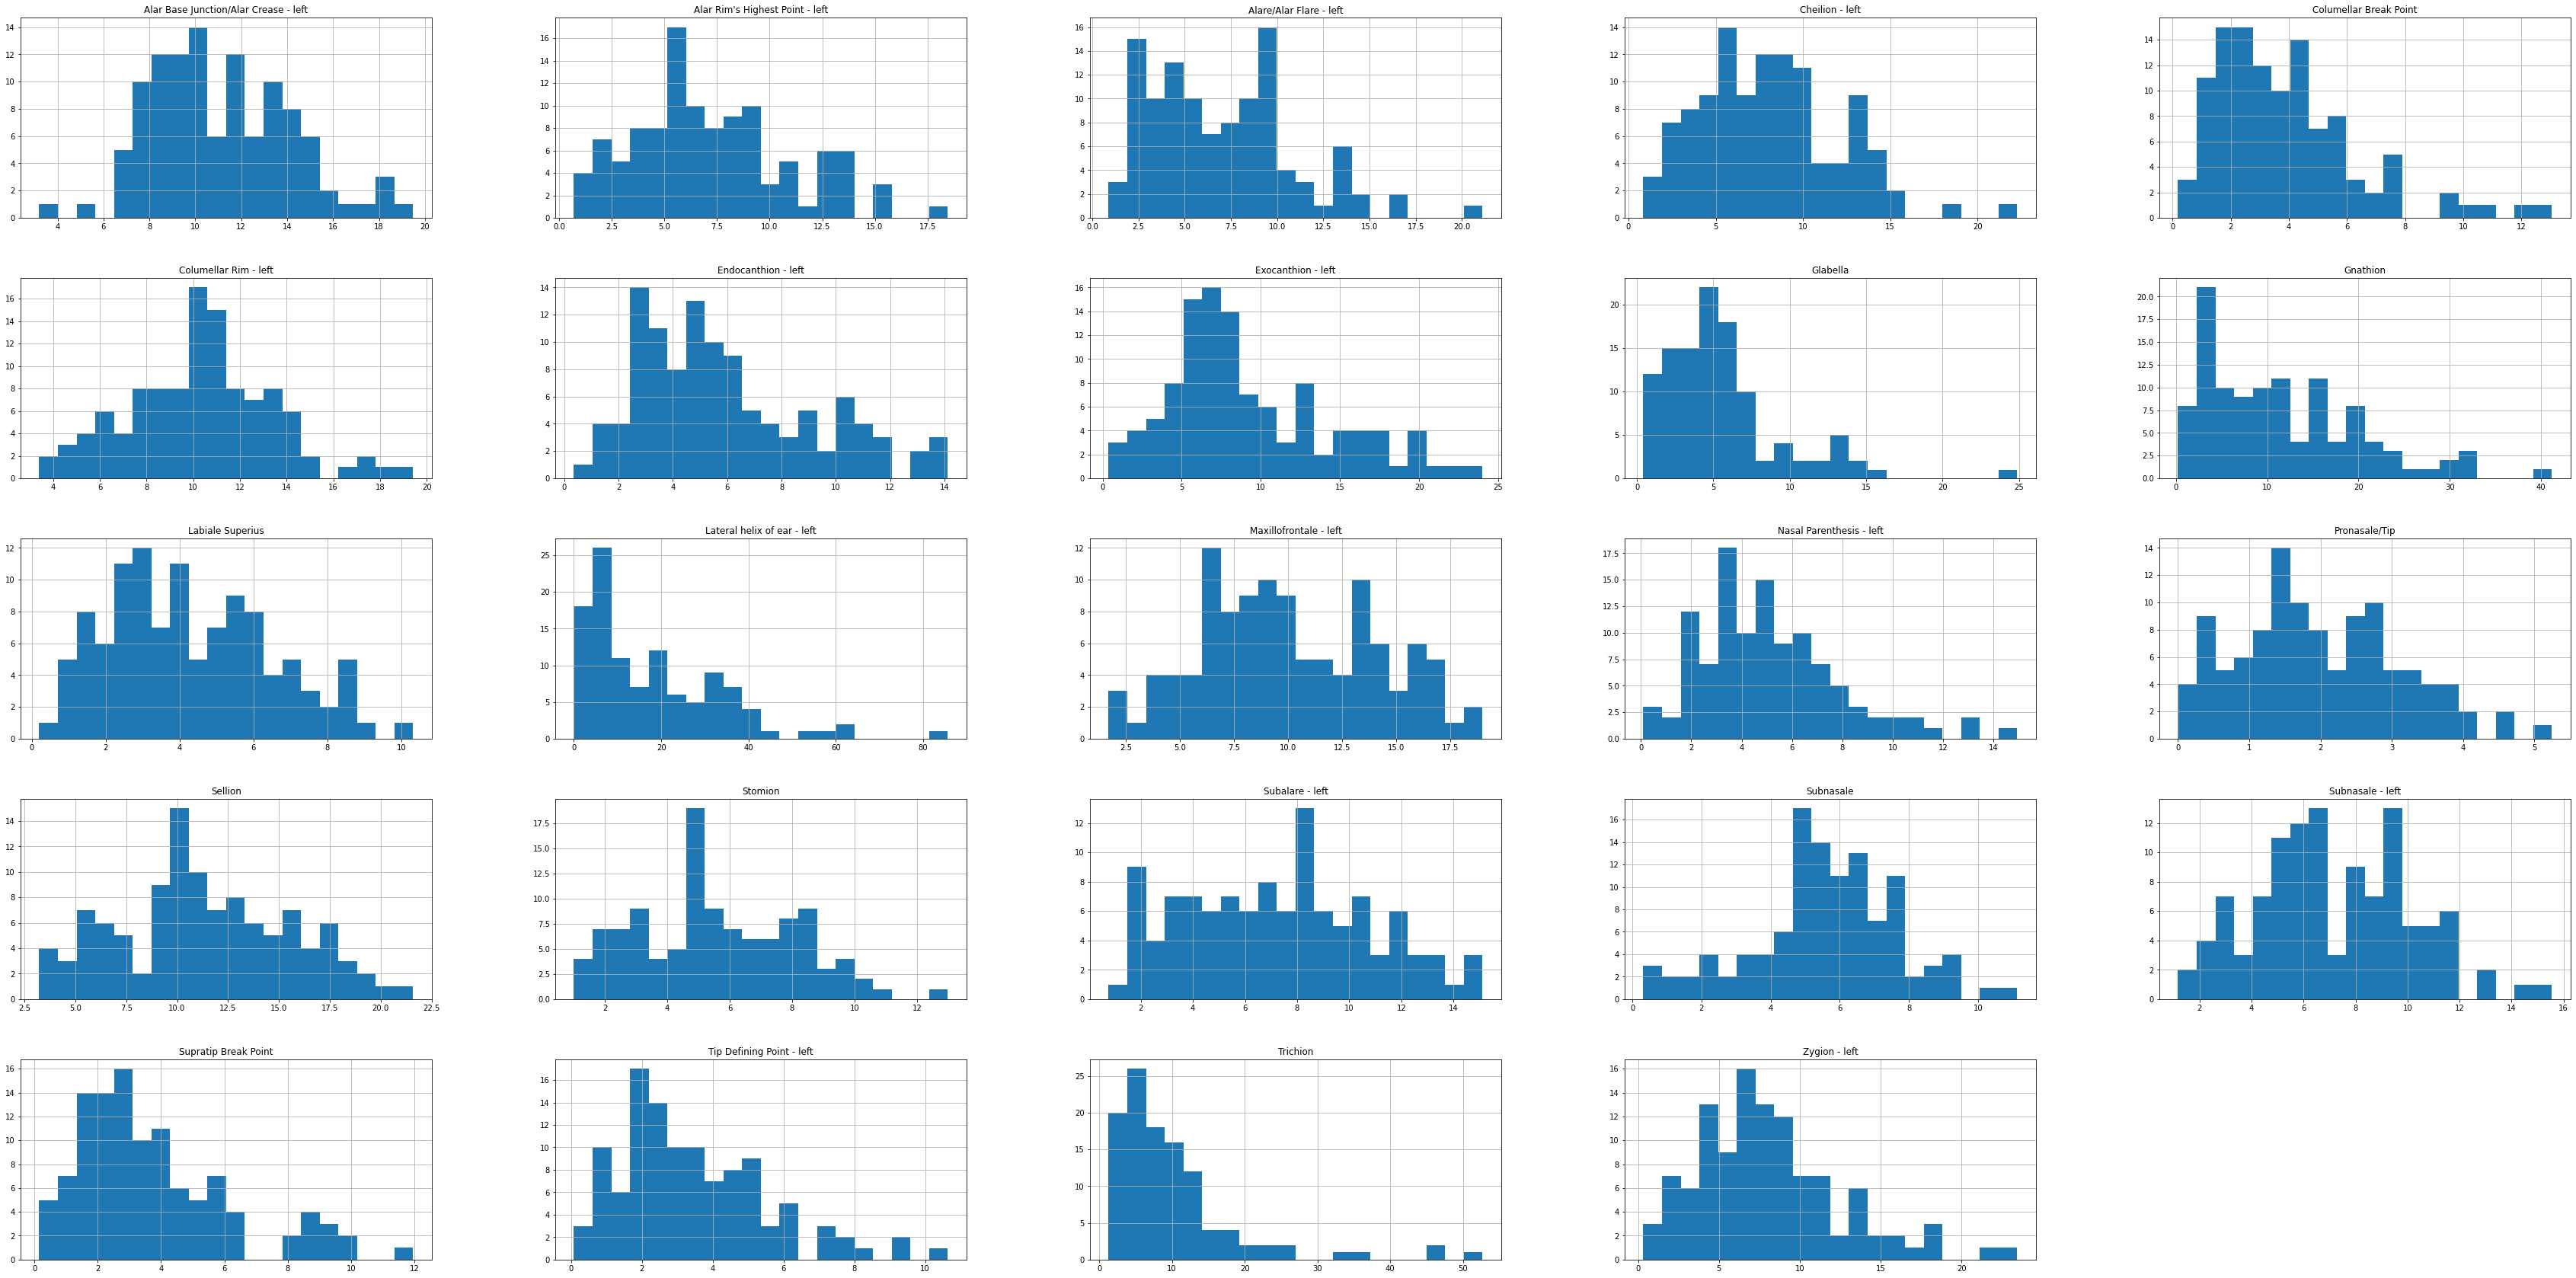

In [137]:
results_df.hist(bins=20, figsize=(60,30))

plt.show()

In [80]:


"Alar Base Junction/Alar Crease - left",
"Alar Rim's Highest Point - left",

"Alare/Alar Flare - left",
"Cheilion - left",

"Columellar Break Point",
"Columellar Rim - left",

"Endocanthion - left",
"Exocanthion - left",

"Glabella",
"Gnathion",

"Labiale Superius",
"Lateral helix of ear - left",

"Maxillofrontale - left",
"Nasal Parenthesis - left",

"Pronasale/Tip",
"Sellion",

"Stomion",
"Subalare - left",

"Subnasale",
"Subnasale - left",

"Supratip Break Point",
"Tip Defining Point - left",

"Trichion",
"Zygion - left",


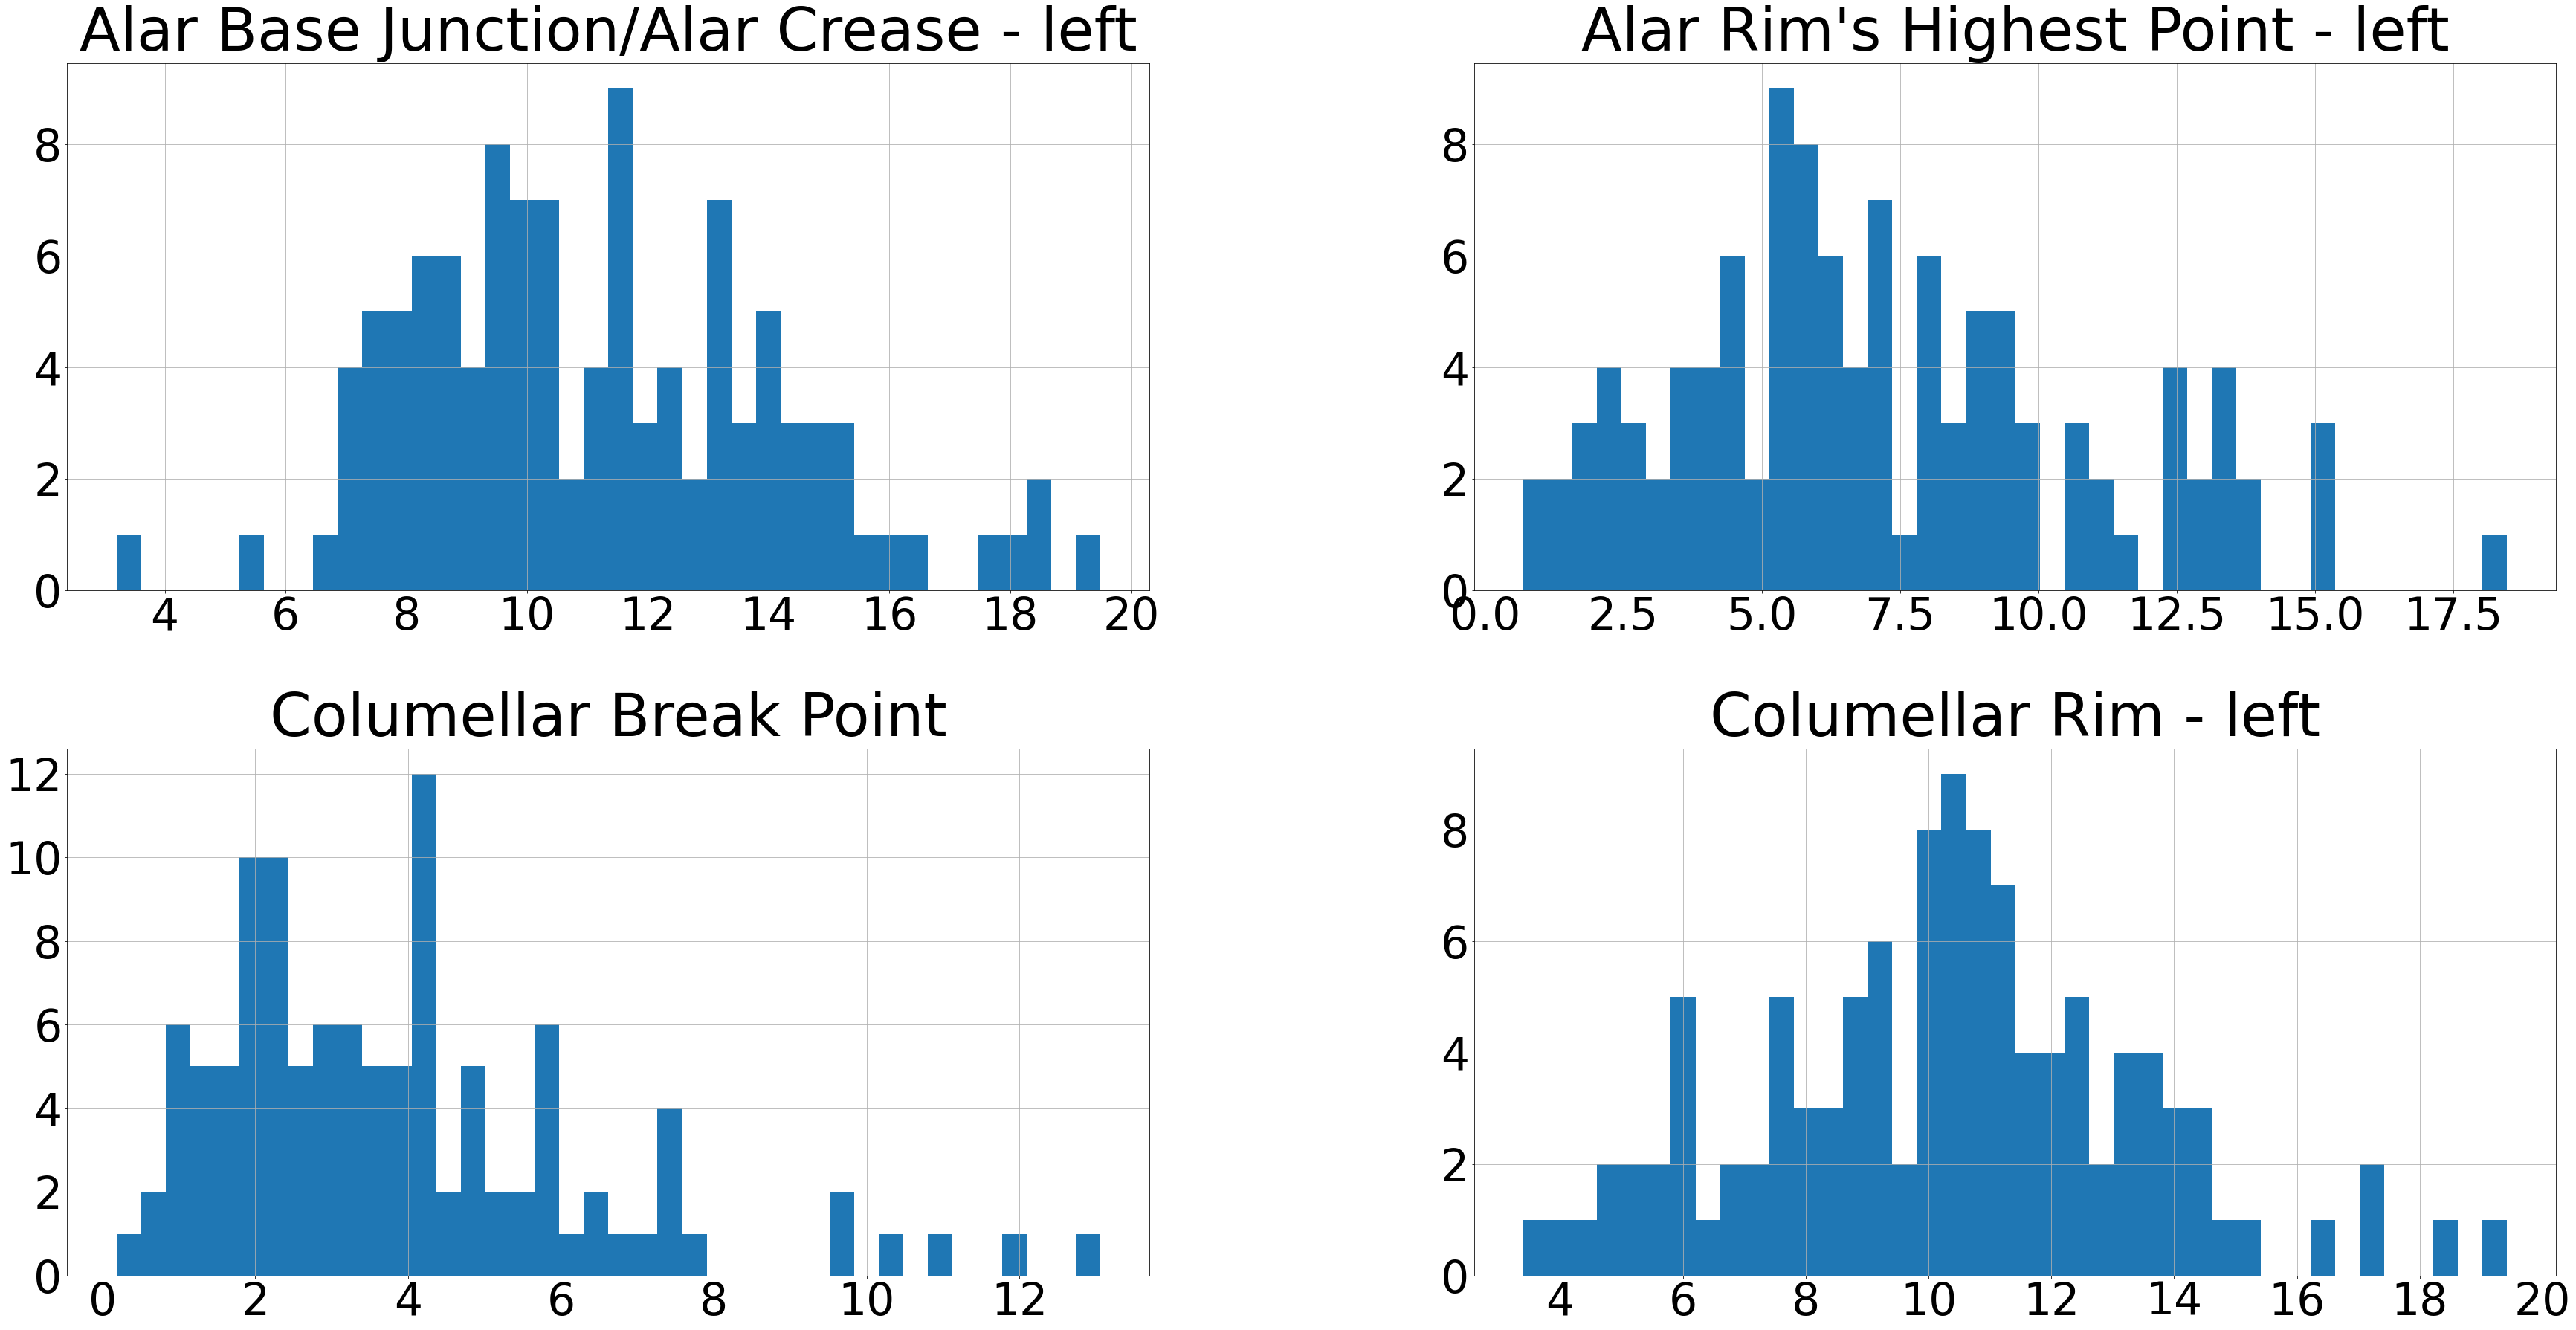

In [149]:
fig = results_df.hist(figsize=(60, 30), bins=40, xlabelsize=60,ylabelsize=60, 
                      column=["Alar Base Junction/Alar Crease - left",
"Alar Rim's Highest Point - left",
"Columellar Break Point",
"Columellar Rim - left"])
[x.title.set_size(80) for x in fig.ravel()]
#plt.suptitle("This is Figure title")

plt.show()

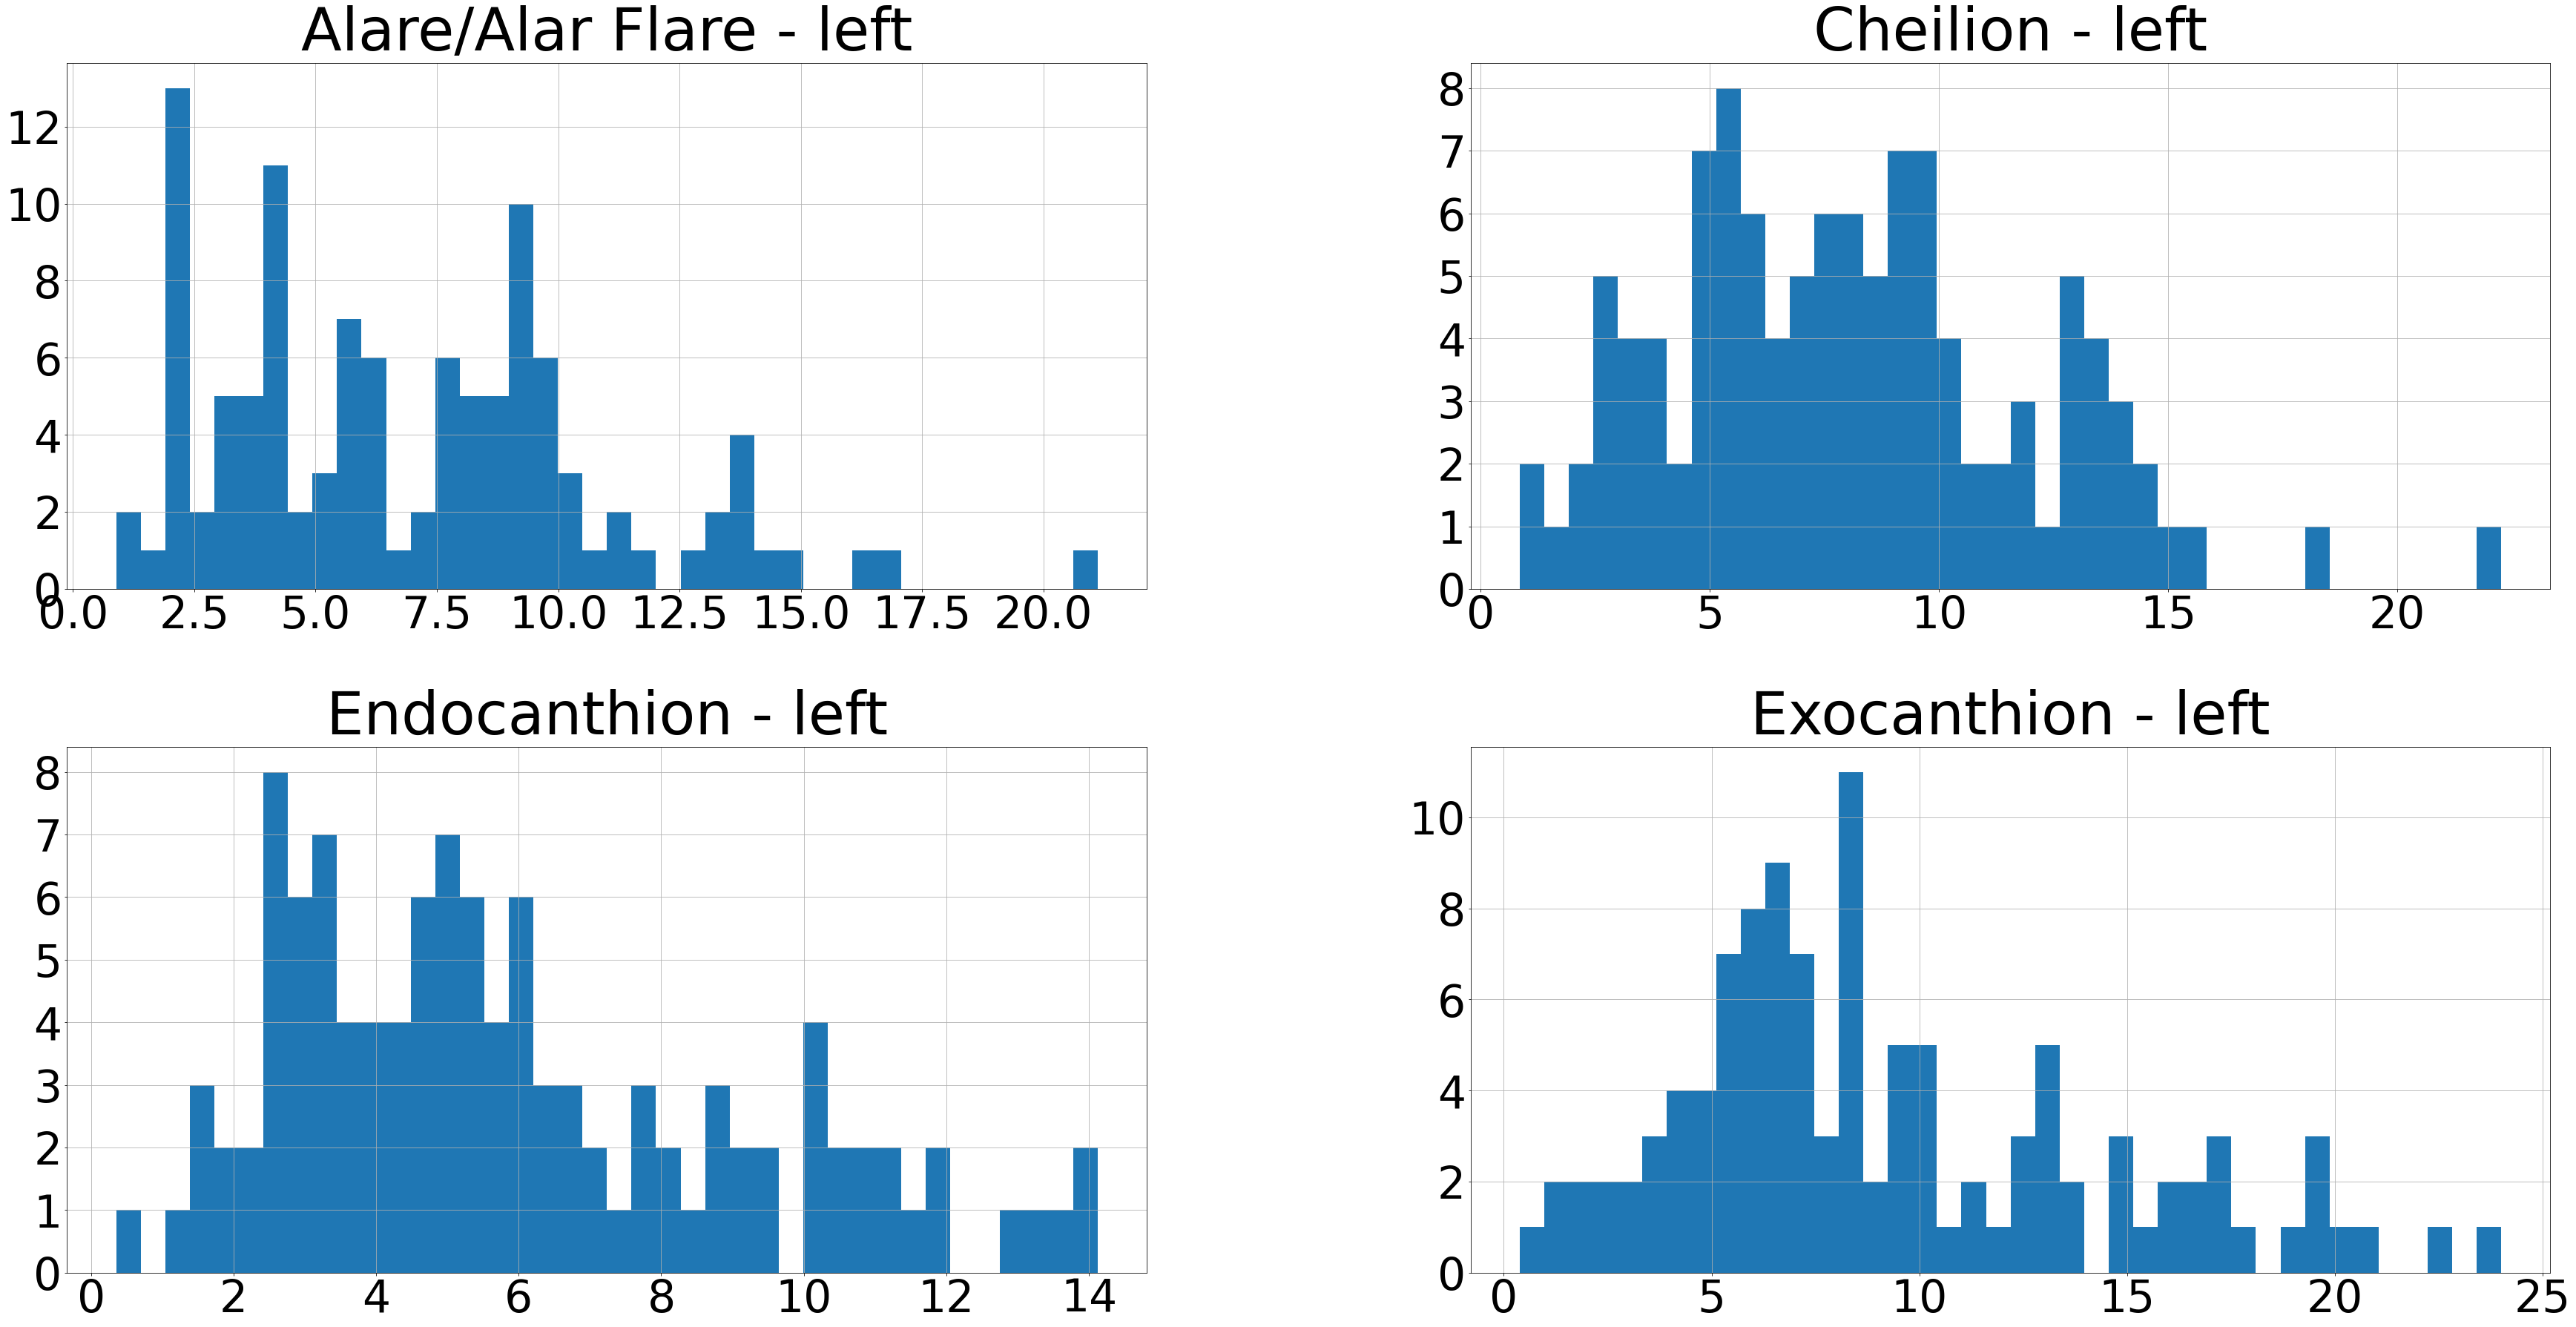

In [150]:
fig = results_df.hist(figsize=(60, 30), bins=40, xlabelsize=60,ylabelsize=60, 
                      column=["Alare/Alar Flare - left",
"Cheilion - left",
"Endocanthion - left",
"Exocanthion - left"])
[x.title.set_size(80) for x in fig.ravel()]
#plt.suptitle("This is Figure title")

plt.show()

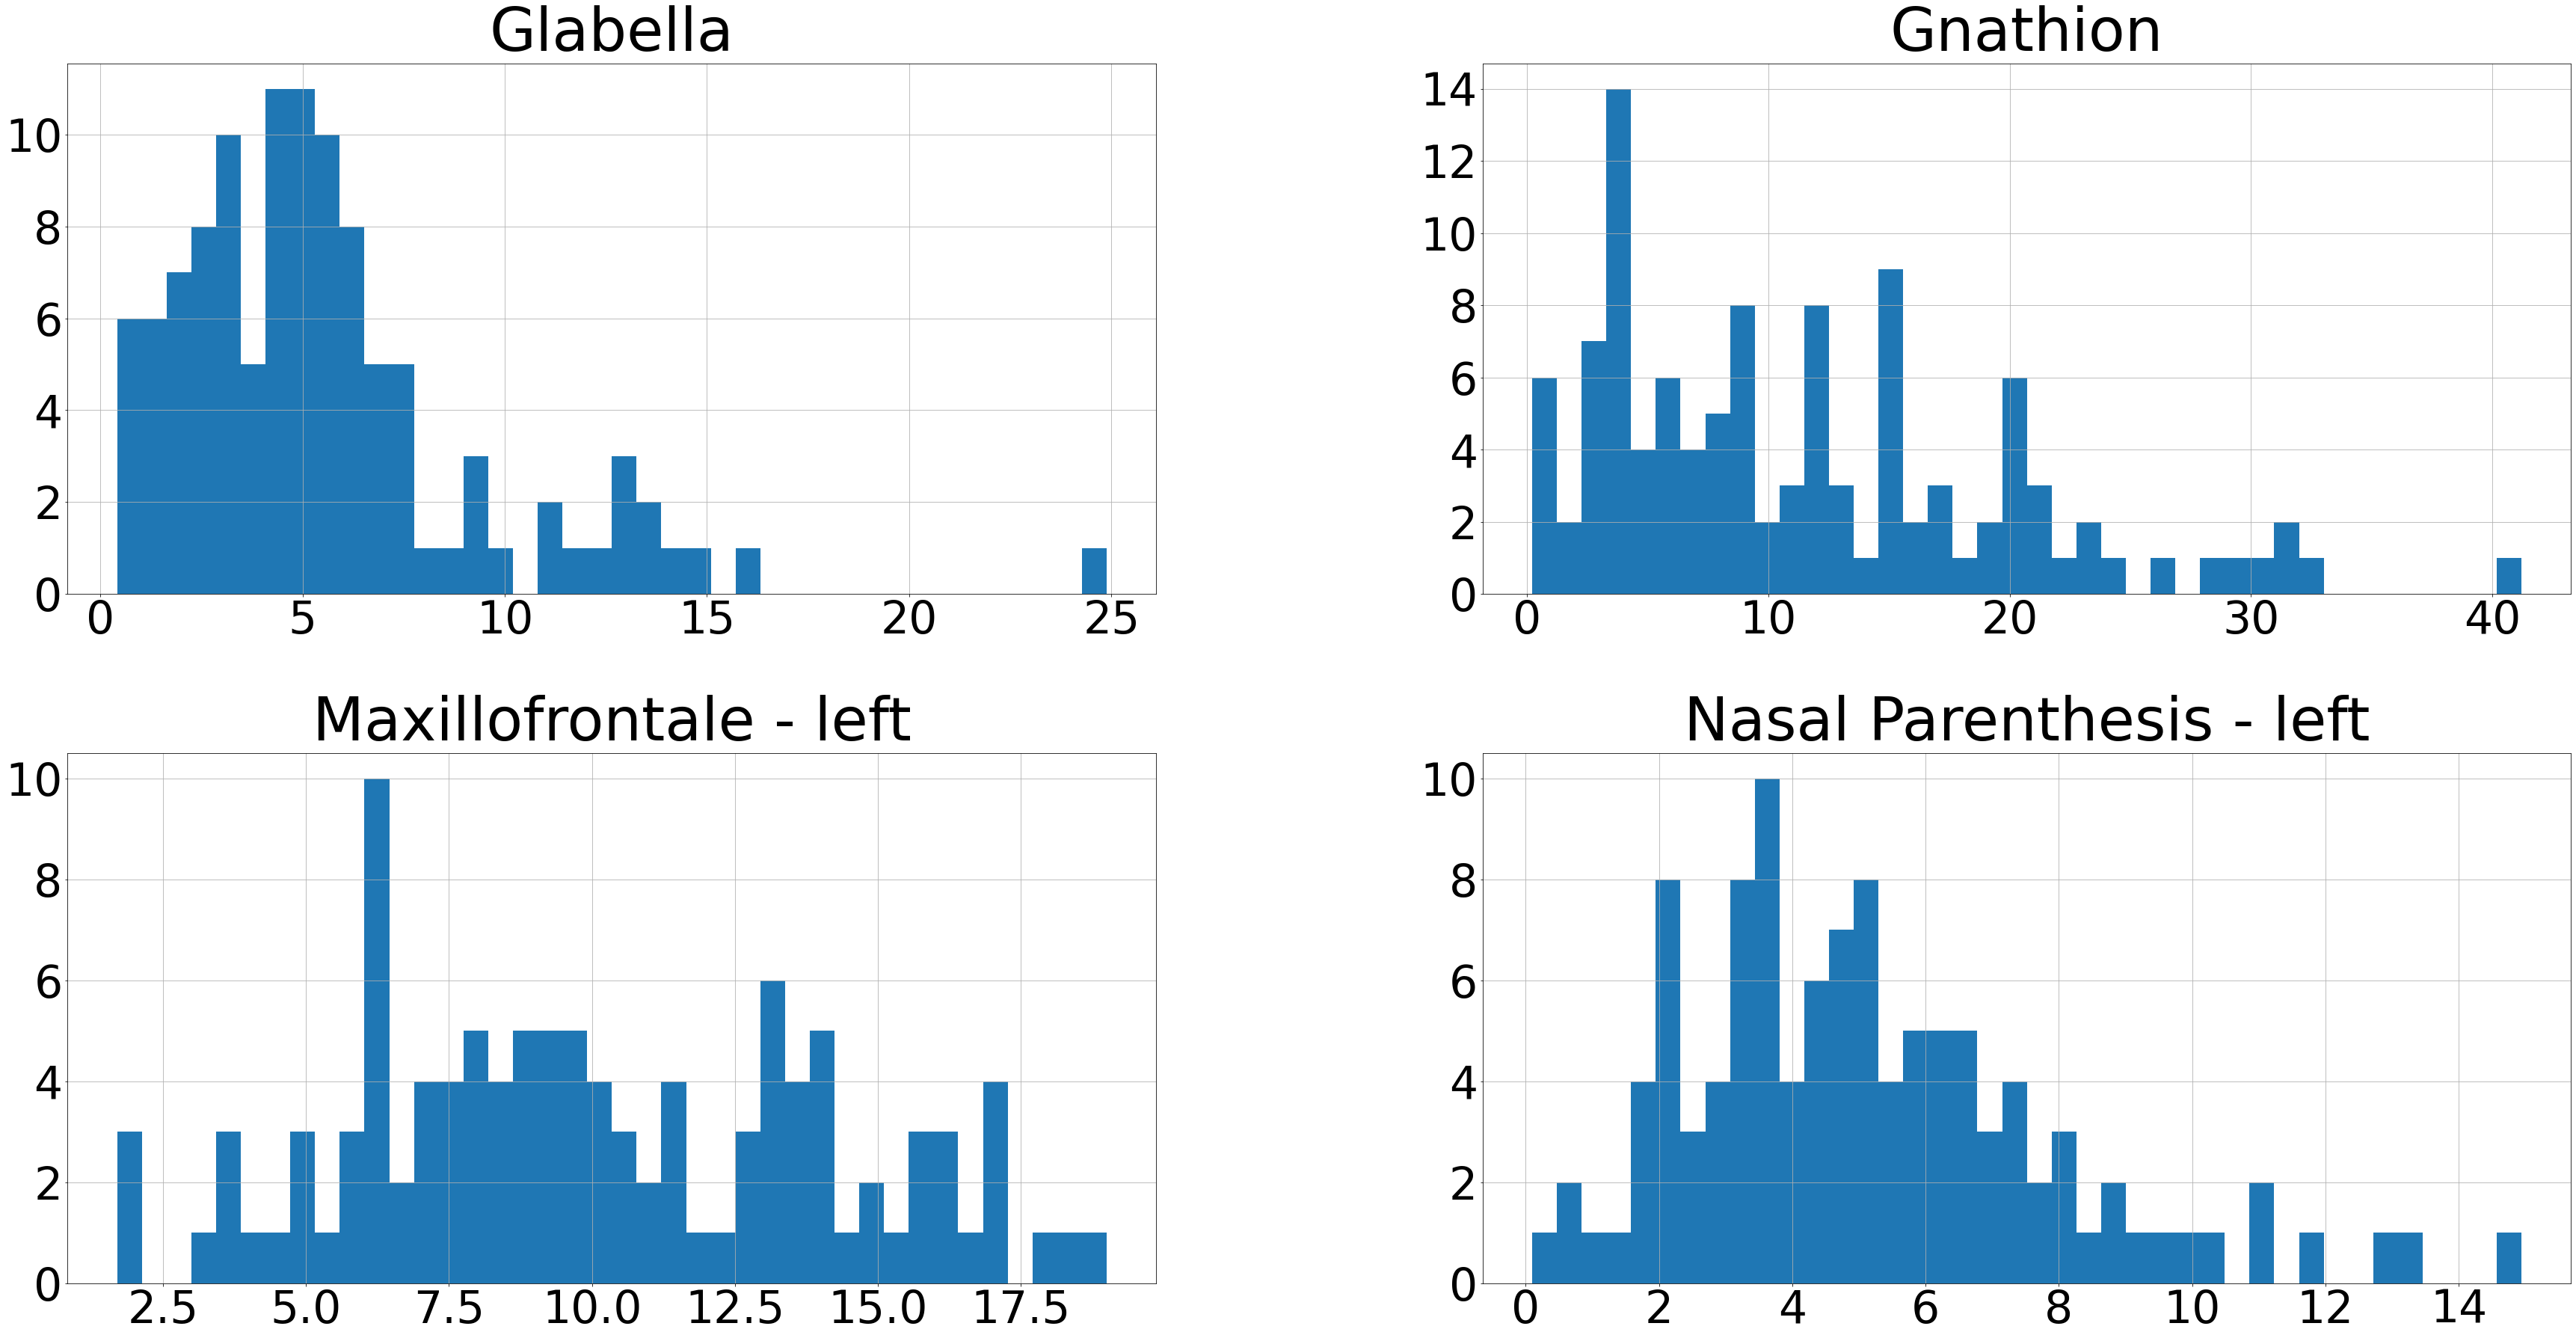

In [155]:
fig = results_df.hist(figsize=(60, 30), bins=40, xlabelsize=60,ylabelsize=60, 
                      column=["Glabella",
"Gnathion",
                              "Maxillofrontale - left",
"Nasal Parenthesis - left"])
[x.title.set_size(80) for x in fig.ravel()]
#plt.suptitle("This is Figure title")

plt.show()



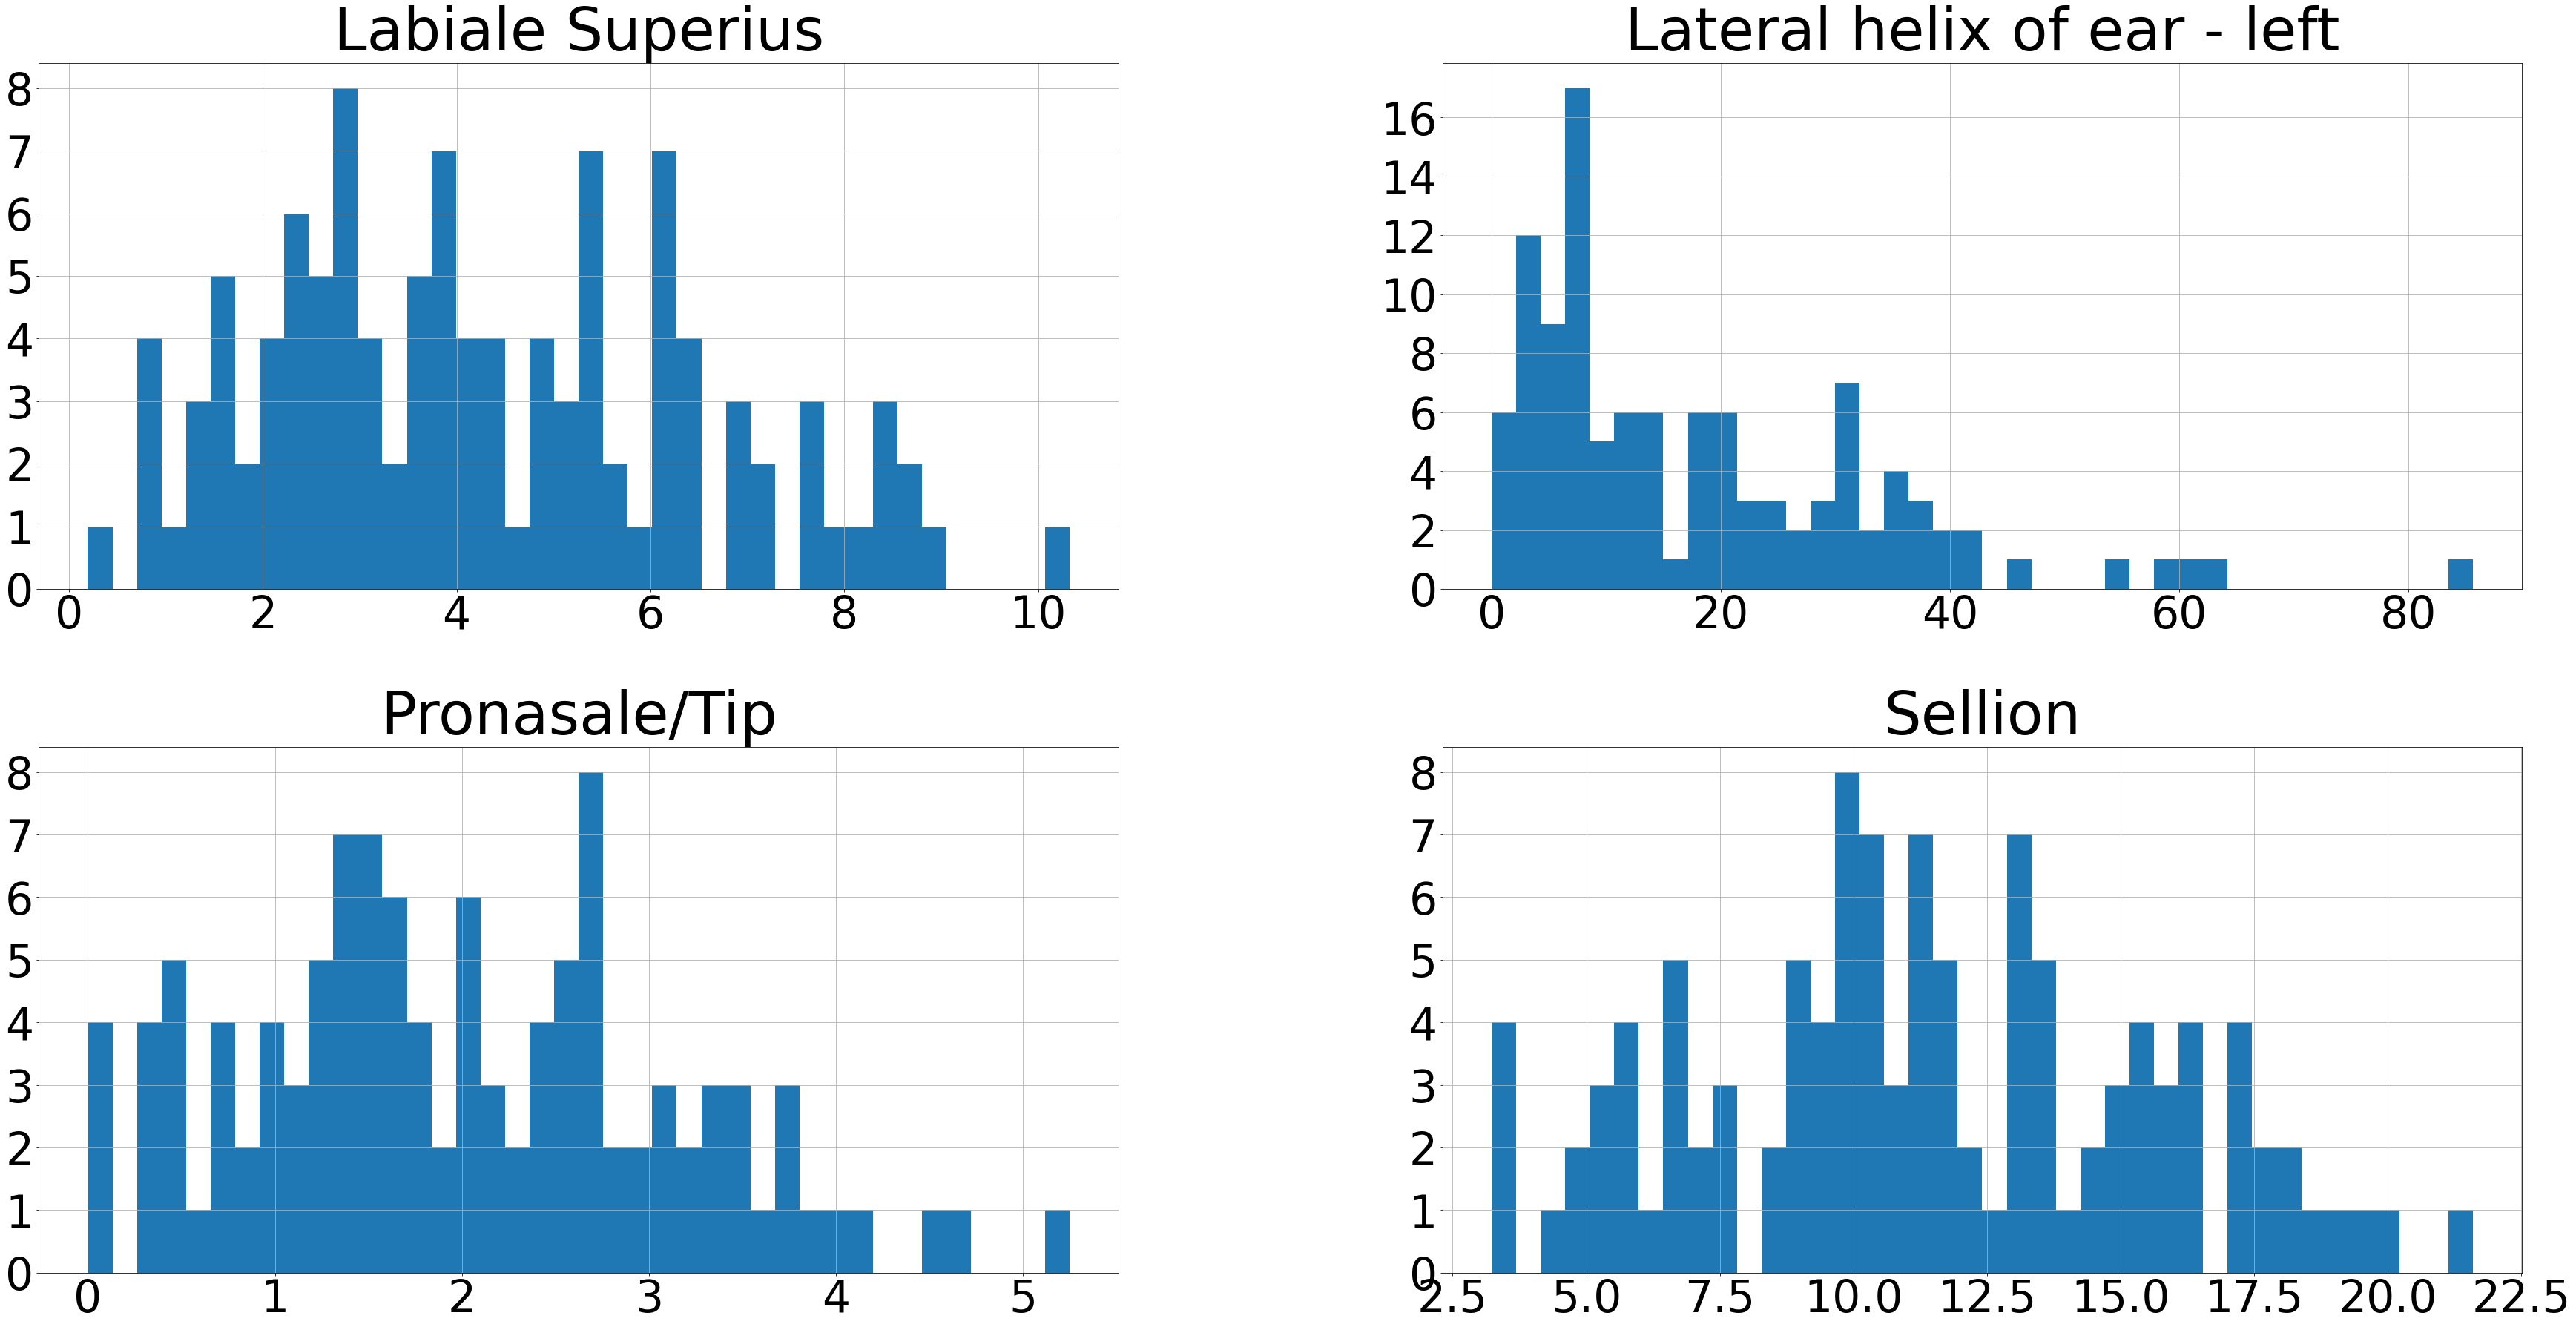

In [159]:
fig = results_df.hist(figsize=(60, 30), bins=40, xlabelsize=60,ylabelsize=60, 
                      column=["Labiale Superius",
"Lateral helix of ear - left",
"Pronasale/Tip",
"Sellion"])
[x.title.set_size(80) for x in fig.ravel()]
#plt.suptitle("This is Figure title")

plt.show()

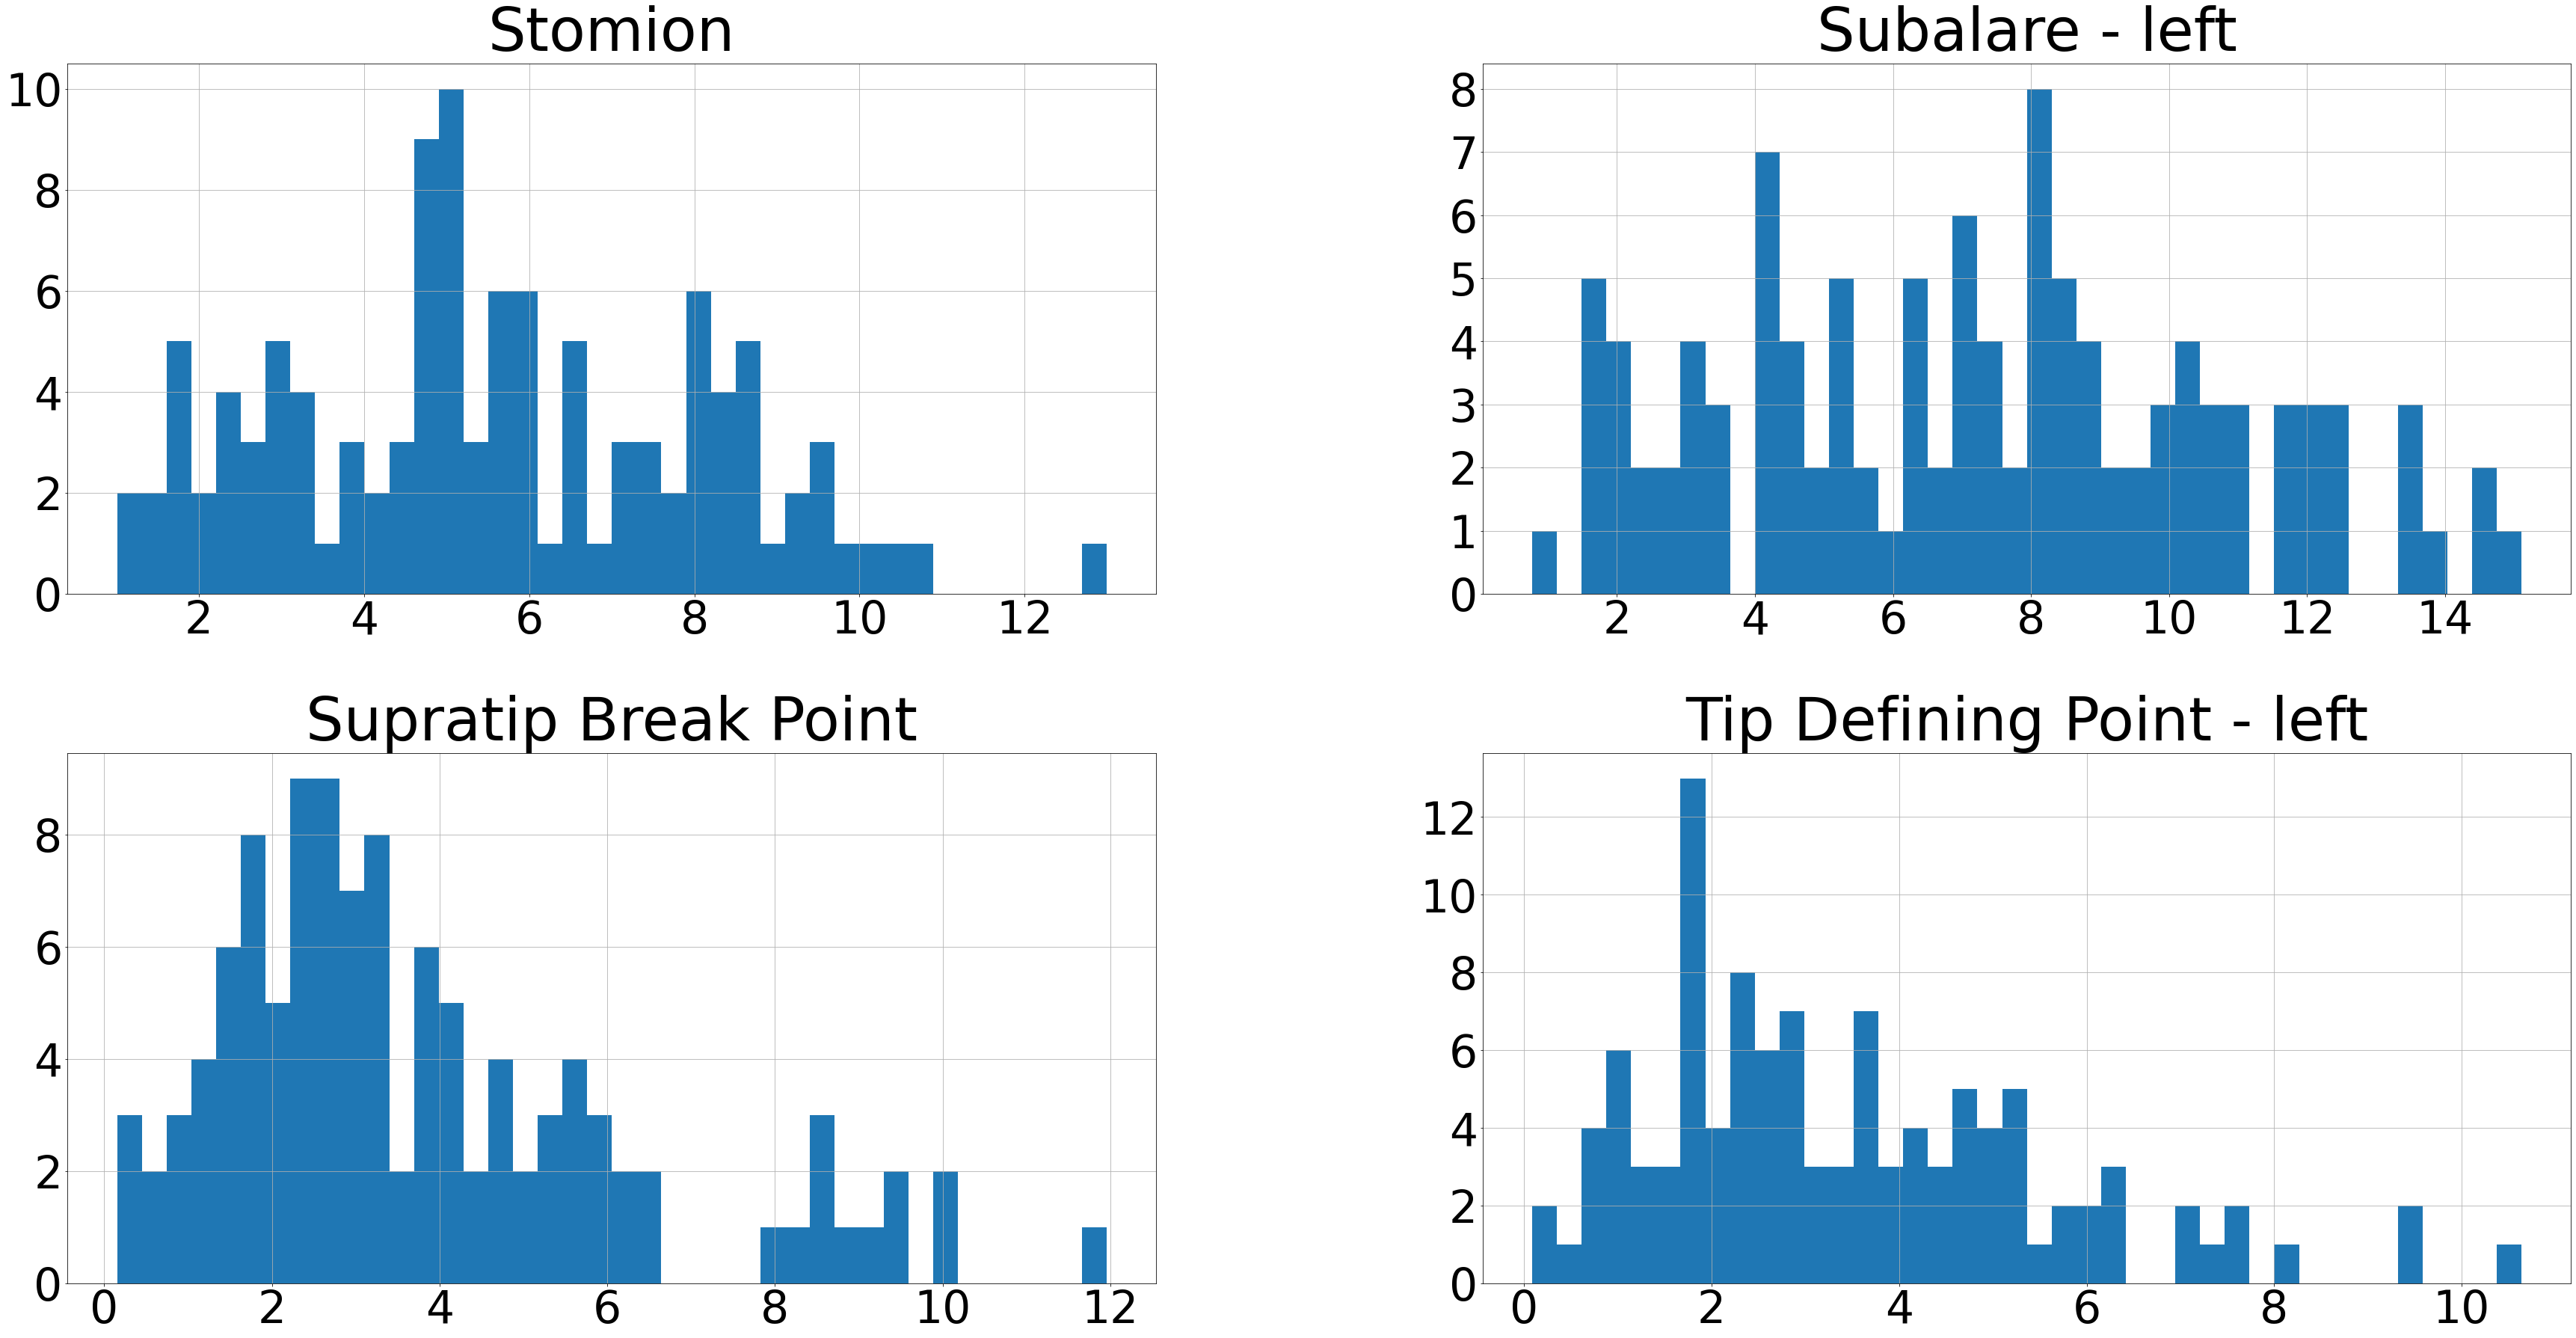

In [160]:
fig = results_df.hist(figsize=(60, 30), bins=40, xlabelsize=60,ylabelsize=60, 
                      column=["Stomion",
"Subalare - left",
"Supratip Break Point",
"Tip Defining Point - left"])
[x.title.set_size(80) for x in fig.ravel()]
#plt.suptitle("This is Figure title")

plt.show()

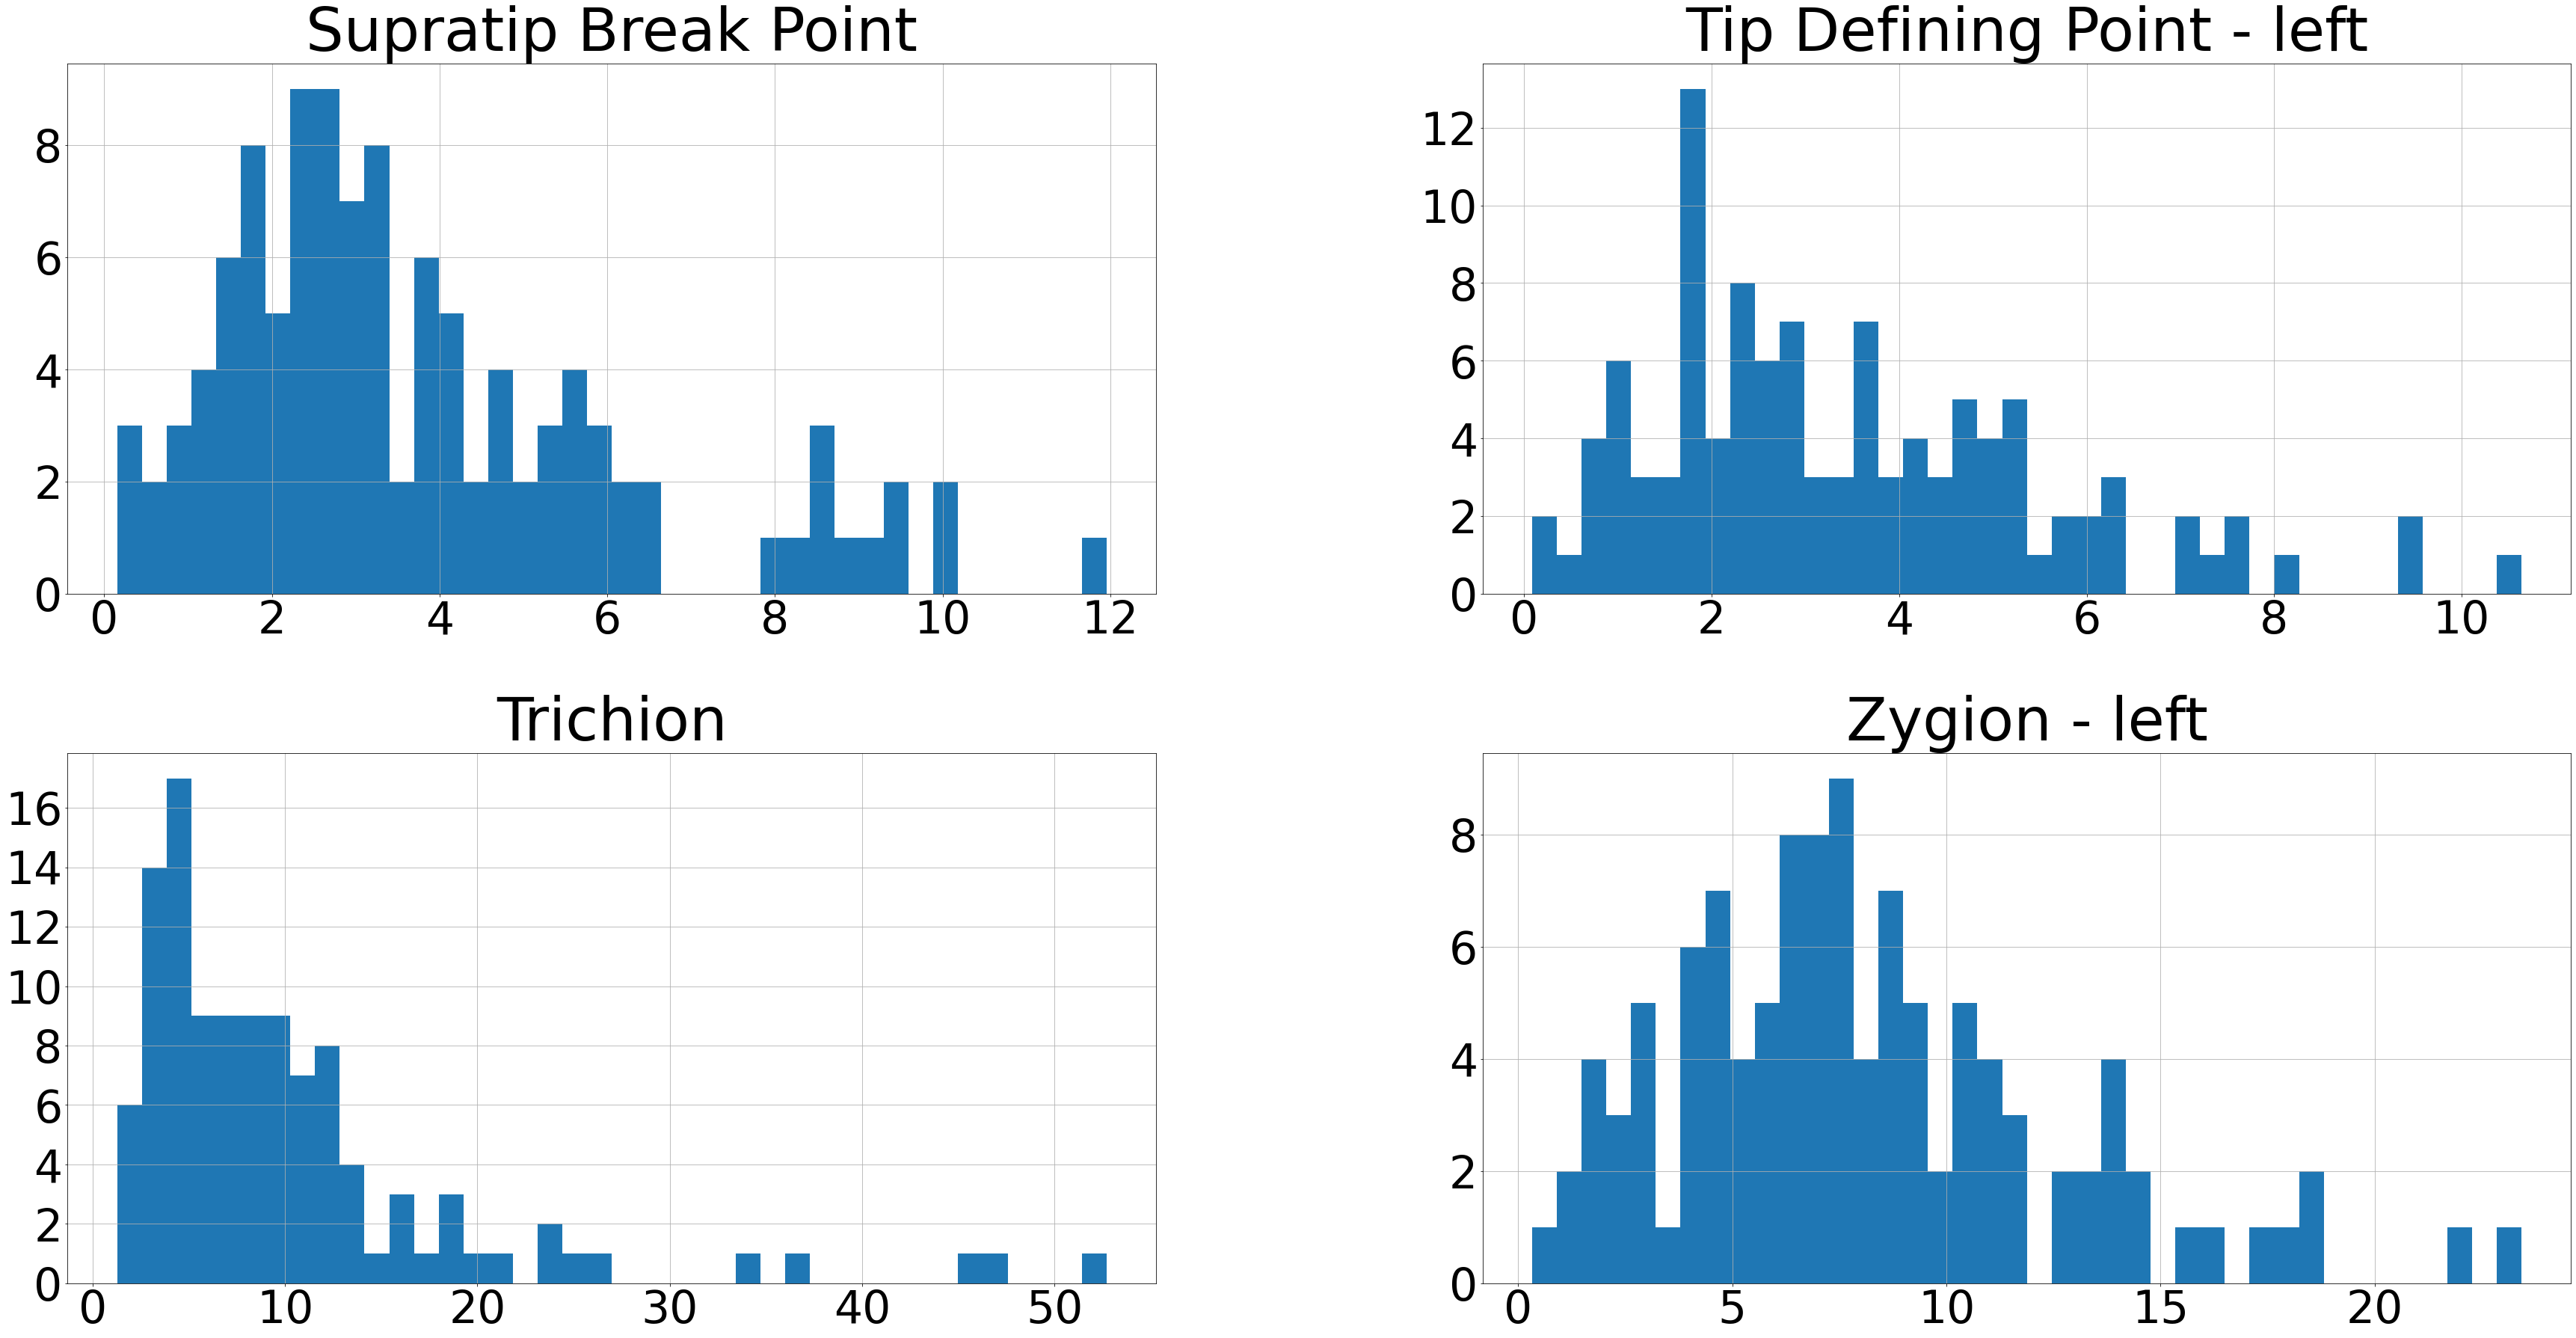

In [153]:
fig = results_df.hist(figsize=(60, 30), bins=40, xlabelsize=60,ylabelsize=60, 
                      column=["Supratip Break Point",
"Tip Defining Point - left",
"Trichion",
"Zygion - left"])
[x.title.set_size(80) for x in fig.ravel()]
#plt.suptitle("This is Figure title")

plt.show()

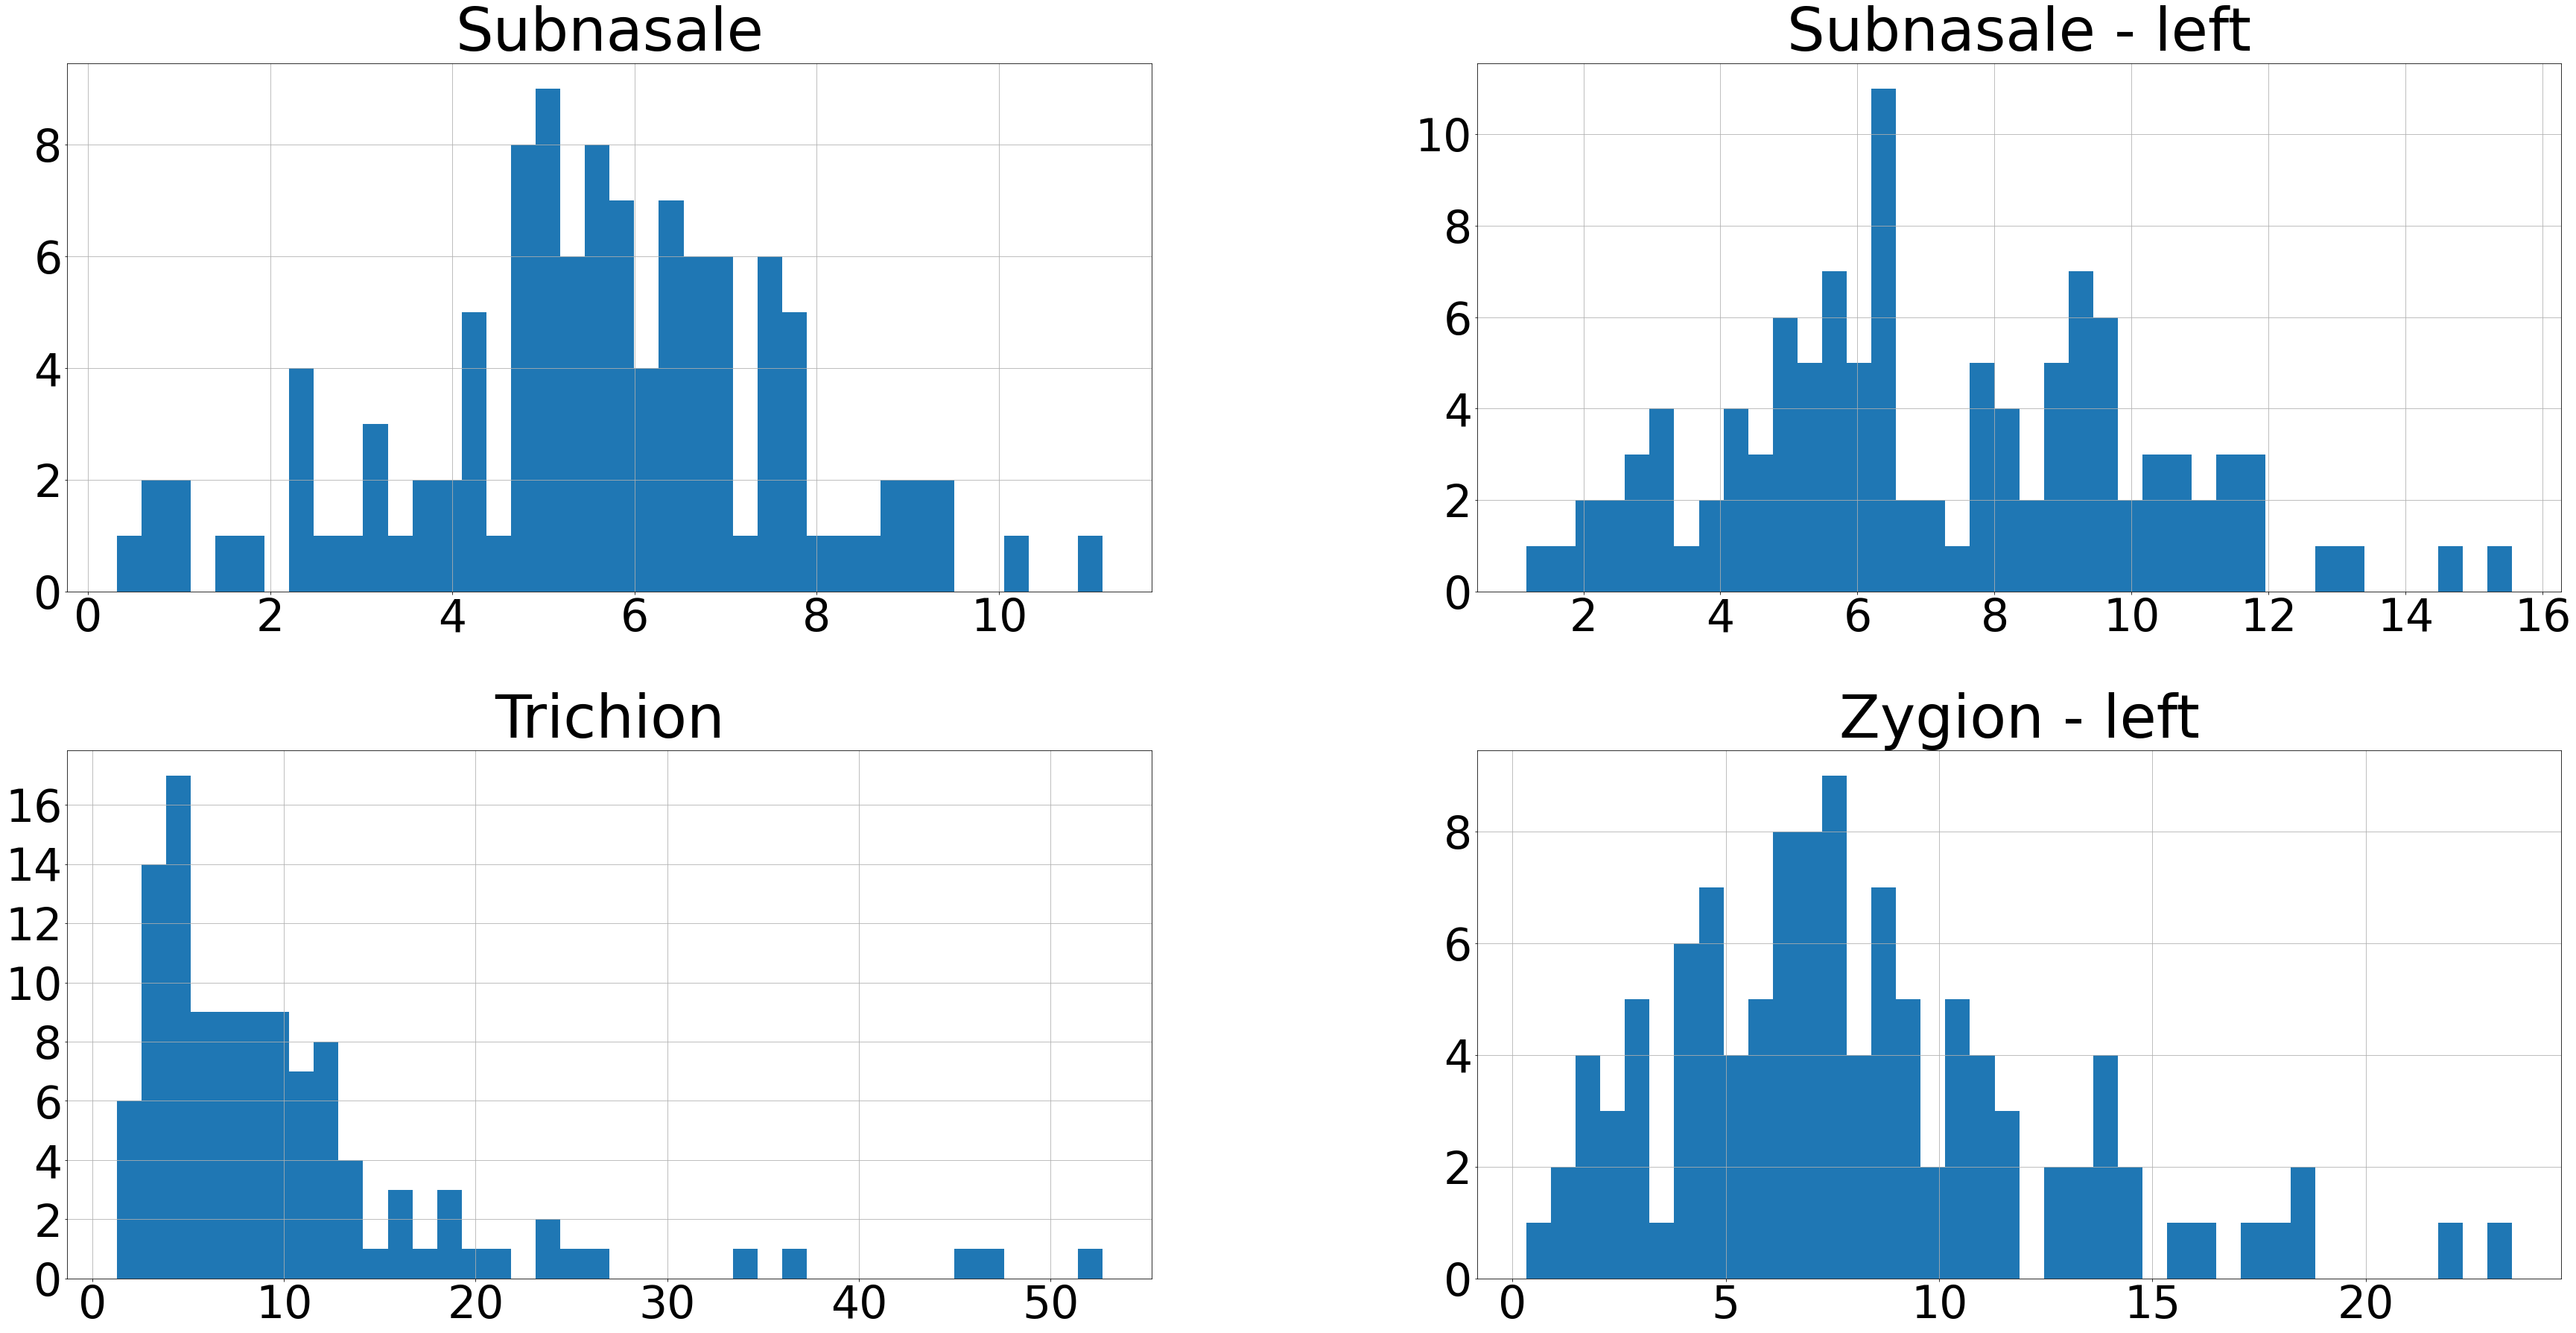

In [161]:
fig = results_df.hist(figsize=(60, 30), bins=40, xlabelsize=60,ylabelsize=60, 
                      column=["Subnasale",
"Subnasale - left",
                              "Trichion",
"Zygion - left"])
[x.title.set_size(80) for x in fig.ravel()]
#plt.suptitle("This is Figure title")

plt.show()

In [118]:
desc_df = results_df.describe().transpose()

drop_desc_columns = [
"count",
"25%",
"50%",
"75%"
]

desc_df['median'] = results_df.median()
desc_df.drop(columns = drop_desc_columns,inplace=True)

desc_df.sort_values(by="mean").round(2)

/var/folders/v6/_tx89b9n2l51thmyq84j4tpm0000gp/T/ipykernel_85862/1019216750.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  desc_df['median'] = results_df.median()


mean    std   min    max  median
Pronasale/Tip                           1.98   1.13  0.00   5.25    1.82
Tip Defining Point - left               3.45   2.12  0.08  10.64    2.84
Supratip Break Point                    3.75   2.44  0.15  11.96    3.06
Columellar Break Point                  3.87   2.47  0.18  13.06    3.38
Labiale Superius                        4.28   2.21  0.20  10.32    3.92
Nasal Parenthesis - left                5.16   2.81  0.10  14.94    4.67
Glabella                                5.54   3.93  0.41  24.88    4.98
Subnasale                               5.58   2.10  0.32  11.14    5.64
Stomion                                 5.59   2.52  1.01  12.99    5.41
Endocanthion/Medial Canthus - left      5.94   3.23  0.35  14.12    5.24
Alare/Alar Flare - left                 6.99   3.94  0.89  21.12    6.29
Subnasale - left                        7.13   2.97  1.17  15.55    6.53
Alar Rim's Highest Point - left         7.20   3.74  0.69  18.47    6.49
Subalare - left                         7.25   3.51  0.77  15.11    7.23
Cheilion - left                         8.06   3.92  0.85  22.27    7.81
Zygion - left                           8.08   4.48  0.32  23.43    7.35
Exocanthion/Lateral Canthus - left      9.24   5.10  0.38  24.01    8.11
Maxillofrontale - left                 10.04   4.09  1.70  19.00    9.58
Trichion                               10.19   9.12  1.28  52.71    7.72
Columellar Rim - left                  10.31   3.10  3.40  19.42   10.33
Alar Base Junction/Alar Crease - left  11.11   3.01  3.20  19.49   10.90
Sellion                                11.40   4.21  3.23  21.59   11.14
Gnathion                               11.56   8.43  0.22  41.21    9.41
Lateral helix of ear - left            18.16  15.80  0.00  85.63   12.87

In [106]:
desc.transpose().drop

count       mean        std       min  \
Alar Base Junction/Alar Crease - left   111.0  11.107739   3.009746  3.201273   
Alar Base Junction/Alar Crease - right  111.0  10.934289   3.269926  3.192610   
Alar Rim's Highest Point - left         111.0   7.197360   3.743224  0.692302   
Alar Rim's Highest Point - right        111.0   7.520539   4.354519  0.091327   
Alare/Alar Flare - left                 111.0   6.991119   3.940708  0.890068   
Alare/Alar Flare - right                111.0   6.796441   3.698028  0.364260   
Cheilion - left                         111.0   8.064811   3.922661  0.851836   
Cheilion - right                        111.0   7.916427   4.232024  0.390830   
Columellar Break Point                  111.0   3.874105   2.465522  0.183485   
Columellar Rim - left                   111.0  10.309674   3.102722  3.401309   
Columellar Rim - right                  111.0  10.586217   3.252912  3.912422   
Endocanthion/Medial Canthus - left      111.0   5.944936   3.234137  0.353542   
Endocanthion/Medial Canthus - right     111.0   6.185794   3.568240  0.761346   
Exocanthion/Lateral Canthus - left      111.0   9.236302   5.097216  0.384208   
Exocanthion/Lateral Canthus - right     111.0  15.113410   5.742951  0.474009   
Glabella                                111.0   5.536201   3.925284  0.414836   
Gnathion                                111.0  11.559032   8.426017  0.224147   
Labiale Superius                        111.0   4.278825   2.209879  0.196691   
Lateral helix of ear - left             111.0  18.155945  15.802821  0.000000   
Lateral helix of ear - right            111.0  18.467386  14.909804  0.000000   
Maxillofrontale - left                  111.0  10.041505   4.094650  1.700465   
Maxillofrontale - right                 111.0  10.068684   3.743636  2.042901   
Nasal Parenthesis - left                111.0   5.157544   2.806020  0.096435   
Nasal Parenthesis - right               111.0   6.236483   3.747452  0.198880   
Nasion/Radix                            111.0  11.032343   4.250210  2.253337   
Pronasale/Tip                           111.0   1.976710   1.125009  0.000000   
Sellion                                 111.0  11.397059   4.205706  3.226554   
Stomion                                 111.0   5.587880   2.523293  1.009509   
Subalare - left                         111.0   7.251834   3.508520  0.770738   
Subalare - right                        111.0   7.933330   3.930238  1.264805   
Subnasale                               111.0   5.577030   2.097384  0.315948   
Subnasale - left                        111.0   7.133137   2.971936  1.167725   
Subnasale - right                       111.0   8.067738   3.049482  0.577223   
Supratip Break Point                    111.0   3.753956   2.436326  0.154366   
Tip Defining Point - left               111.0   3.447662   2.116497  0.083709   
Tip Defining Point - right              111.0   3.499119   2.195378  0.537674   
Trichion                                111.0  10.185371   9.119330  1.279245   
Zygion - left                           111.0   8.075276   4.482117  0.322966   
Zygion - right                          111.0   8.439672   5.068438  0.122534   

                                              25%        50%        75%  \
Alar Base Junction/Alar Crease - left    8.822469  10.896792  13.132223   
Alar Base Junction/Alar Crease - right   8.598665  10.610761  12.821504   
Alar Rim's Highest Point - left          4.570770   6.485777   9.398058   
Alar Rim's Highest Point - right         4.032511   7.007032  10.810066   
Alare/Alar Flare - left                  3.926272   6.294048   9.270866   
Alare/Alar Flare - right                 3.781621   6.172297   9.119607   
Cheilion - left                          5.281469   7.810341  10.198628   
Cheilion - right                         4.590559   7.546777  10.864267   
Columellar Break Point                   2.089752   3.377994   4.944972   
Columellar Rim - left                    8.396779

## Functions Needed for the Implementation


### Thoughts 1:
-Rotate and translate all points

    -Orienting the face


-Return global maximum/minimum points given a criteria


	-x, y, or z coordinate
	-Feature such as shape index
	-User-defined equation


-Return local maximum/minimum points

-Create subsets of the set based on some criteria


	-Isolate points within a defined rectangular region
	-All points that have a certain value above a threshold
	-All points below/above a given x, y, or z
	-All points with a global or local maximum point
	-Finding sharp edges or critical points

-Calculate a metric on each point


	-First and second partial derivatives
	-Gaussian surface curvature, mean surface curvature
	-Shape index, curvedness index


-Moving in a straight line, despite all lines being angular


	-Create a subset of all points connected to a polygon which is on the line
	-Start at one point, move in a given direction to search for e.g. a local maximum


-Fitting one set of points to another


	-Fitting a face to a template
	-Fitting a face to the mirror of that face
	-Iterative closest point (ICP) algorithm
	-Finding the error between the two sets


-Run complex algorithms on the set


	-Denoising, hole filling (bicubic interpolation), removing spikes
	-Edge detection (Laplacian of Gaussian algorithm)
	-SIFT detection algorithm
	-Automatic threshold filter
	-2D EBGM algorithm
	-PCA
	-Connected component curvature analysis


-Creating a 2D image of the mesh based on some metric


	-Depth/Z coordinate
	-Color converted to greyscale
	-Radial map
	-Tangent map
	-Extrusion map
	-Shape index map


### Thoughts 2:

Search for a point within a subset of points

    -Find the point at the geometric center of a subset of points

Denoising the face

    -Linear anisotropic filter
    -Anisotropic non-linear filter

Fitting a shape to a point to calculate some metric

    -Fitting a sphere to a point on the face

Computing and applying thresholds

    -Triangle filter
    -Max Entropy threshold method
    -Renyi Entropy method

Calculating a metric for a point

    -Surface normal vector

Calculating a metric between points

    -Angle between points
    -Distance between points

Complex algorithms

    -2D+3D EBGM algorithm
    -Nearest Neighbor
    -Thin-plate spline algorithm

Sorting values

    -Sorting maximum and/or minimum values in descending order


### Ideas for Facial Alignment

-Find some feature point (such as pronasale) which can be detected independent from orientation, and use it as a vector to orient the face (as in [Guo, Mei et. al. 2013])

-Find the orientation which minimizes or maximizes the width of a dimension. E.g. if faces are taller than they are wide, find the orientation which maximizes the face height so the face becomes upright

-Match the face as close as possible to a template using PCA

-Match the face with its reflection, so it is oriented along the median plane

# References


1. Mazhar Celikoyar, Michael Perez, Mustafa Ilhan Akbaş, Oguzhan Topsakal. "Facial Surface Anthropometric Features and Measurements With an Emphasis on Rhinoplasty", Aesthetic Surgery Journal (2021) sjab190, https://doi.org/10.1093/asj/sjab190
2. Perakis, P., Passalis, G., Theoharis, T.,  et  al.: ‘3D facial landmark detectionand face registration’, Technical Report, University of Athens, 2010
3. Gupta, S., Markey, M.K., Bovik, A.C.: ‘Anthropometric 3D face recognition’,Int. J. Comput. Vis., 2010, 90, (3), pp. 331–349
4. Arpah Abu and Chee Guan Ngo and Nur Idayu Adira Abu-Hassan and Siti Adibah Othman (2019). Automated craniofacial landmarks detection on 3D image using geometry characteristics information. BMC Bioinform., 19-S(13), 65–80.
5. Vezzetti, E., Marcolin, F.: ‘Geometry-based 3D face morphology analysis:soft-tissue landmark formalization’, Multimed. Tools Appl., 2014, 68, (3), pp.895–929
6. Liang, S., Wu, J., Weinberg, S. M., & Shapiro, L. G. (2013). Improved detection of landmarks on 3D human face data. Annual International Conference of the IEEE Engineering in Medicine and Biology Society. IEEE Engineering in Medicine and Biology Society. Annual International Conference, 2013, 6482–6485.
7. Manal, E. R., Arsalane, Z., & Aicha, M. (2019, October). Automated Detection of Craniofacial Landmarks on a 3D Facial Mesh. In International Conference on Integrated Design and Production (pp. 537-548). Springer, Cham.
8. Vezzetti, E., Marcolin, F., Stola, V.: ‘3D human face soft tissues landmarking method: an advanced approach’, Comput. Ind., 2013, 64, (9), pp. 1326–1354
9. Guo J, Mei X, Tang K (2013) Automatic landmark annotation and dense correspondence registration for 3D human facial images. BMC Bioinformatics 14, 232.
10. S. Z. Gilani, F. Shafait and A. Mian, "Shape-based automatic detection of a large number of 3D facial landmarks," 2015 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2015, pp. 4639-4648, doi: 10.1109/CVPR.2015.7299095.
11. Galvánek, Marek & Furmanová, Katarína & Chalás, Igor & Sochor, Jiri. (2015). Automated facial landmark detection, comparison and visualization. 7-14. 10.1145/2788539.2788540.
12. Berretti, S., Ben  Amor, B., Daoudi, M., et al.: ‘3D facial expression recognition using SIFT descriptors of automatically detected keypoints’, Vis. Comput., 2011, 27, (11), p. 1021
13. Li M, Cole JB, Manyama M, et al. Rapid automated landmarking for morphometric analysis of three-dimensional facial scans. J Anat. 2017;230(4):607-618. doi:10.1111/joa.12576
14. Mehryar, S., Martin, K., Plataniotis, K.N.: ‘Automatic landmark detection for 3D face image processing’.  IEEE Congress on (CEC) Evolutionary Computation, Barcelona, Spain, 2010, pp. 1–7
15. Moos, S., Marcolin, F., Tornincasa, S. et al. Cleft lip pathology diagnosis and foetal landmark extraction via 3D geometrical analysis. Int J Interact Des Manuf 11, 1–18 (2017)
16. Vezzetti, E., Marcolin, F., Tornincasa, S. et al. 3D geometry-based automatic landmark localization in presence of facial occlusions. Multimed Tools Appl 77, 14177–14205 (2018).
17. M. P. Pamplona Segundo, L. Silva, O. R. P. Bellon and C. C. Queirolo, "Automatic Face Segmentation and Facial Landmark Detection in Range Images," in IEEE Transactions on Systems, Man, and Cybernetics, Part B (Cybernetics), vol. 40, no. 5, pp. 1319-1330, Oct. 2010
18. Vezzetti E, Marcolin F. 3D landmarking in multiexpression face analysis: a preliminary study on eyebrows and mouth. Aesthetic Plast Surg. 2014 Aug;38(4):796-811. doi: 10.1007/s00266-014-0334-2. Epub 2014 May 30. PMID: 24875952.

#### Contributors

- Oguzhan Topsakal (otopsakal@floridapoly.edu)
- Joshua Murphy
- Taylor Preston
- Philip Sawyer
- Joshua Palmer
- Cetin Akinci